In [115]:
import pandas as pd
import numpy as np
import lftk
import spacy

In [116]:
nlp = spacy.load("en_core_web_sm")

In [117]:
data = pd.read_csv(r"Datasets\Fake News Dataset (validation)\fake_news_preprocess.csv")

In [118]:
data

id                                               text  Polarity
0      8476  You Can Smell Hillary’s FearDaniel Greenfield,...         0
1     10294  Watch The Exact Moment Paul Ryan Committed Pol...         0
2      3608  Kerry to go to Paris in gesture of sympathyU.S...         1
3     10142  Bernie supporters on Twitter erupt in anger ag...         0
4       875  The Battle of New York: Why This Primary Matte...         1
...     ...                                                ...       ...
6330   4490  State Department says it can't find emails fro...         1
6331   8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...         0
6332   8622  Anti-Trump Protesters Are Tools of the Oligarc...         0
6333   4021  In Ethiopia, Obama seeks progress on peace, se...         1
6334   4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...         1

[6335 rows x 3 columns]

## LFTK Features

In [119]:
features_df = lftk.search_features(return_format="pandas")

In [120]:
len(features_df)

220

In [121]:
features_df.loc[:50]

key                                               name  \
0                 t_word                              total_number_of_words   
1             t_stopword                         total_number_of_stop_words   
2                t_punct                       total_number_of_punctuations   
3                 t_syll                          total_number_of_syllables   
4                t_syll2      total_number_of_words_more_than_two_syllables   
5                t_syll3    total_number_of_words_more_than_three_syllables   
6                t_uword                       total_number_of_unique_words   
7                 t_sent                          total_number_of_sentences   
8                 t_char                         total_number_of_characters   
9              a_word_ps               average_number_of_words_per_sentence   
10             a_char_ps          average_number_of_characters_per_sentence   
11             a_char_pw              average_number_of_characters_per_word   
12             a_syll_ps           average_number_of_syllables_per_sentence   
13             a_syll_pw               average_number_of_syllables_per_word   
14         a_stopword_ps          average_number_of_stop_words_per_sentence   
15         a_stopword_pw              average_number_of_stop_words_per_word   
16                 t_kup          total_kuperman_age_of_acquistion_of_words   
17                 t_bry         total_brysbaert_age_of_acquistion_of_words   
18     t_subtlex_us_zipf                     total_subtlex_us_zipf_of_words   
19              a_kup_pw  average_kuperman_age_of_acquistion_of_words_pe...   
20              a_bry_pw  average_brysbaert_age_of_acquistion_of_words_p...   
21              a_kup_ps  average_kuperman_age_of_acquistion_of_words_pe...   
22              a_bry_ps  average_brysbaert_age_of_acquistion_of_words_p...   
23  a_subtlex_us_zipf_pw          average_subtlex_us_zipf_of_words_per_word   
24  a_subtlex_us_zipf_ps      average_subtlex_us_zipf_of_words_per_sentence   
25               t_n_ent                     total_number_of_named_entities   
26        t_n_ent_person              total_number_of_named_entities_person   
27          t_n_ent_norp                total_number_of_named_entities_norp   
28           t_n_ent_fac                 total_number_of_named_entities_fac   
29           t_n_ent_org                 total_number_of_named_entities_org   
30           t_n_ent_gpe                 total_number_of_named_entities_gpe   
31           t_n_ent_loc                 total_number_of_named_entities_loc   
32       t_n_ent_product             total_number_of_named_entities_product   
33         t_n_ent_event               total_number_of_named_entities_event   
34           t_n_ent_art                 total_number_of_named_entities_art   
35           t_n_ent_law                 total_number_of_named_entities_law   
36      t_n_ent_language            total_number_of_named_entities_language   
37          t_n_ent_date                total_number_of_named_entities_date   
38          t_n_ent_time                total_number_of_named_entities_time   
39       t_n_ent_percent             total_number_of_named_entities_percent   
40         t_n_ent_money               total_number_of_named_entities_money   
41      t_n_ent_quantity            total_number_of_named_entities_quantity   
42       t_n_ent_ordinal             total_number_of_named_entities_ordinal   
43      t_n_ent_cardinal            total_number_of_named_entities_cardinal   
44            a_n_ent_pw          average_number_of_named_entities_per_word   
45     a_n_ent_person_pw   average_number_of_named_entities_person_per_word   
46       a_n_ent_norp_pw     average_number_of_named_entities_norp_per_word   
47        a_n_ent_fac_pw      average_number_of_named_entities_fac_per_word   
48        a_n_ent_org_pw      average_number_of_named_entities_org_per_word   
49        a_n_ent_gpe_pw      average_number_of_named_entities_gpe_per_

In [122]:
extra_features_exclude = ["average_subtlex_us_zipf_of_words_per_word", "average_subtlex_us_zipf_of_words_per_sentence"]

In [123]:
unique_pos_features = [feature["name"] for feature in lftk.search_features(family="partofspeech")]
avg_ents_features = [feature["name"] for feature in lftk.search_features(family="avgentity")]
ents_features = [feature["name"] for feature in lftk.search_features(family="entity")]


features_not_include = ents_features + avg_ents_features + unique_pos_features
print(len(features_not_include))

91


In [124]:
# features_not_include

In [125]:
features = lftk.search_features(return_format="list_dict")

In [126]:
features[0].keys()

dict_keys(['key', 'name', 'formulation', 'domain', 'family', 'language'])

In [127]:
features_to_extract = [feature["key"] for feature in features if feature["name"] not in features_not_include]

In [128]:
len(features_to_extract)

128

In [129]:
features_df[features_df["key"].isin(features_to_extract)]

key                                             name formulation  \
0        t_word                            total_number_of_words  foundation   
1    t_stopword                       total_number_of_stop_words  foundation   
3        t_syll                        total_number_of_syllables  foundation   
4       t_syll2    total_number_of_words_more_than_two_syllables  foundation   
5       t_syll3  total_number_of_words_more_than_three_syllables  foundation   
..          ...                                              ...         ...   
215        cole                               coleman_liau_index  derivation   
216        auto                      automated_readability_index  derivation   
217     rt_fast                    reading_time_for_fast_readers  derivation   
218  rt_average                 reading_time_for_average_readers  derivation   
219     rt_slow                    reading_time_for_slow_readers  derivation   

      domain           family language  
0    surface         wordsent  general  
1    surface         wordsent  general  
3    surface         wordsent       en  
4    surface         wordsent       en  
5    surface         wordsent       en  
..       ...              ...      ...  
215  surface      readformula       en  
216  surface      readformula       en  
217  surface  readtimeformula       en  
218  surface  readtimeformula       en  
219  surface  readtimeformula       en  

[128 rows x 6 columns]

# Colinearity Stat Test: take a sample, compute the metrics, do correlation and colinearity test to determine which features to keep

In [130]:
data.columns

Index(['id', 'text', 'Polarity'], dtype='object')

In [131]:
random_sample_data_true = data[data["Polarity"] == 1]["text"].sample(n=200, random_state=20)
random_sample_data_fake = data[data["Polarity"] == 0]["text"].sample(n=200, random_state=20)

In [132]:
random_sample = random_sample_data_true.to_list() + random_sample_data_fake.to_list() 

In [133]:
docs_random_sample = [nlp(news) for news in random_sample]

In [134]:
LFTK = lftk.Extractor(docs = docs_random_sample)
LFTK.customize(stop_words = True, round_decimal = 2)

In [135]:
random_sample_features = LFTK.extract(features=features_to_extract)

In [137]:
# random_sample_features

In [138]:
sample_features_df = pd.DataFrame(random_sample_features)

In [141]:
sample_features_df.head()

t_word  t_stopword  t_syll  t_syll2  t_syll3  t_uword  t_sent  t_char  \
0      22           9      25        1        1       22       2      92   
1     331         119     476       49       19      172      13    1589   
2     401         193     612       65       27      193      20    2012   
3     769         336    1169      133       52      392      35    3683   
4    1898         950    2650      263       88      654      83    8672   

   a_word_ps  a_char_ps  ...  a_space_ps   fkre   fkgl   fogi  smog   cole  \
0      11.00      46.00  ...        0.00  99.53   2.11   6.22  4.04   6.10   
1      25.46     122.23  ...        1.31  59.33  11.31  16.11  6.91  11.27   
2      20.05     100.60  ...        0.40  57.37  10.24  14.50  6.64  12.23   
3      21.97     105.23  ...        0.74  55.93  10.92  15.71  6.96  11.01   
4      22.87     104.48  ...        0.48  65.51   9.80  14.69  5.88   9.77   

    auto  rt_fast  rt_average  rt_slow  
0   3.77     0.07        0.09     0.13  
1  13.91     1.10        1.38     1.89  
2  12.23     1.34        1.67     2.29  
3  12.11     2.56        3.20     4.39  
4  11.52     6.33        7.91    10.85  

[5 rows x 128 columns]

In [147]:
features_mapping = {feature["key"]:feature["name"] for feature in features if feature["key"] in features_to_extract}

In [149]:
# features_mapping

In [150]:
sample_features_df.columns = features_mapping.values()

In [152]:
sample_features_df.to_csv("sample_features.csv", index=False)

In [155]:
sample_features_df = pd.read_csv("sample_features.csv")

In [157]:
corr_df = sample_features_df.corr()
corr_df

total_number_of_words  \
total_number_of_words                                         1.000000   
total_number_of_stop_words                                    0.991017   
total_number_of_syllables                                     0.997010   
total_number_of_words_more_than_two_syllables                 0.971803   
total_number_of_words_more_than_three_syllables               0.924479   
...                                                                ...   
coleman_liau_index                                           -0.082812   
automated_readability_index                                  -0.029983   
reading_time_for_fast_readers                                 0.999999   
reading_time_for_average_readers                              1.000000   
reading_time_for_slow_readers                                 1.000000   

                                                 total_number_of_stop_words  \
total_number_of_words                                              0.991017   
total_number_of_stop_words                                         1.000000   
total_number_of_syllables                                          0.984020   
total_number_of_words_more_than_two_syllables                      0.950866   
total_number_of_words_more_than_three_syllables                    0.906714   
...                                                                     ...   
coleman_liau_index                                                -0.120221   
automated_readability_index                                       -0.058315   
reading_time_for_fast_readers                                      0.991014   
reading_time_for_average_readers                                   0.991011   
reading_time_for_slow_readers                                      0.991021   

                                                 total_number_of_syllables  \
total_number_of_words                                             0.997010   
total_number_of_stop_words                                        0.984020   
total_number_of_syllables                                         1.000000   
total_number_of_words_more_than_two_syllables                     0.985685   
total_number_of_words_more_than_three_syllables                   0.944122   
...                                                                    ...   
coleman_liau_index                                               -0.040651   
automated_readability_index                                      -0.000043   
reading_time_for_fast_readers                                     0.997013   
reading_time_for_average_readers                                  0.997005   
reading_time_for_slow_readers                                     0.997003   

                                                 total_number_of_words_more_than_two_syllables  \
total_number_of_words                                                                 0.971803   
total_number_of_stop_words                                                            0.950866   
total_number_of_syllables                                                             0.985685   
total_number_of_words_more_than_two_syllables                                         1.000000   
total_number_of_words_more_than_three_syllables                                       0.962489   
...                                                                                        ...   
coleman_liau_index                                                                    0.038354   
automated_readability_index                                                           0.058492   
reading_time_for_fast_readers                                                         0.971820   
reading_time_for_average_readers                                                      0.971790   
reading_time_for_slow_readers                                                         0.971785   

                                                 total_number_of_words_more_than_three_syllables 

https://www.youtube.com/watch?v=zNsk52Aj5r0 FOR MULTICOLIEARITY

## Sentiment scores

Aside from the vectorization performed with he TCT, we'll look at polarity and subjectivity scores just in case there are major differences between the two classes, as it is usual in fake news detection.

For the subjectivity score I will use Textblob and for the polarity scores I will use VADER as it gives a more granular insight into the sentiment in the text.

In [6]:
from textblob import TextBlob
import nltk
# nltk.download('vader_lexicon')
# nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [7]:
sent = SentimentIntensityAnalyzer()

text["Overall_Sentiment"] = text["Text"].apply(lambda row:sent.polarity_scores(row)["compound"])
text["Positive_Sentiment"] = text["Text"].apply(lambda row:sent.polarity_scores(row)["neg"])
text["Negative_Sentiment"] = text["Text"].apply(lambda row:sent.polarity_scores(row)["pos"])
text["Neutral_Sentiment"] = text["Text"].apply(lambda row:sent.polarity_scores(row)["neu"])

text["Subjectivity"] = text["Text"].apply(lambda row:TextBlob(row).sentiment[1])

In [8]:
text

Polarity                                               Text  \
0       Fake  Universities Agree with Trump on Immigration\n...   
1       Fake  Chris Pratt responds to body shamers telling h...   
2       Fake  "Dancing With the Stars": First couple won the...   
3       Fake  Brian Cox hosts scientist Postman Pat\n\nProfe...   
4       Fake  London Stock Exchange has dropped Merger with ...   
..       ...                                                ...   
475     True  Jason Witten signs new four-year deal with Dal...   
476     True  Google Maps can tell your friends exactly wher...   
477     True  Let there be light: German scientists test 'ar...   
478     True   Roger Federer beats Frances Tiafoe on return ...   
479     True   Elon Musk creates Neuralink brain electrode f...   

     Overall_Sentiment  Positive_Sentiment  Negative_Sentiment  \
0               0.7783               0.033               0.109   
1               0.7763               0.045               0.106   
2              -0.2944               0.150               0.123   
3               0.6486               0.000               0.032   
4               0.9531               0.000               0.145   
..                 ...                 ...                 ...   
475             0.6705               0.017               0.069   
476             0.9590               0.024               0.180   
477             0.7964               0.000               0.090   
478             0.9532               0.089               0.175   
479             0.8225               0.000               0.106   

     Neutral_Sentiment  Subjectivity  
0                0.858      0.332143  
1                0.849      0.513112  
2                0.726      0.397129  
3                0.968      0.497222  
4                0.855      0.454167  
..                 ...           ...  
475              0.914      0.428052  
476              0.796      0.395543  
477              0.910      0.620455  
478              0.736      0.473939  
479              0.894      0.461250  

[480 rows x 7 columns]

## Loading the data after the vectorization with the TCT

In [9]:
fake_df = pd.read_table(r'Datasets\Celebrity Dataset\Data Transformed\fake.tsv', delimiter = '\t')
true_df = pd.read_table(r'Datasets\Celebrity Dataset\Data Transformed\true.tsv', delimiter = '\t')

In [10]:
# print("FAKE \n ", fake_df.describe())
# print("TRUE \n ", true_df.describe())

In [11]:
if "text_key" in fake_df.columns:
    fake_df= fake_df.drop(labels="text_key", axis = 1) # categorical value will trigger an error when normalizing so we take this column out
    
if "text_key" in true_df.columns:   
    true_df = true_df.drop(labels="text_key", axis = 1)
    
# if "id" in fake_df.columns: 
#     fake_df= fake_df.drop(labels="id", axis = 1) 

# if "id" in true_df.columns: 
#     true_df = true_df.drop(labels="id", axis = 1)

In [12]:
#checking the columns are the same to verify we have the same features for both dfs

print(fake_df.columns == true_df.columns)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [13]:
#adding the polarity column

true_df["Polarity"] = "True"
fake_df["Polarity"] = "Fake"

#adding the DFs

dfs = [fake_df, true_df]
true_and_fake = pd.concat(dfs, axis = 0)

In [14]:
true_and_fake.shape

(480, 64)

In [15]:
# how to index the columns excluding the polarity 
true_and_fake.iloc[:, :-1]

id  DESPC  DESSC  DESWC     DESPL    DESPLd     DESPLw      DESSL  \
0      1    5.0    2.0   98.0  1.000000  0.000000  48.500000  49.000000   
1      2    3.0    5.0  126.0  2.500000  2.121320  60.500000  25.200000   
2      3    3.0    6.0  132.0  3.000000  2.828427  65.000000  22.000000   
3      4    3.0    5.0  140.0  2.500000  2.121320  69.500000  28.000000   
4      5    3.0    7.0  137.0  3.500000  3.535534  65.000000  19.571429   
..   ...    ...    ...    ...       ...       ...        ...        ...   
235  236    3.0    5.0  137.0  2.500000  2.121320  66.500000  27.400000   
236  237    9.0    4.0  131.0  0.800000  0.447214  25.400000  32.750000   
237  238    5.0    2.0   94.0  0.666667  0.577350  30.666667  47.000000   
238  239    3.0   10.0  199.0  5.000000  4.242641  92.500000  19.900000   
239  240    3.0    5.0   96.0  2.500000  0.707107  45.500000  19.200000   

        DESSLd   DESWLsy  ...  WORD_PROPERTY_WRDPOLc  WORD_PROPERTY_WRDHYPn  \
0     1.414214  1.908163  ...               8.266667               5.857143   
1    13.535139  1.285714  ...               7.216667               5.916667   
2    11.933147  1.348485  ...               7.113924               6.433333   
3    10.653638  1.342857  ...               6.701299               6.423077   
4     6.827814  1.306569  ...               8.724638               6.818182   
..         ...       ...  ...                    ...                    ...   
235   9.449868  1.394161  ...               9.041096               6.230769   
236  20.172176  1.244275  ...               9.916667               6.043478   
237   1.414214  1.468085  ...               8.830508               6.545455   
238  10.650509  1.366834  ...               9.404040               6.178571   
239  13.160547  1.520833  ...               7.406780               6.695652   

     WORD_PROPERTY_WRDHYPv  WORD_PROPERTY_WRDHYPnv  WORD_PROPERTY_AOA  \
0                 1.250000                4.181818           6.196173   
1                 1.421053                3.161290           4.892755   
2                 0.941176                4.446809           5.274480   
3                 0.923077                4.589744           5.012647   
4                 1.550000                4.309524           5.335149   
..                     ...                     ...                ...   
235               2.071429                4.775000           5.534232   
236               0.823529                3.825000           5.002707   
237               1.583333                4.794118           5.695342   
238               0.588235                4.066667           4.998212   
239               1.333333                4.578947           6.449658   

     WORD_PROPERTY_AOA_MAX  WORD_PROPERTY_CONCRETENESS  \
0                12.630000                    2.523704   
1                11.810000                    2.688333   
2                11.699415                    2.743217   
3                10.280000                    2.840101   
4                14.720000                    2.391863   
..                     ...                         ...   
235              11.786635                    2.695100   
236              11.940000                    2.602743   
237              14.620000                    2.855897   
238              12.890000                    2.628047   
239              13.110000                    2.629231   

     WORD_PROPERTY_PREVALENCE  WORD_PROPERTY_PREVALENCE_MIN  \
0                    2.316489                      2.316489   
1                    2.317815                      2.317815   
2                    2.313201                      2.313201   
3                    2.274963                      2.274963   
4                    2.289871                      2.289871   
..                        ...                           ...   
235                  2.292326                      2.292326   
236                  2.319229                      2.319229   
237            

In [16]:
# Normalizing the data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = list(true_and_fake.columns[:-1])

true_and_fake[cols] = scaler.fit_transform(true_and_fake[cols])

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [17]:
df_scaled = true_and_fake

In [18]:
df_scaled

id     DESPC     DESSC     DESWC     DESPL    DESPLd    DESPLw  \
0    0.000000  0.444444  0.000000  0.146154  0.027027  0.000000  0.151143   
1    0.004184  0.222222  0.176471  0.253846  0.148649  0.176471  0.201948   
2    0.008368  0.222222  0.235294  0.276923  0.189189  0.235294  0.220999   
3    0.012552  0.222222  0.176471  0.307692  0.148649  0.176471  0.240051   
4    0.016736  0.222222  0.294118  0.296154  0.229730  0.294118  0.220999   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.983264  0.222222  0.176471  0.296154  0.148649  0.176471  0.227350   
236  0.987448  0.888889  0.117647  0.273077  0.010811  0.037203  0.053345   
237  0.991632  0.444444  0.000000  0.130769  0.000000  0.048029  0.075642   
238  0.995816  0.222222  0.470588  0.534615  0.351351  0.352941  0.337426   
239  1.000000  0.222222  0.176471  0.138462  0.148649  0.058824  0.138442   

        DESSL    DESSLd   DESWLsy  ...  WORD_PROPERTY_WRDHYPn  \
0    0.682139  0.000000  1.000000  ...               0.404405   
1    0.249849  0.248429  0.109532  ...               0.420646   
2    0.191726  0.215594  0.199330  ...               0.561619   
3    0.300706  0.189370  0.191279  ...               0.558820   
4    0.147614  0.110956  0.139367  ...               0.666625   
..        ...       ...       ...  ...                    ...   
235  0.289808  0.164698  0.264674  ...               0.506349   
236  0.386983  0.384460  0.050249  ...               0.455246   
237  0.645812  0.000000  0.370429  ...               0.592211   
238  0.153582  0.189306  0.225581  ...               0.492107   
239  0.140868  0.240751  0.445890  ...               0.633193   

     WORD_PROPERTY_WRDHYPv  WORD_PROPERTY_WRDHYPnv  WORD_PROPERTY_AOA  \
0                 0.233333                0.363359           0.536598   
1                 0.278947                0.072002           0.057090   
2                 0.150980                0.439013           0.197521   
3                 0.146154                0.479820           0.101196   
4                 0.313333                0.399818           0.219840   
..                     ...                     ...                ...   
235               0.452381                0.532710           0.293080   
236               0.119608                0.261489           0.097540   
237               0.322222                0.538168           0.352350   
238               0.056863                0.330483           0.095886   
239               0.255556                0.476738           0.629851   

     WORD_PROPERTY_AOA_MAX  WORD_PROPERTY_CONCRETENESS  \
0                 0.396186                    0.393986   
1                 0.309322                    0.612986   
2                 0.297608                    0.685996   
3                 0.147246                    0.814876   
4                 0.617585                    0.218604   
..                     ...                         ...   
235               0.306847                    0.621988   
236               0.323093                    0.499129   
237               0.606992                    0.835890   
238               0.423729                    0.532790   
239               0.447034                    0.534365   

     WORD_PROPERTY_PREVALENCE  WORD_PROPERTY_PREVALENCE_MIN  \
0                    0.674648                      0.674648   
1                    0.682585                      0.682585   
2                    0.654967                      0.654967   
3                    0.426085                      0.426085   
4                    0.515320                      0.515320   
..                        ...                           ...   
235                  0.530017                      0.530017   
236                  0.691053                      0.691053   
237                  0.640981                      0.640981   
238                  0.651265                      0.651265   
239                  0.574802         

In [19]:
df_scaled = df_scaled.drop(["id"], axis=1)

## Merging the vectorized TCT df and the Sentiment df

In [20]:
df_scaled = df_scaled.reset_index(drop=True)
df_scaled = pd.concat([df_scaled, text], axis =1)
df_scaled.columns

Index(['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESPLw', 'DESSL',
       'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd', 'LDTTRc',
       'LDTTRa', 'LDMTLD', 'LDHDD', 'SYNLE', 'SYNNP', 'SYNMEDpos', 'SYNMEDwrd',
       'SYNMEDlem', 'SYNSTRUTa', 'SYNSTRUTt', 'RDFRE', 'READFKGL',
       'TOKEN_ATTRIBUTE_RATIO_ALHPA', 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
       'TOKEN_ATTRIBUTE_RATIO_PUNCT', 'TOKEN_ATTRIBUTE_RATIO_URL',
       'TOKEN_ATTRIBUTE_RATIO_EMAIL', 'WORD_SET_INCIDENCE_WRDPRP1s',
       'WORD_SET_INCIDENCE_WRDPRP1p', 'WORD_SET_INCIDENCE_WRDPRP2',
       'WORD_SET_INCIDENCE_WRDPRP3s', 'WORD_SET_INCIDENCE_WRDPRP3p',
       'WORD_SET_INCIDENCE_CNCCaus', 'WORD_SET_INCIDENCE_CNCLogic',
       'WORD_SET_INCIDENCE_CNCTemp', 'WORD_SET_INCIDENCE_CNCAdd',
       'WORD_SET_INCIDENCE_CNCPos', 'WORD_SET_INCIDENCE_CNCNeg',
       'WORD_PROPERTY_WRDNOUN', 'WORD_PROPERTY_WRDVERB',
       'WORD_PROPERTY_WRDADJ', 'WORD_PROPERTY_WRDADV', 'WORD_PROPERTY_WRDFRQc',
       'WORD_PROPERTY_WRDFRQa'

In [21]:
df_scaled = df_scaled.T.drop_duplicates().T #removing the duplicate Polarity column
del df_scaled["Text"]

df_scaled.columns

Index(['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESPLw', 'DESSL',
       'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd', 'LDTTRc',
       'LDTTRa', 'LDMTLD', 'LDHDD', 'SYNLE', 'SYNNP', 'SYNMEDpos', 'SYNMEDwrd',
       'SYNMEDlem', 'SYNSTRUTa', 'SYNSTRUTt', 'RDFRE', 'READFKGL',
       'TOKEN_ATTRIBUTE_RATIO_ALHPA', 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
       'TOKEN_ATTRIBUTE_RATIO_PUNCT', 'TOKEN_ATTRIBUTE_RATIO_URL',
       'TOKEN_ATTRIBUTE_RATIO_EMAIL', 'WORD_SET_INCIDENCE_WRDPRP1s',
       'WORD_SET_INCIDENCE_WRDPRP1p', 'WORD_SET_INCIDENCE_WRDPRP2',
       'WORD_SET_INCIDENCE_WRDPRP3s', 'WORD_SET_INCIDENCE_WRDPRP3p',
       'WORD_SET_INCIDENCE_CNCCaus', 'WORD_SET_INCIDENCE_CNCLogic',
       'WORD_SET_INCIDENCE_CNCTemp', 'WORD_SET_INCIDENCE_CNCAdd',
       'WORD_SET_INCIDENCE_CNCPos', 'WORD_SET_INCIDENCE_CNCNeg',
       'WORD_PROPERTY_WRDNOUN', 'WORD_PROPERTY_WRDVERB',
       'WORD_PROPERTY_WRDADJ', 'WORD_PROPERTY_WRDADV', 'WORD_PROPERTY_WRDFRQc',
       'WORD_PROPERTY_WRDFRQa'

## Handling missing values

In [22]:
df_scaled.isna().sum().sort_values(ascending=False)       


SYNSTRUTt                      480
DESPLd                          30
DESPC                            0
WORD_PROPERTY_WRDADJ             0
WORD_PROPERTY_WRDFAMc            0
                              ... 
TOKEN_ATTRIBUTE_RATIO_EMAIL      0
WORD_SET_INCIDENCE_WRDPRP1s      0
WORD_SET_INCIDENCE_WRDPRP1p      0
WORD_SET_INCIDENCE_WRDPRP2       0
Subjectivity                     0
Length: 67, dtype: int64

We can see that the SYNSTRUTt feature is empty for all the rows so we will just delete that column. I also noticed later down the line that the feature TOKEN_ATTRIBUTE_RATIO_EMAIL only has 0 as a value, which was causing problems, so I will be dropping that feature as well.


As far as the DesPld feature, we will remove the rows that have empty values since there are not that many.

In [23]:
for col in df_scaled:
    if len(list(df_scaled[col].unique())) < 2:
        print(col)

SYNSTRUTt
TOKEN_ATTRIBUTE_RATIO_EMAIL


In [24]:
df_scaled = df_scaled.drop(labels=["SYNSTRUTt"], axis=1)
df_scaled = df_scaled.drop(labels=["TOKEN_ATTRIBUTE_RATIO_EMAIL"], axis=1)

In [25]:
df_scaled = df_scaled.dropna()

In [26]:
#Number of features and text

print("Number of features:", df_scaled.drop(labels=["Polarity"], axis=1).shape[1])
print("Number of texts:", df_scaled.drop(labels=["Polarity"], axis=1).shape[0])

Number of features: 64
Number of texts: 450


In [27]:
df_scaled

DESPC     DESSC     DESWC     DESPL    DESPLd    DESPLw     DESSL  \
0    0.444444       0.0  0.146154  0.027027       0.0  0.151143  0.682139   
1    0.222222  0.176471  0.253846  0.148649  0.176471  0.201948  0.249849   
2    0.222222  0.235294  0.276923  0.189189  0.235294  0.220999  0.191726   
3    0.222222  0.176471  0.307692  0.148649  0.176471  0.240051  0.300706   
4    0.222222  0.294118  0.296154   0.22973  0.294118  0.220999  0.147614   
..        ...       ...       ...       ...       ...       ...       ...   
475  0.222222  0.176471  0.296154  0.148649  0.176471   0.22735  0.289808   
476  0.888889  0.117647  0.273077  0.010811  0.037203  0.053345  0.386983   
477  0.444444       0.0  0.130769       0.0  0.048029  0.075642  0.645812   
478  0.222222  0.470588  0.534615  0.351351  0.352941  0.337426  0.153582   
479  0.222222  0.176471  0.138462  0.148649  0.058824  0.138442  0.140868   

       DESSLd   DESWLsy  DESWLsyd  ... WORD_PROPERTY_AOA_MAX  \
0         0.0       1.0  0.563762  ...              0.396186   
1    0.248429  0.109532  0.116088  ...              0.309322   
2    0.215594   0.19933  0.134906  ...              0.297608   
3     0.18937  0.191279  0.119235  ...              0.147246   
4    0.110956  0.139367  0.084885  ...              0.617585   
..        ...       ...       ...  ...                   ...   
475  0.164698  0.264674  0.203276  ...              0.306847   
476   0.38446  0.050249  0.047174  ...              0.323093   
477       0.0  0.370429  0.251662  ...              0.606992   
478  0.189306  0.225581  0.206593  ...              0.423729   
479  0.240751   0.44589  0.305984  ...              0.447034   

    WORD_PROPERTY_CONCRETENESS WORD_PROPERTY_PREVALENCE  \
0                     0.393986                 0.674648   
1                     0.612986                 0.682585   
2                     0.685996                 0.654967   
3                     0.814876                 0.426085   
4                     0.218604                  0.51532   
..                         ...                      ...   
475                   0.621988                 0.530017   
476                   0.499129                 0.691053   
477                    0.83589                 0.640981   
478                    0.53279                 0.651265   
479                   0.534365                 0.574802   

    WORD_SET_INCIDENCE_C4_COMMON_WORDS Polarity Overall_Sentiment  \
0                             0.685198     Fake            0.7783   
1                             0.252618     Fake            0.7763   
2                              0.54636     Fake           -0.2944   
3                             0.367094     Fake            0.6486   
4                             0.550734     Fake            0.9531   
..                                 ...      ...               ...   
475                           0.516772     True            0.6705   
476                            0.33944     True             0.959   
477                           0.230619     True            0.7964   
478                           0.156495     True            0.9532   
479                           0.268774     True            0.8225   

    Positive_Sentiment Negative_Sentiment Neutral_Sentiment Subjectivity  
0                0.033              0.109             0.858     0.332143  
1                0.045              0.106             0.849     0.513112  
2                 0.15              0.123             0.726     0.397129  
3                  0.0              0.032             0.968     0.497222  
4                  0.0              0.145             0.855     0.454167  
..                 ...                ...               ...          ...  
475              0.017              0.069             0.914     0.428052  
476              0.024               0.18             0.796     0.395543  
477                0.0               0.09              0.91     0.620455  
478              0.089    

In [28]:
df_scaled.columns

Index(['DESPC', 'DESSC', 'DESWC', 'DESPL', 'DESPLd', 'DESPLw', 'DESSL',
       'DESSLd', 'DESWLsy', 'DESWLsyd', 'DESWLlt', 'DESWLltd', 'LDTTRc',
       'LDTTRa', 'LDMTLD', 'LDHDD', 'SYNLE', 'SYNNP', 'SYNMEDpos', 'SYNMEDwrd',
       'SYNMEDlem', 'SYNSTRUTa', 'RDFRE', 'READFKGL',
       'TOKEN_ATTRIBUTE_RATIO_ALHPA', 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
       'TOKEN_ATTRIBUTE_RATIO_PUNCT', 'TOKEN_ATTRIBUTE_RATIO_URL',
       'WORD_SET_INCIDENCE_WRDPRP1s', 'WORD_SET_INCIDENCE_WRDPRP1p',
       'WORD_SET_INCIDENCE_WRDPRP2', 'WORD_SET_INCIDENCE_WRDPRP3s',
       'WORD_SET_INCIDENCE_WRDPRP3p', 'WORD_SET_INCIDENCE_CNCCaus',
       'WORD_SET_INCIDENCE_CNCLogic', 'WORD_SET_INCIDENCE_CNCTemp',
       'WORD_SET_INCIDENCE_CNCAdd', 'WORD_SET_INCIDENCE_CNCPos',
       'WORD_SET_INCIDENCE_CNCNeg', 'WORD_PROPERTY_WRDNOUN',
       'WORD_PROPERTY_WRDVERB', 'WORD_PROPERTY_WRDADJ', 'WORD_PROPERTY_WRDADV',
       'WORD_PROPERTY_WRDFRQc', 'WORD_PROPERTY_WRDFRQa',
       'WORD_PROPERTY_WRDFRQmc', 'WORD_PROPERTY_W

Saving the transformed dataset we will use for the Models

In [29]:
df_scaled.to_csv(r"Datasets\Celebrity Dataset\Celebrity_dataset_transformed.csv", index=False)

# 2. Feature distributions

In [30]:
import pandas as pd

In [31]:
# loading the dataset
df_scaled = pd.read_csv(r"Datasets\Celebrity Dataset\Celebrity_dataset_transformed.csv")
df_scaled

DESPC     DESSC     DESWC     DESPL    DESPLd    DESPLw     DESSL  \
0    0.444444  0.000000  0.146154  0.027027  0.000000  0.151143  0.682139   
1    0.222222  0.176471  0.253846  0.148649  0.176471  0.201948  0.249849   
2    0.222222  0.235294  0.276923  0.189189  0.235294  0.220999  0.191726   
3    0.222222  0.176471  0.307692  0.148649  0.176471  0.240051  0.300706   
4    0.222222  0.294118  0.296154  0.229730  0.294118  0.220999  0.147614   
..        ...       ...       ...       ...       ...       ...       ...   
445  0.222222  0.176471  0.296154  0.148649  0.176471  0.227350  0.289808   
446  0.888889  0.117647  0.273077  0.010811  0.037203  0.053345  0.386983   
447  0.444444  0.000000  0.130769  0.000000  0.048029  0.075642  0.645812   
448  0.222222  0.470588  0.534615  0.351351  0.352941  0.337426  0.153582   
449  0.222222  0.176471  0.138462  0.148649  0.058824  0.138442  0.140868   

       DESSLd   DESWLsy  DESWLsyd  ...  WORD_PROPERTY_AOA_MAX  \
0    0.000000  1.000000  0.563762  ...               0.396186   
1    0.248429  0.109532  0.116088  ...               0.309322   
2    0.215594  0.199330  0.134906  ...               0.297608   
3    0.189370  0.191279  0.119235  ...               0.147246   
4    0.110956  0.139367  0.084885  ...               0.617585   
..        ...       ...       ...  ...                    ...   
445  0.164698  0.264674  0.203276  ...               0.306847   
446  0.384460  0.050249  0.047174  ...               0.323093   
447  0.000000  0.370429  0.251662  ...               0.606992   
448  0.189306  0.225581  0.206593  ...               0.423729   
449  0.240751  0.445890  0.305984  ...               0.447034   

     WORD_PROPERTY_CONCRETENESS  WORD_PROPERTY_PREVALENCE  \
0                      0.393986                  0.674648   
1                      0.612986                  0.682585   
2                      0.685996                  0.654967   
3                      0.814876                  0.426085   
4                      0.218604                  0.515320   
..                          ...                       ...   
445                    0.621988                  0.530017   
446                    0.499129                  0.691053   
447                    0.835890                  0.640981   
448                    0.532790                  0.651265   
449                    0.534365                  0.574802   

     WORD_SET_INCIDENCE_C4_COMMON_WORDS  Polarity  Overall_Sentiment  \
0                              0.685198      Fake             0.7783   
1                              0.252618      Fake             0.7763   
2                              0.546360      Fake            -0.2944   
3                              0.367094      Fake             0.6486   
4                              0.550734      Fake             0.9531   
..                                  ...       ...                ...   
445                            0.516772      True             0.6705   
446                            0.339440      True             0.9590   
447                            0.230619      True             0.7964   
448                            0.156495      True             0.9532   
449                            0.268774      True             0.8225   

     Positive_Sentiment  Negative_Sentiment  Neutral_Sentiment  Subjectivity  
0                 0.033               0.109              0.858      0.332143  
1                 0.045               0.106              0.849      0.513112  
2                 0.150               0.123              0.726      0.397129  
3                 0.000               0.032              0.968      0.497222  
4                 0.000               0.145              0.855      0.454167  
..                  ...                 ...                ...           ...  
445               0.017               0.069              0.914      0.428052  
446               0.024               0.180              0.796      0.39

In [32]:
df_scaled.describe()

DESPC       DESSC       DESWC       DESPL      DESPLd      DESPLw  \
count  450.000000  450.000000  450.000000  450.000000  450.000000  450.000000   
mean     0.378025    0.201438    0.268692    0.144649    0.175382    0.183151   
std      0.201741    0.136110    0.141399    0.106467    0.136737    0.095802   
min      0.111111    0.000000    0.030769    0.000000    0.000000    0.000000   
25%      0.222222    0.117647    0.173077    0.067568    0.067924    0.108012   
50%      0.222222    0.176471    0.246154    0.108108    0.117647    0.174428   
75%      0.444444    0.294118    0.329808    0.189189    0.235294    0.242168   
max      1.000000    1.000000    1.000000    0.716216    1.000000    0.582981   

            DESSL      DESSLd     DESWLsy    DESWLsyd  ...  WORD_PROPERTY_AOA  \
count  450.000000  450.000000  450.000000  450.000000  ...         450.000000   
mean     0.266807    0.186086    0.381942    0.255703  ...           0.360939   
std      0.145601    0.096752    0.175287    0.106630  ...           0.169554   
min      0.000000    0.000000    0.000000    0.000000  ...           0.000000   
25%      0.159171    0.127693    0.244962    0.171276  ...           0.236886   
50%      0.234107    0.173100    0.366391    0.251061  ...           0.351953   
75%      0.343996    0.228442    0.490566    0.321857  ...           0.467822   
max      1.000000    1.000000    1.000000    1.000000  ...           1.000000   

       WORD_PROPERTY_AOA_MAX  WORD_PROPERTY_CONCRETENESS  \
count             450.000000                  450.000000   
mean                0.444781                    0.476639   
std                 0.196121                    0.181617   
min                 0.000000                    0.000000   
25%                 0.308528                    0.354631   
50%                 0.432733                    0.469745   
75%                 0.541314                    0.592571   
max                 1.000000                    1.000000   

       WORD_PROPERTY_PREVALENCE  WORD_SET_INCIDENCE_C4_COMMON_WORDS  \
count                450.000000                          450.000000   
mean                   0.609394                            0.438026   
std                    0.152998                            0.167587   
min                    0.000000                            0.000000   
25%                    0.522281                            0.326216   
50%                    0.620590                            0.436065   
75%                    0.716934                            0.546360   
max                    1.000000                            1.000000   

       Overall_Sentiment  Positive_Sentiment  Negative_Sentiment  \
count         450.000000          450.000000          450.000000   
mean            0.229031            0.063478            0.093504   
std             0.715203            0.057173            0.058211   
min            -0.983800            0.000000            0.000000   
25%            -0.528525            0.018000            0.051000   
50%             0.552450            0.047000            0.080500   
75%             0.883450            0.097750            0.126000   
max             0.992800            0.303000            0.330000   

       Neutral_Sentiment  Subjectivity  
count         450.000000    450.000000  
mean            0.843000      0.412804  
std             0.071255      0.124977  
min             0.585000      0.022222  
25%             0.798000      0.334348  
50%             0.848000      0.416329  
75%             0.894000      0.494178  
max             1.000000      0.888889  

[8 rows x 64 columns]

## Comparing the value distribution for each feature according to the polarity of the text

Visualizing Boxplots

Linguistic feature: DESPC


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


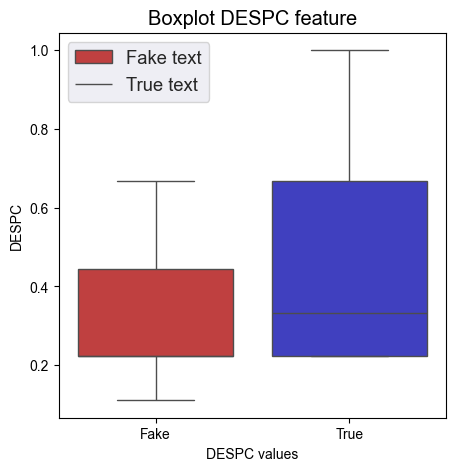

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Linguistic feature: DESSC


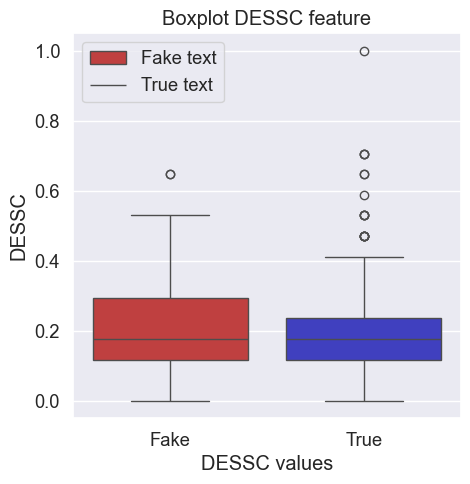

Linguistic feature: DESWC


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


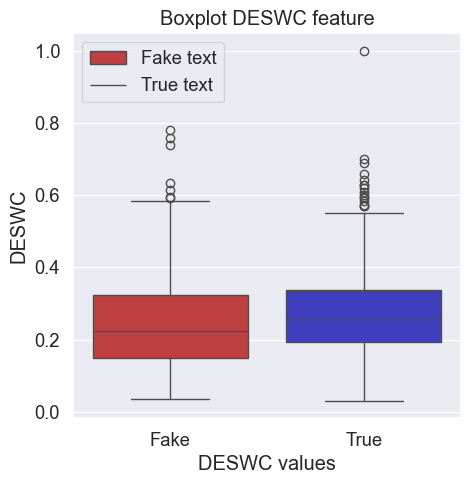

Linguistic feature: DESPL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


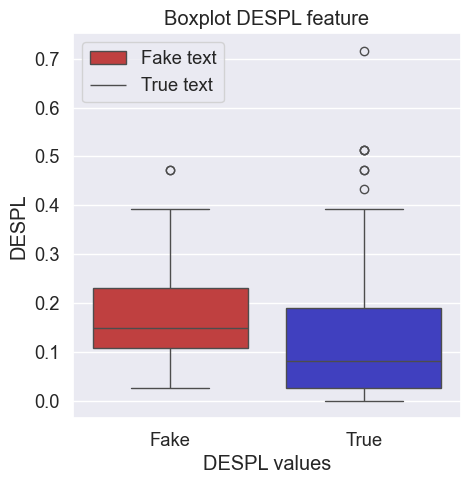

Linguistic feature: DESPLd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


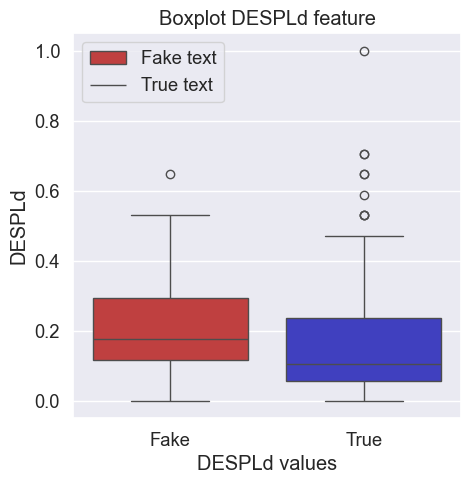

Linguistic feature: DESPLw


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


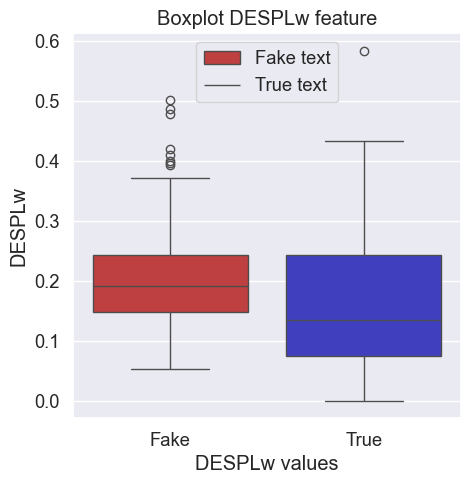

Linguistic feature: DESSL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


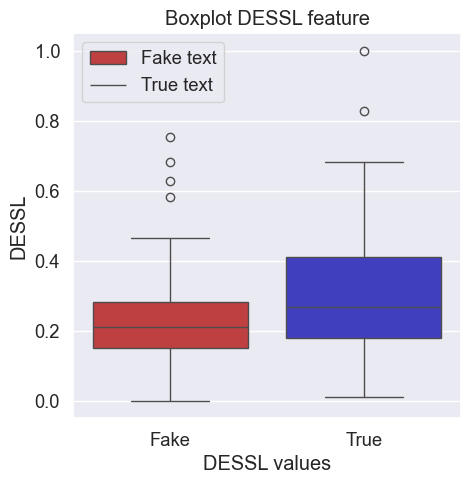

Linguistic feature: DESSLd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


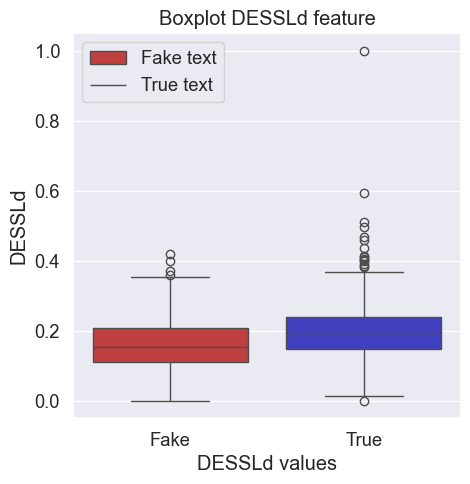

Linguistic feature: DESWLsy


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


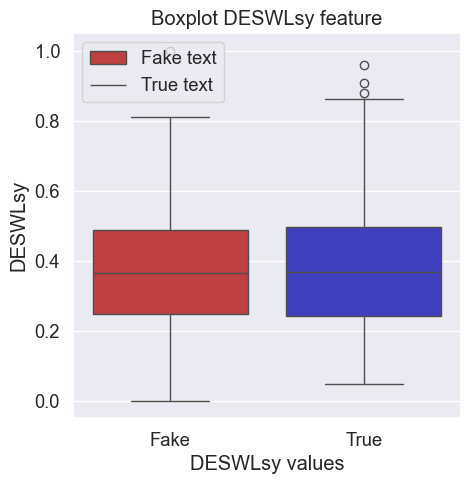

Linguistic feature: DESWLsyd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


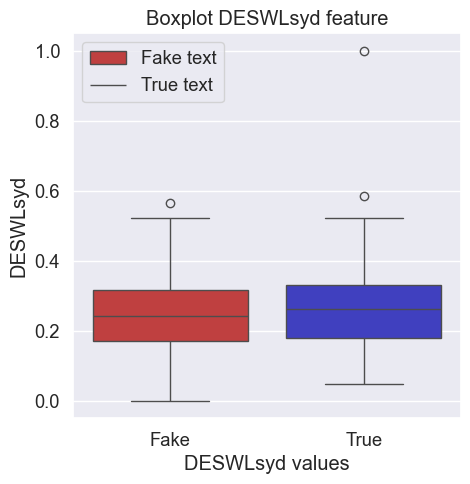

Linguistic feature: DESWLlt


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


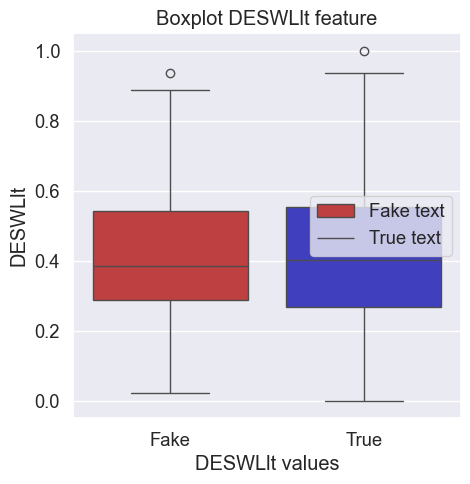

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Linguistic feature: DESWLltd


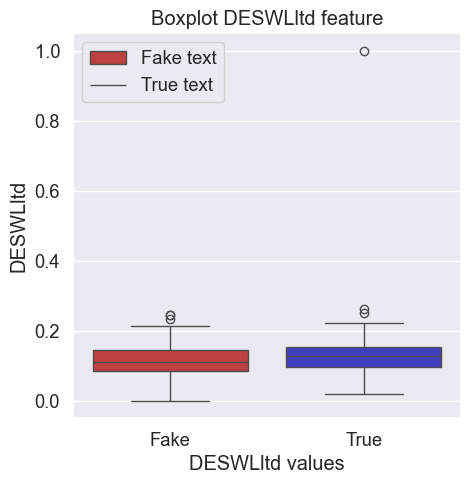

Linguistic feature: LDTTRc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


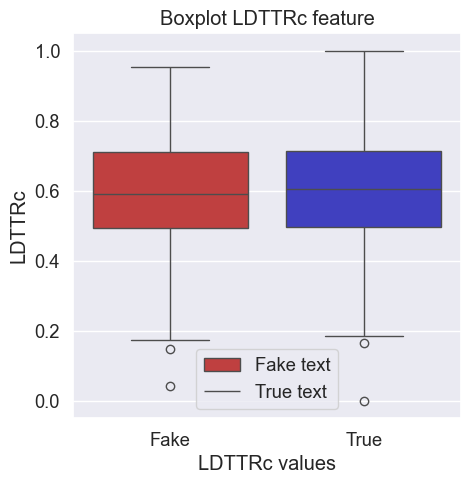

Linguistic feature: LDTTRa


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


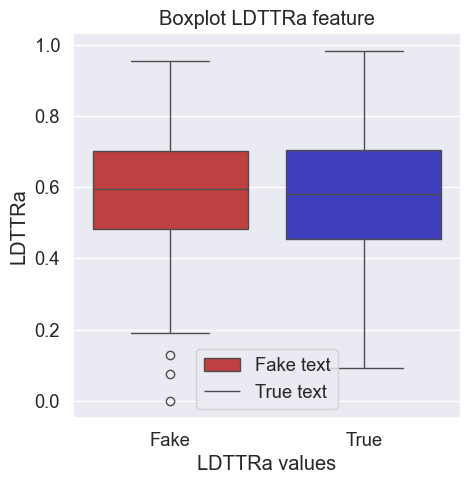

Linguistic feature: LDMTLD


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


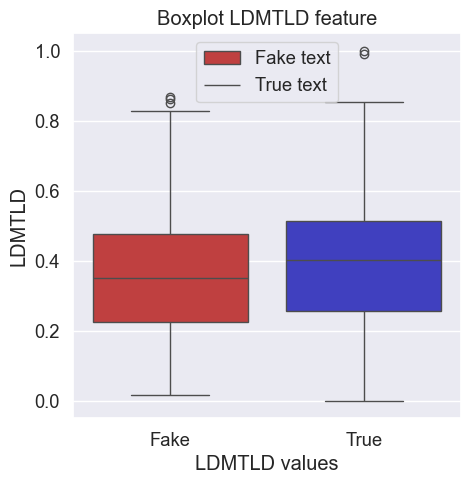

Linguistic feature: LDHDD


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


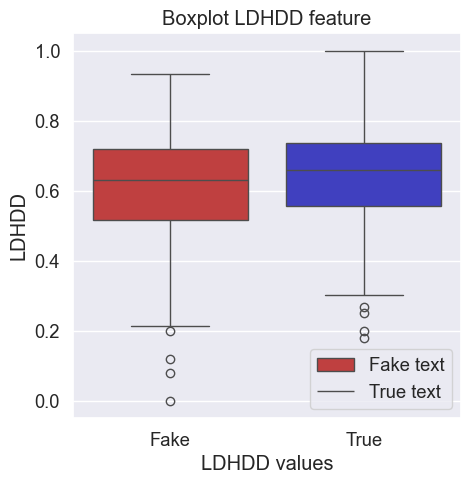

Linguistic feature: SYNLE


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


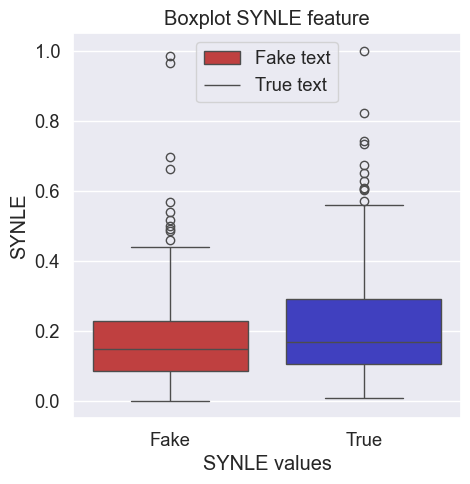

Linguistic feature: SYNNP


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


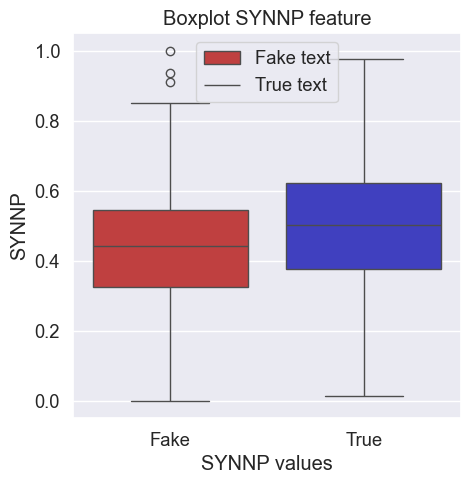

Linguistic feature: SYNMEDpos


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


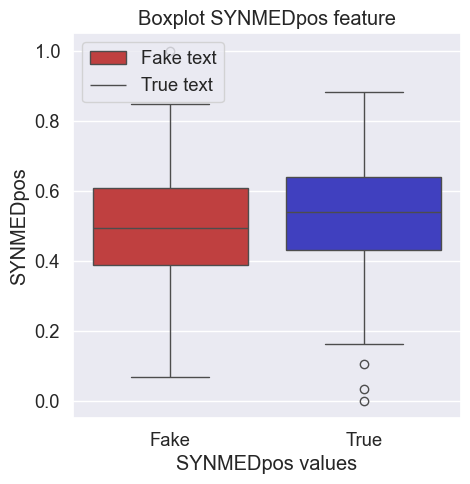

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Linguistic feature: SYNMEDwrd


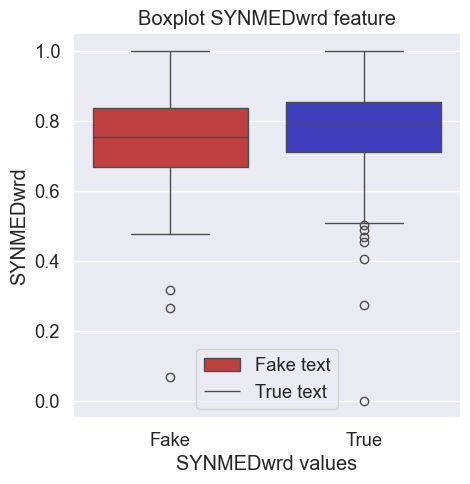

Linguistic feature: SYNMEDlem


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


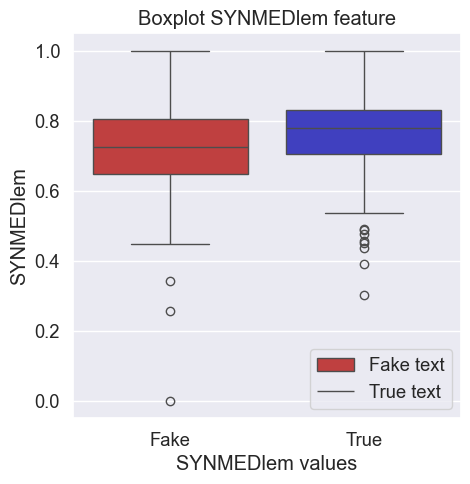

Linguistic feature: SYNSTRUTa


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


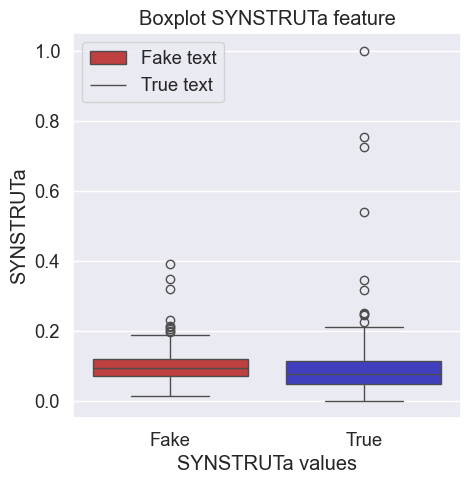

Linguistic feature: RDFRE


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


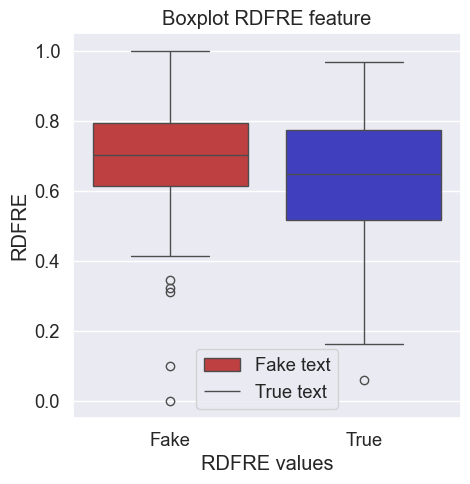

Linguistic feature: READFKGL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


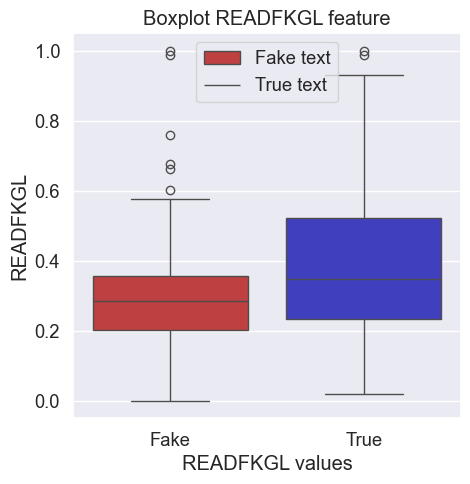

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_ALHPA


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


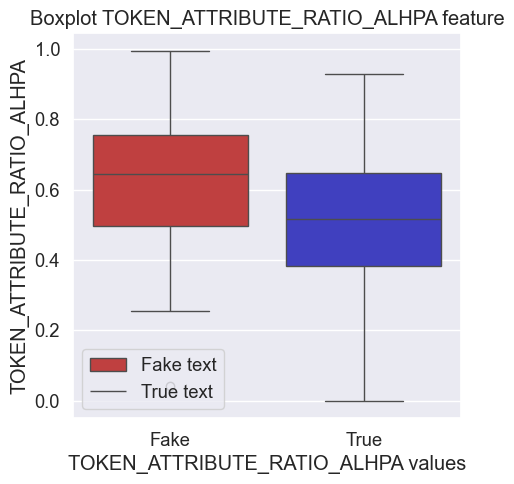

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_DIGIT


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


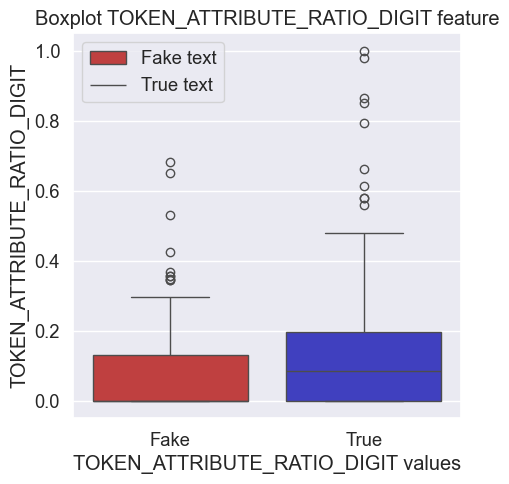

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_PUNCT


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


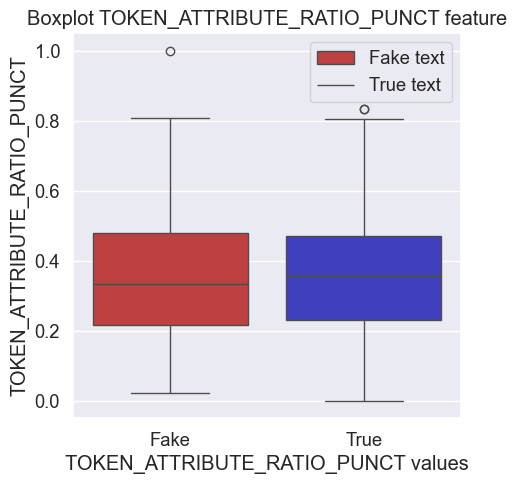

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_URL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


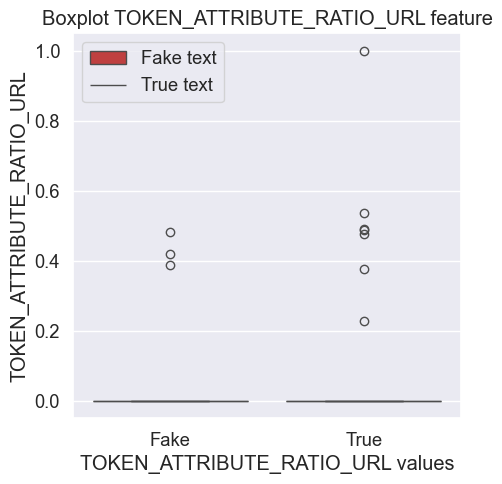

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1s


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


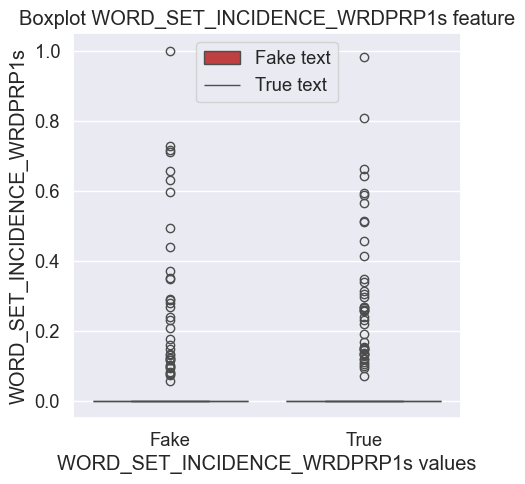

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1p


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


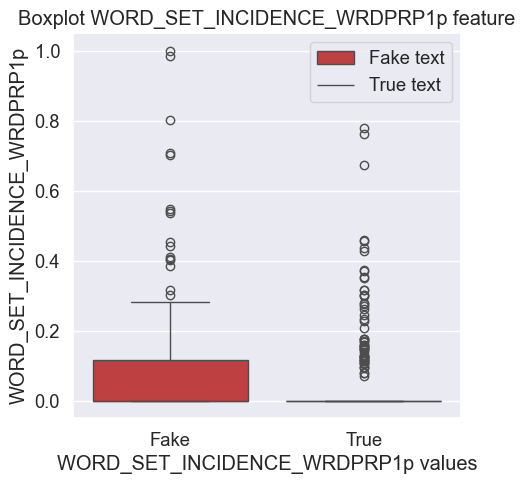

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Linguistic feature: WORD_SET_INCIDENCE_WRDPRP2


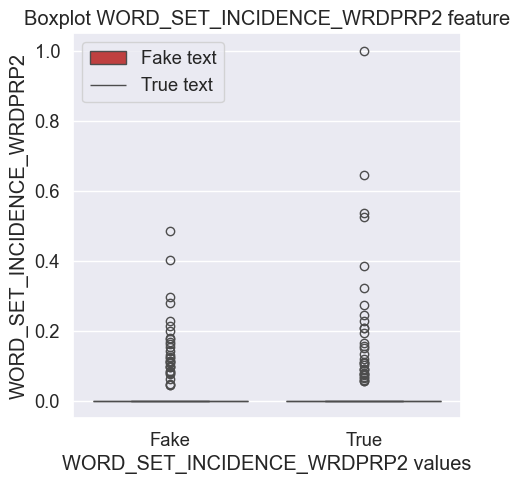

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3s


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


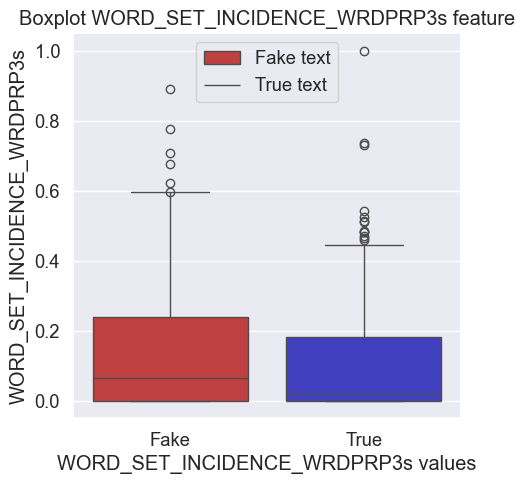

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3p


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


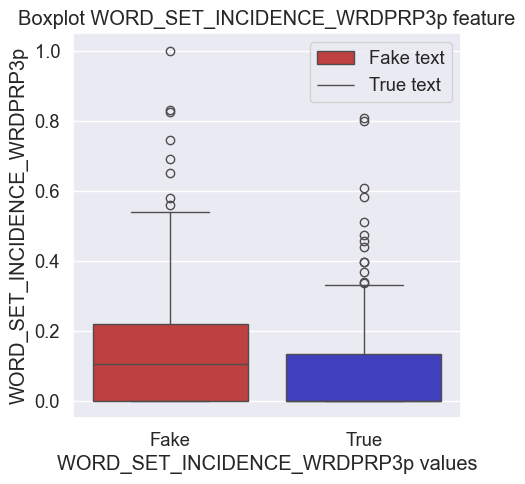

Linguistic feature: WORD_SET_INCIDENCE_CNCCaus


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


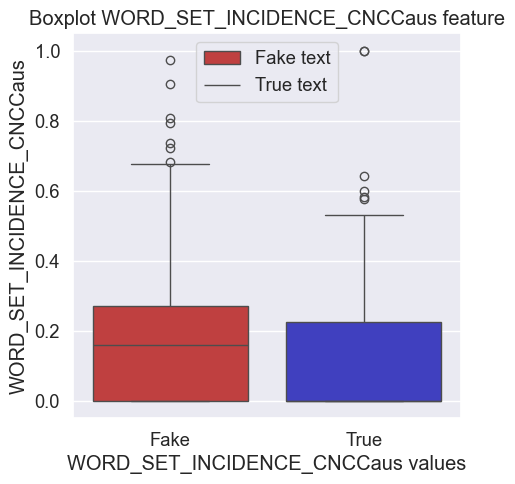

Linguistic feature: WORD_SET_INCIDENCE_CNCLogic


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


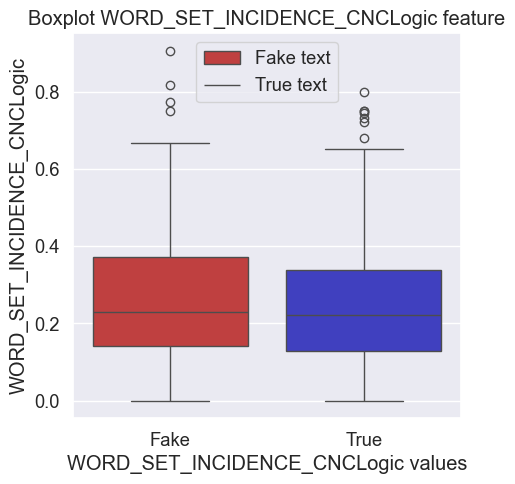

Linguistic feature: WORD_SET_INCIDENCE_CNCTemp


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


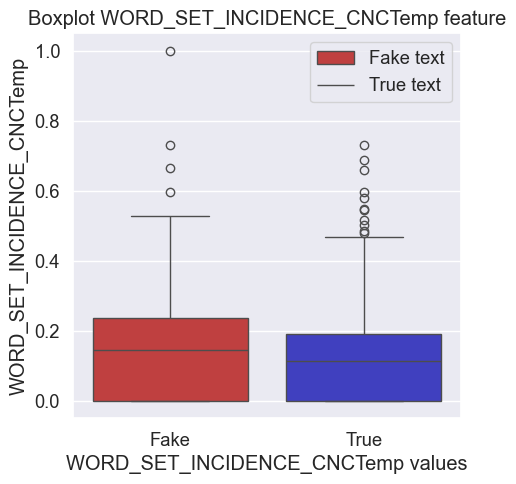

Linguistic feature: WORD_SET_INCIDENCE_CNCAdd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


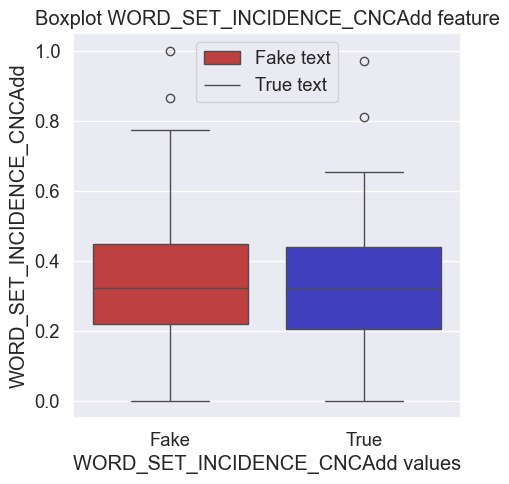

Linguistic feature: WORD_SET_INCIDENCE_CNCPos


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


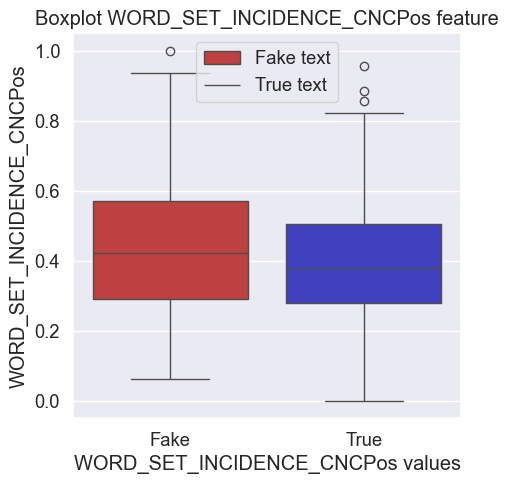

Linguistic feature: WORD_SET_INCIDENCE_CNCNeg


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


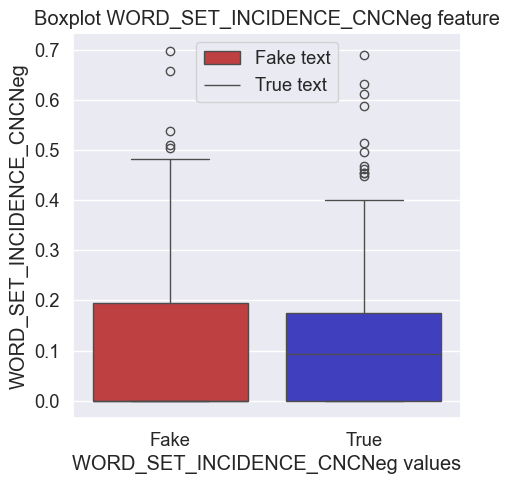

Linguistic feature: WORD_PROPERTY_WRDNOUN


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


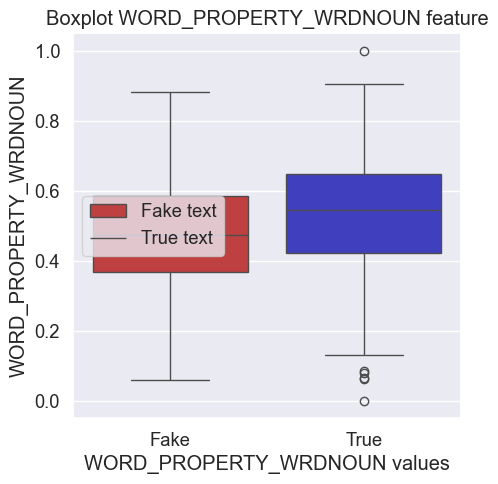

Linguistic feature: WORD_PROPERTY_WRDVERB


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


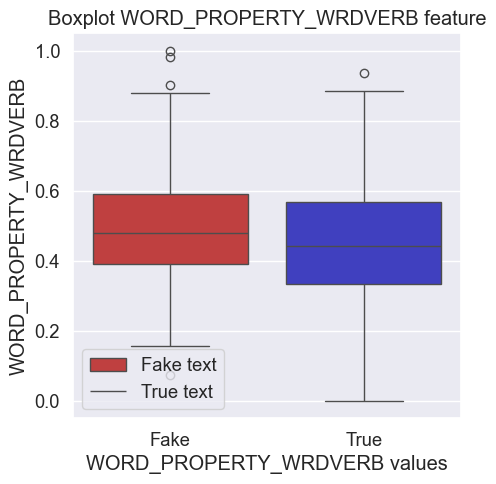

Linguistic feature: WORD_PROPERTY_WRDADJ


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


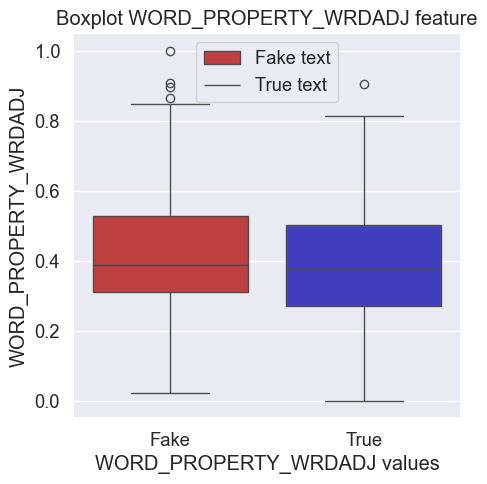

Linguistic feature: WORD_PROPERTY_WRDADV


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


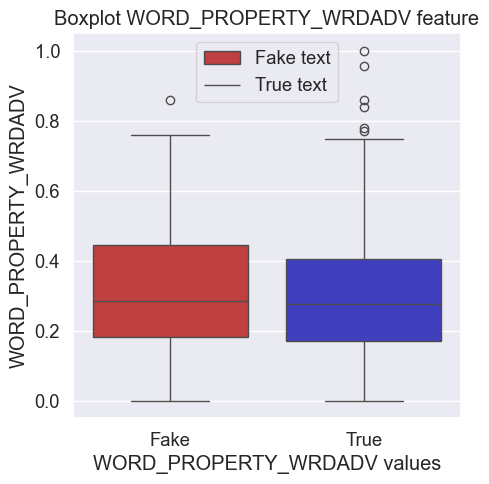

Linguistic feature: WORD_PROPERTY_WRDFRQc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


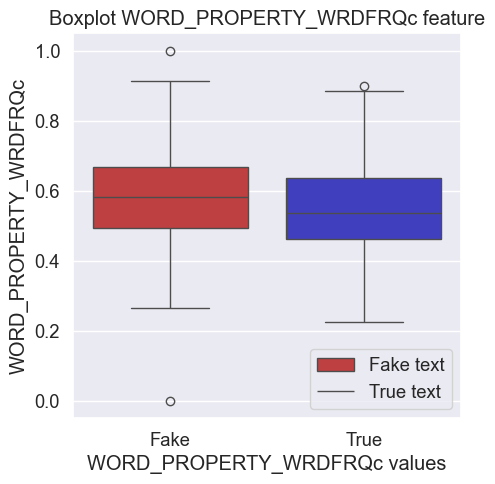

Linguistic feature: WORD_PROPERTY_WRDFRQa


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


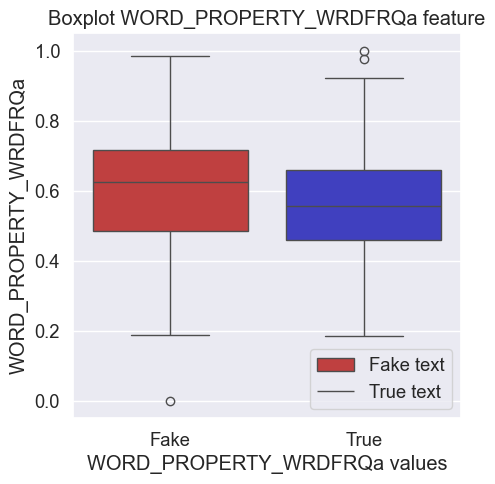

Linguistic feature: WORD_PROPERTY_WRDFRQmc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


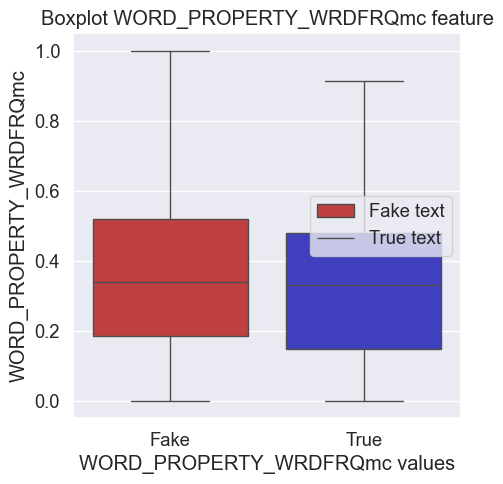

Linguistic feature: WORD_PROPERTY_WRDFAMc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


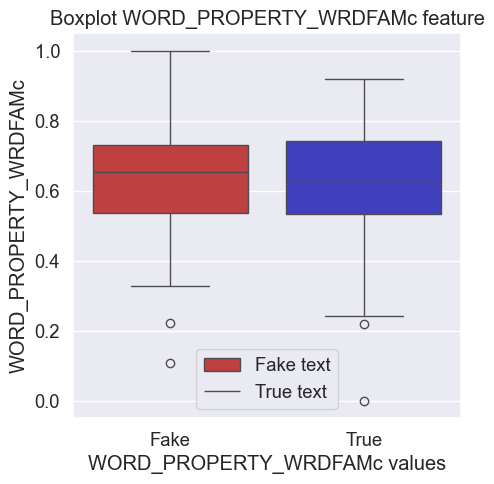

Linguistic feature: WORD_PROPERTY_WRDCNCc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


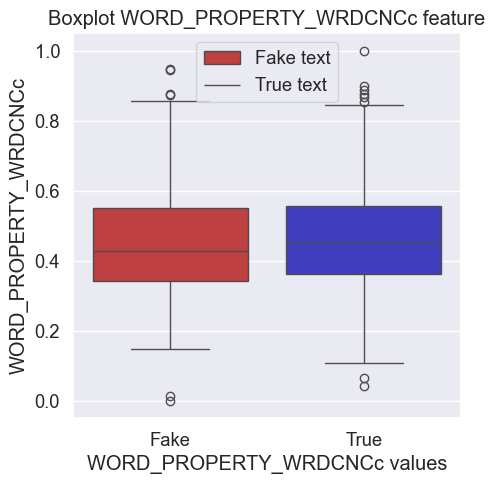

Linguistic feature: WORD_PROPERTY_WRDIMGc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


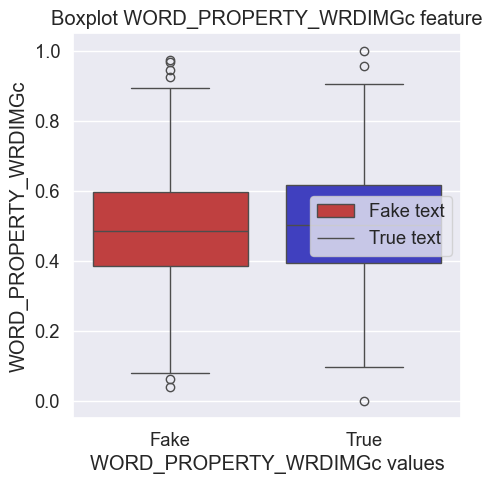

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Linguistic feature: WORD_PROPERTY_WRDMEAc


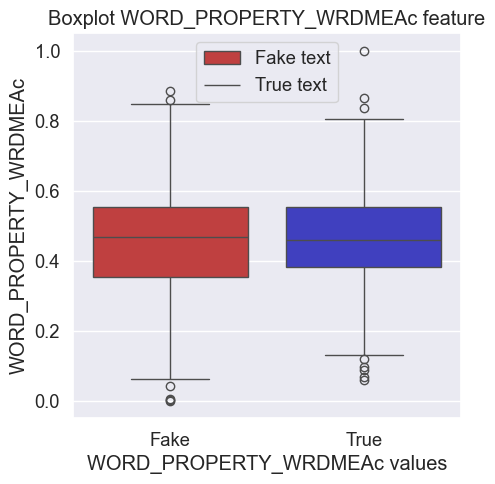

Linguistic feature: WORD_PROPERTY_WRDPOLc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


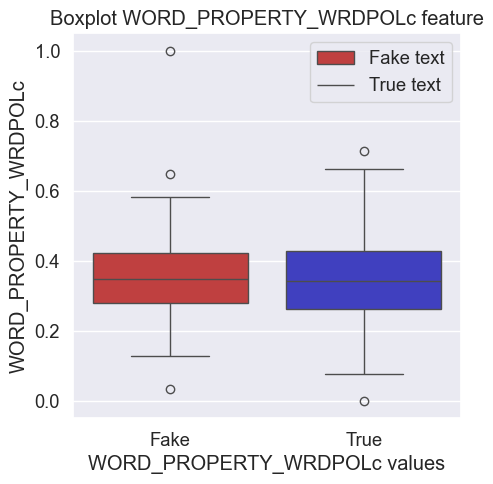

Linguistic feature: WORD_PROPERTY_WRDHYPn


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


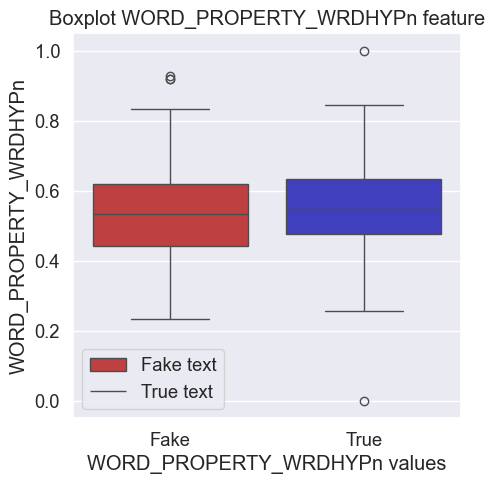

Linguistic feature: WORD_PROPERTY_WRDHYPv


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


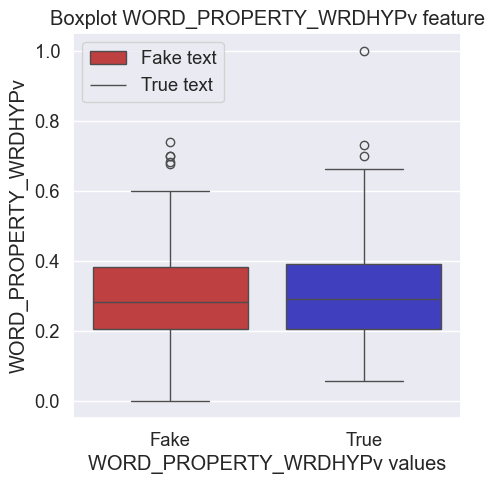

Linguistic feature: WORD_PROPERTY_WRDHYPnv


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


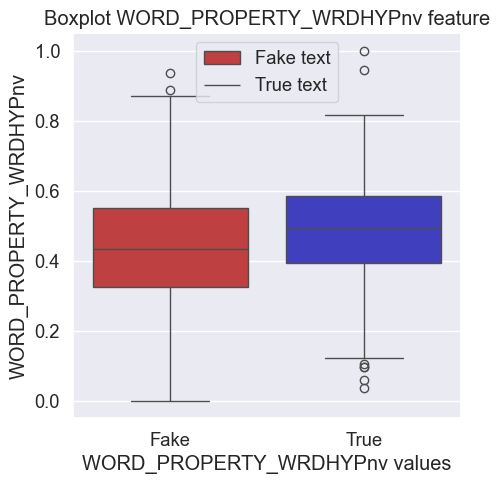

Linguistic feature: WORD_PROPERTY_AOA


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


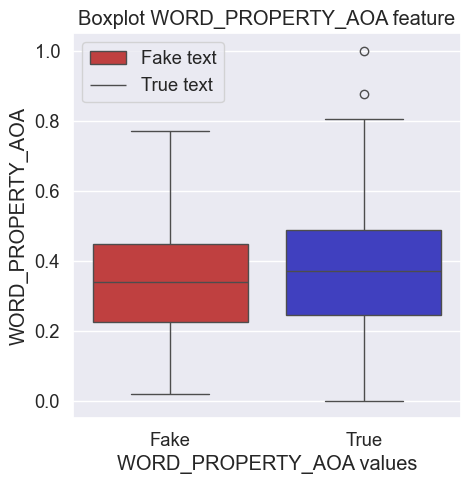

Linguistic feature: WORD_PROPERTY_AOA_MAX


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


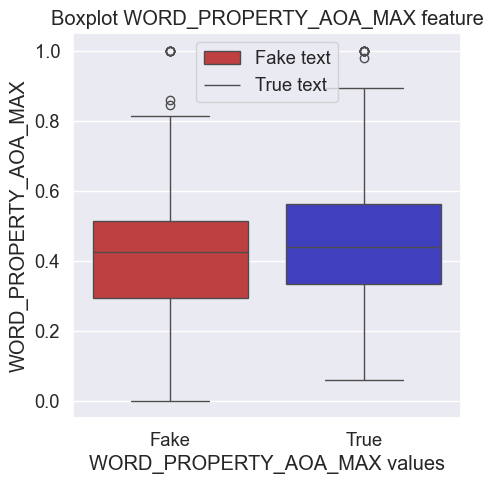

Linguistic feature: WORD_PROPERTY_CONCRETENESS


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


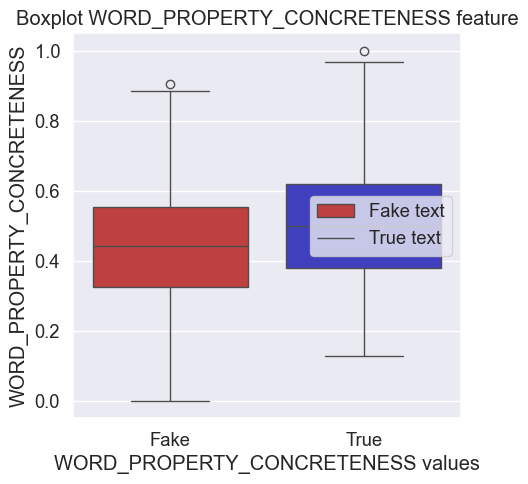

Linguistic feature: WORD_PROPERTY_PREVALENCE


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


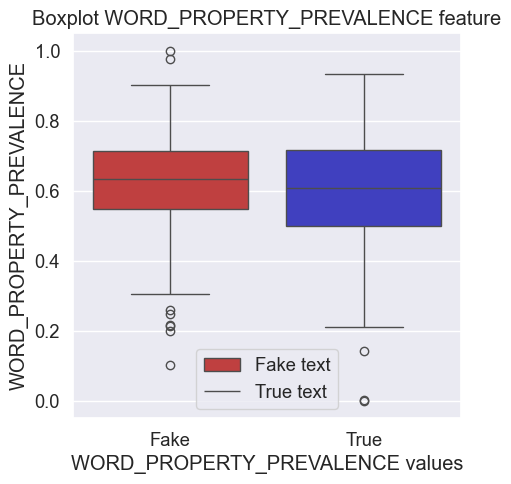

Linguistic feature: WORD_SET_INCIDENCE_C4_COMMON_WORDS


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


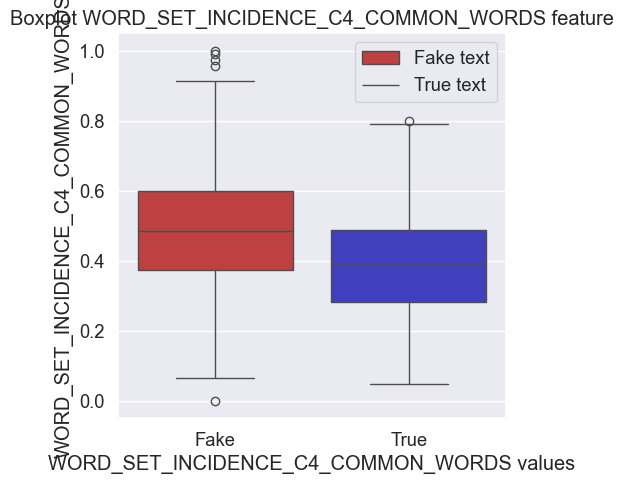

Linguistic feature: Polarity


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


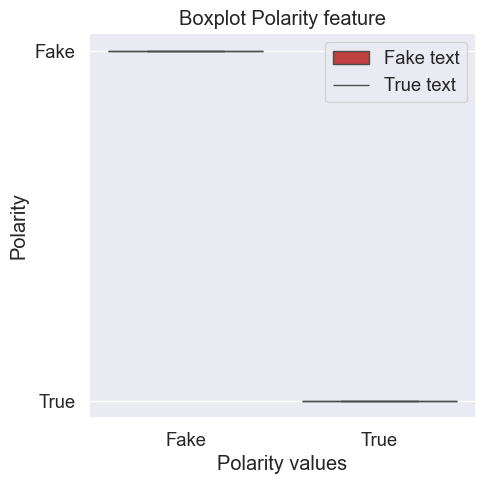

Linguistic feature: Overall_Sentiment


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


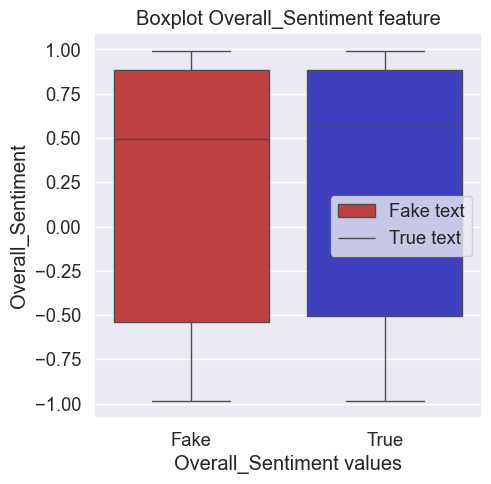

Linguistic feature: Positive_Sentiment


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


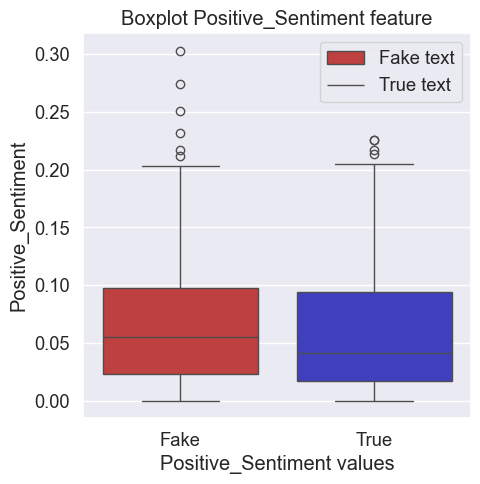

Linguistic feature: Negative_Sentiment


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


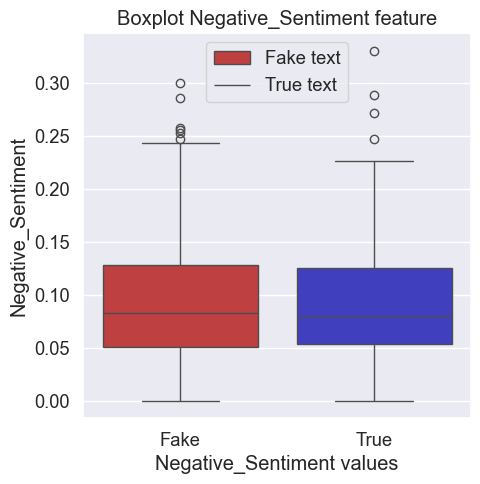

Linguistic feature: Neutral_Sentiment


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


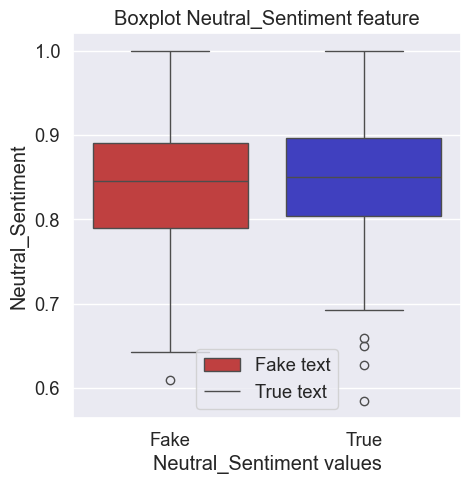

Linguistic feature: Subjectivity


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


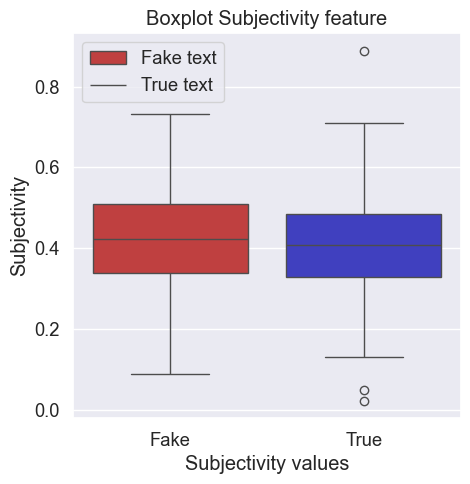

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_scaled:
  try: 
    print("Linguistic feature:", col)

    target_fake = df_scaled[df_scaled['Polarity'] == "Fake"]
    target_true = df_scaled[df_scaled['Polarity'] == "True"]



    fig, ax = plt.subplots(figsize=(5, 5))
    sns.set_theme(style='darkgrid', font_scale=1.2)
    sns.boxplot(target_fake, y=target_fake[col], x="Polarity", color="red", saturation=0.5, fill=True)
    sns.boxplot(target_true, y=target_true[col], x="Polarity", color="blue", saturation=0.5, fill=True)    

    
    plt.title("Boxplot {} feature".format(col))
    plt.legend(labels = ["Fake text", "True text"])
    
    plt.xlabel("{} values".format(col))

    plt.show()
  except:
    continue

Visualizing KDE

Linguistic feature: DESPC


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

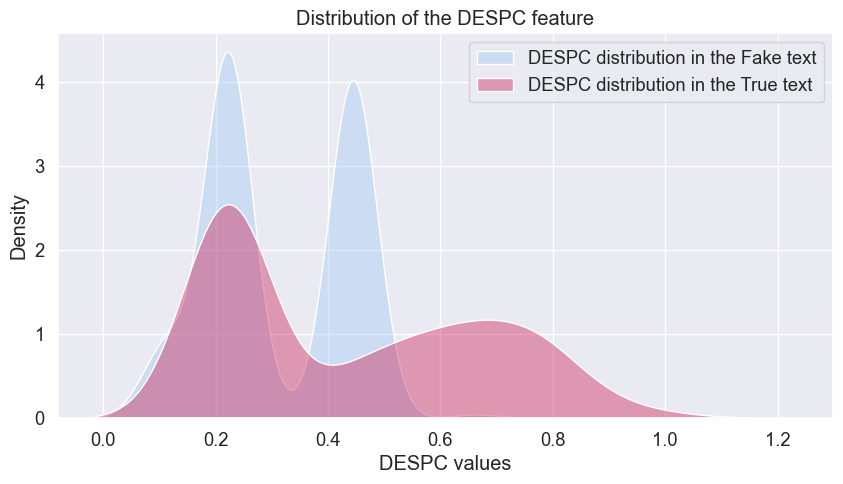

Linguistic feature: DESSC


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

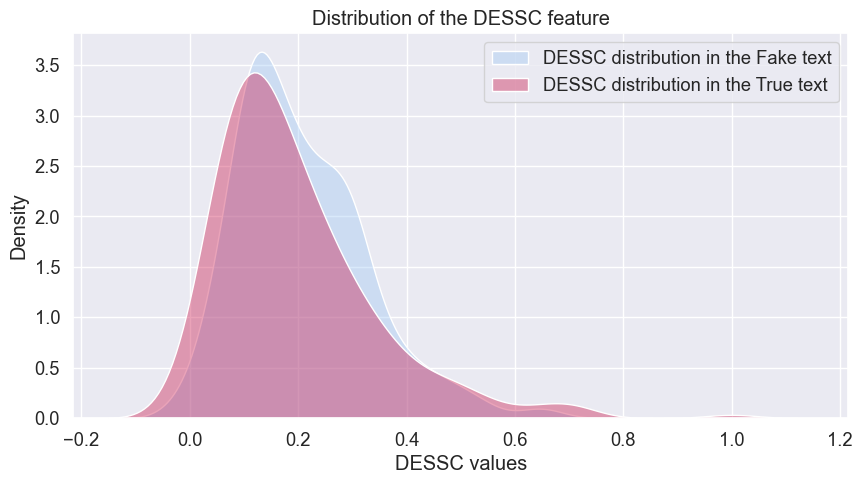

Linguistic feature: DESWC


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

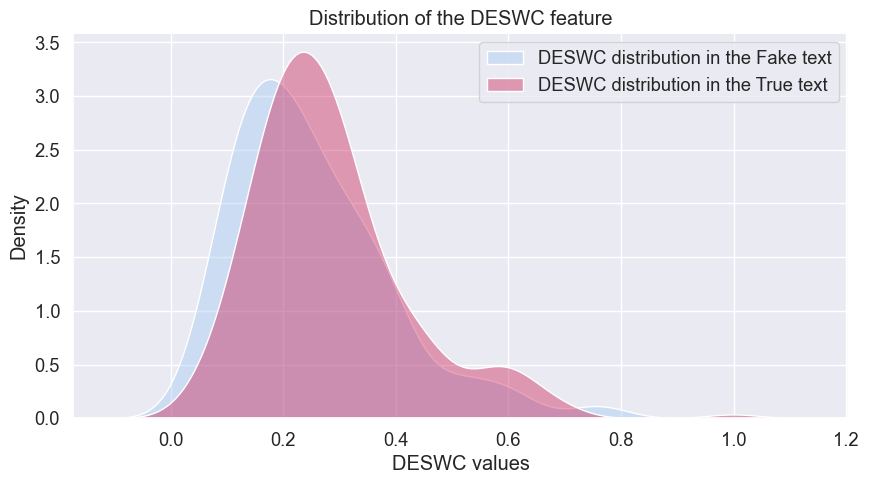

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: DESPL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

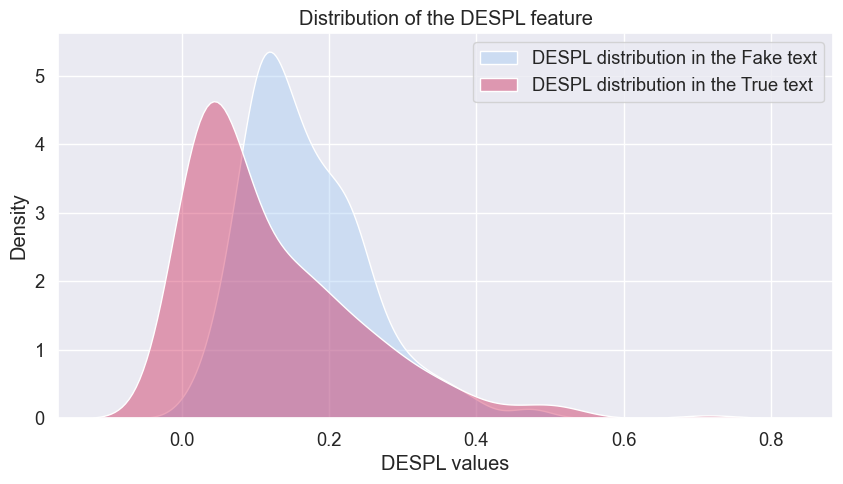

Linguistic feature: DESPLd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

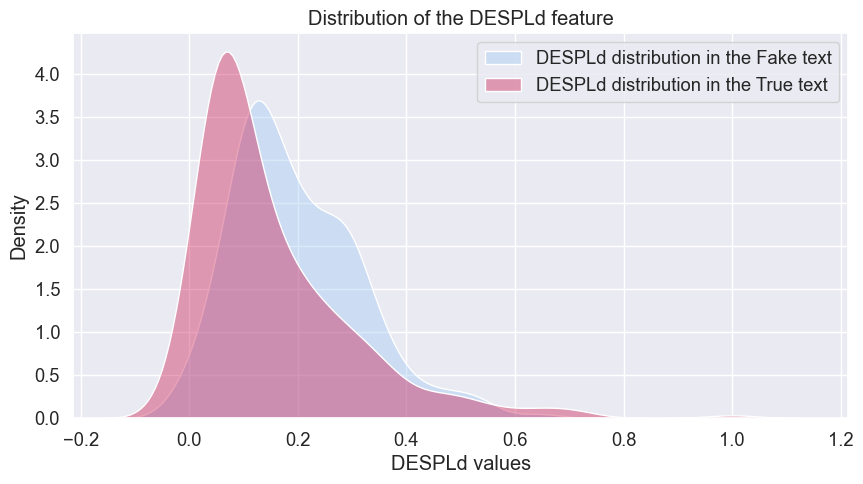

Linguistic feature: DESPLw


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

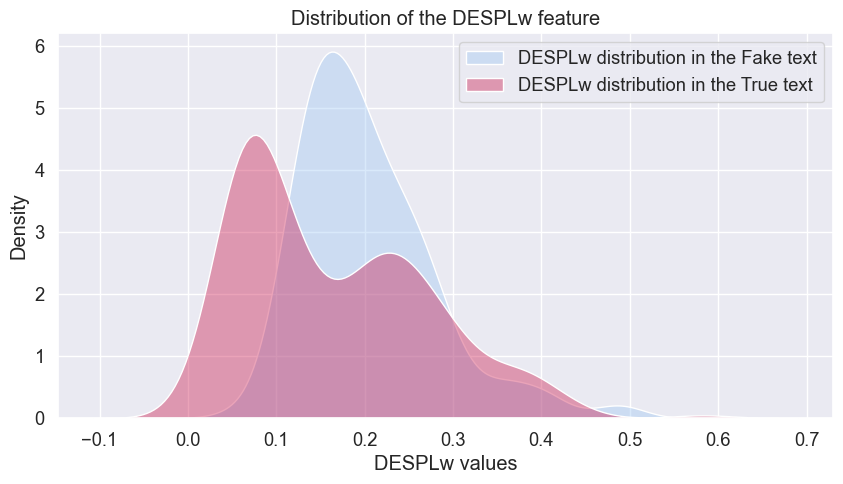

Linguistic feature: DESSL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

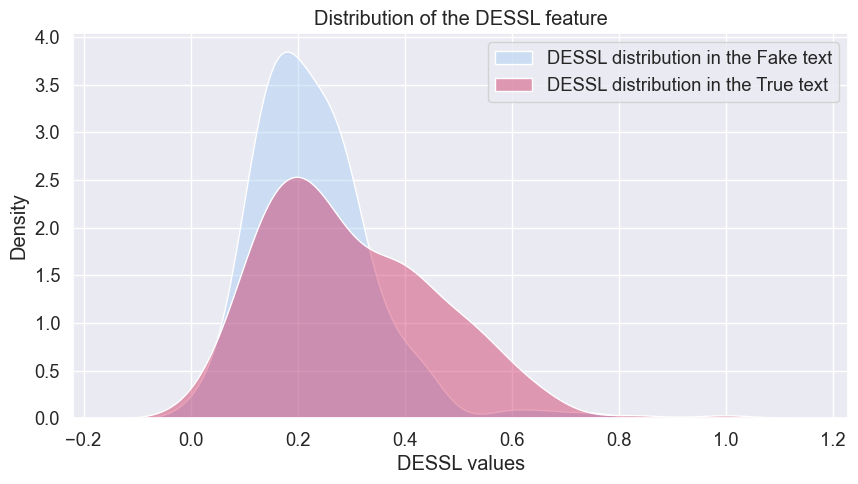

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: DESSLd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

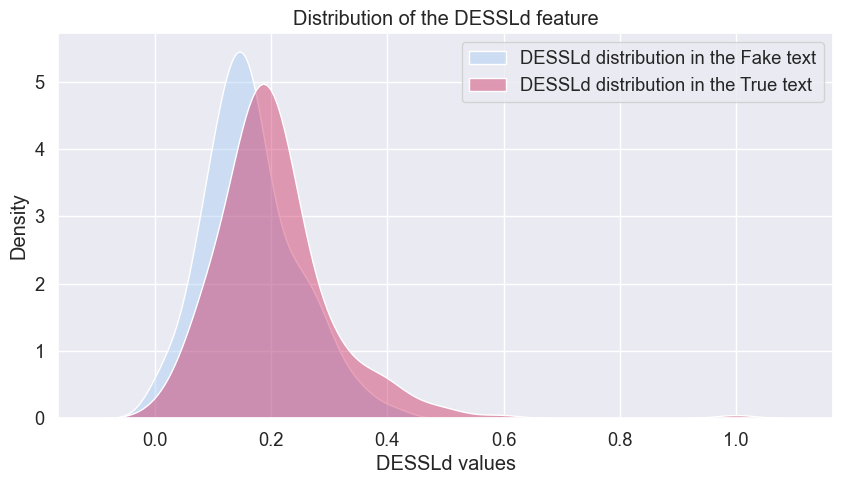

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: DESWLsy


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

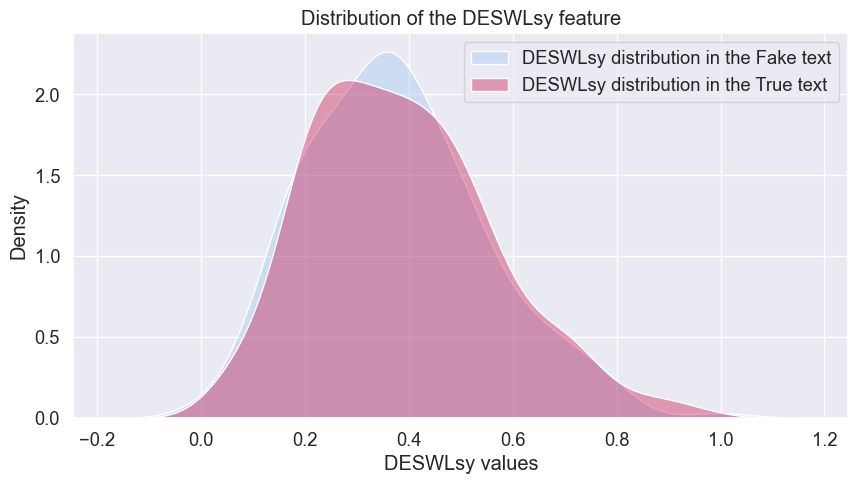

Linguistic feature: DESWLsyd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

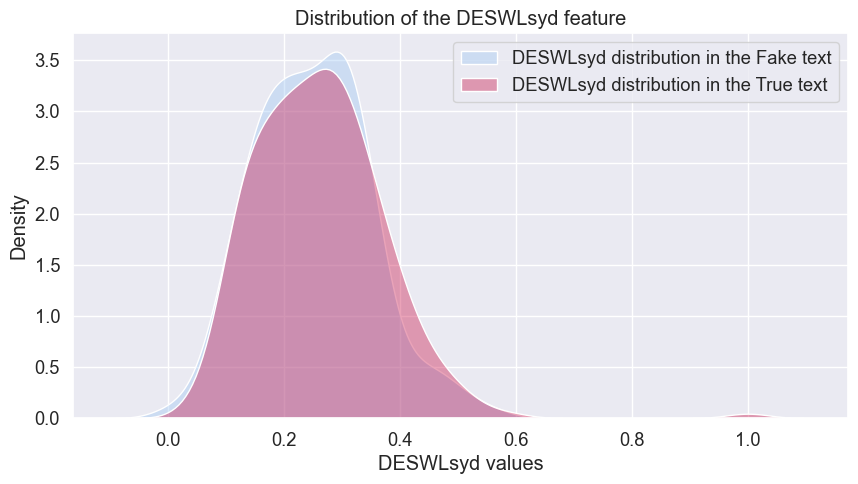

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: DESWLlt


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

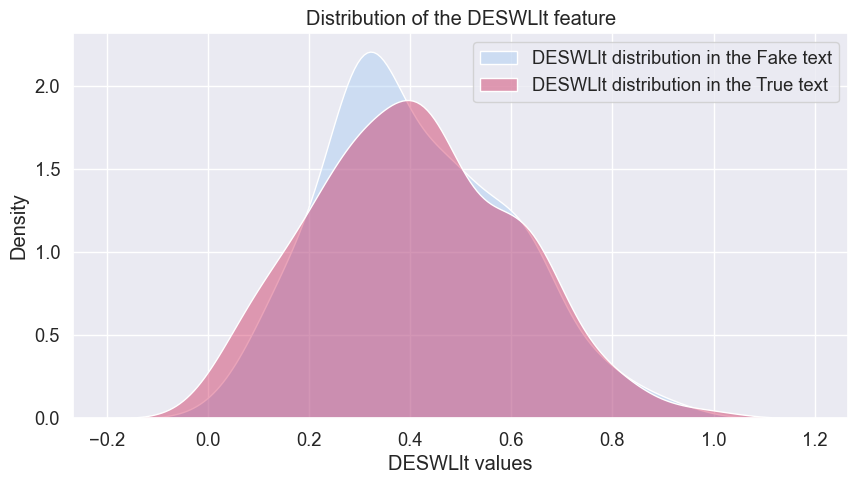

Linguistic feature: DESWLltd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

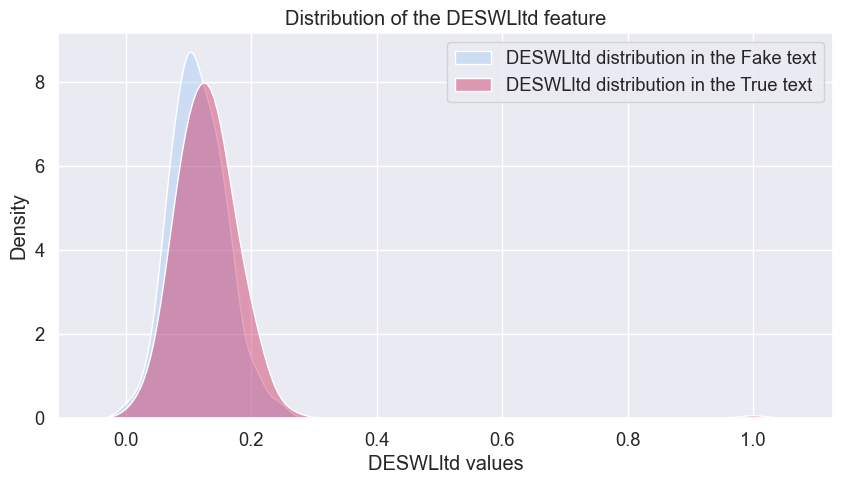

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: LDTTRc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

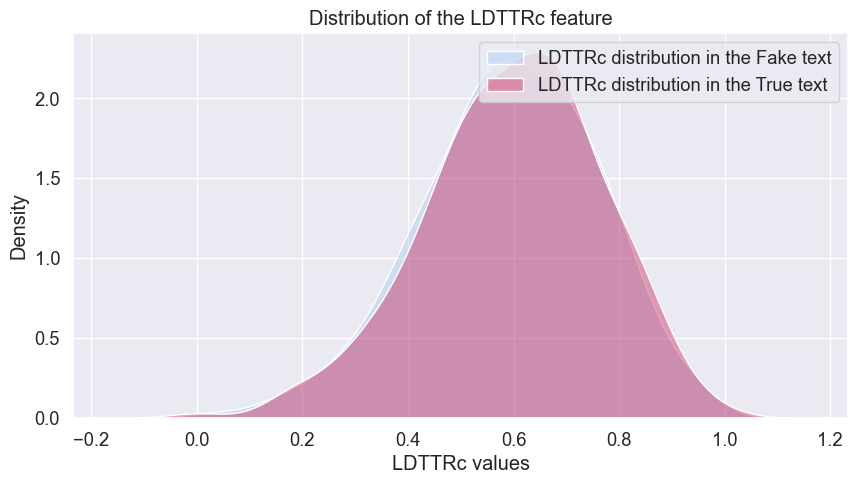

Linguistic feature: LDTTRa


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

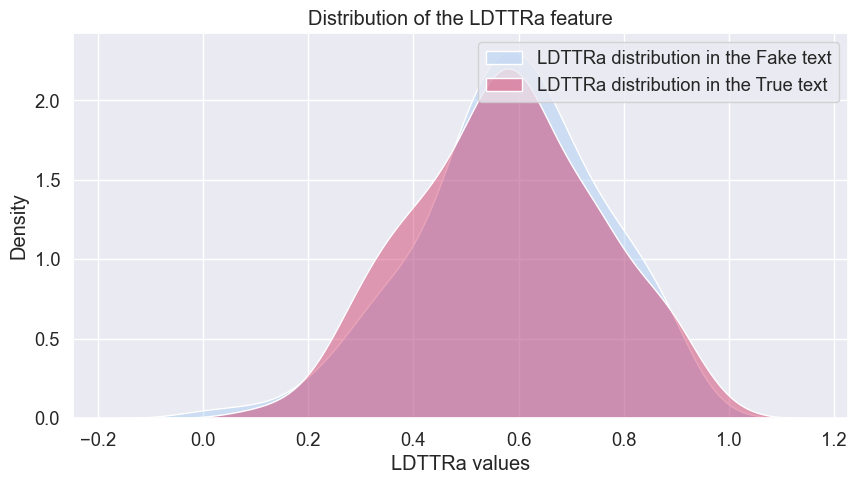

Linguistic feature: LDMTLD


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

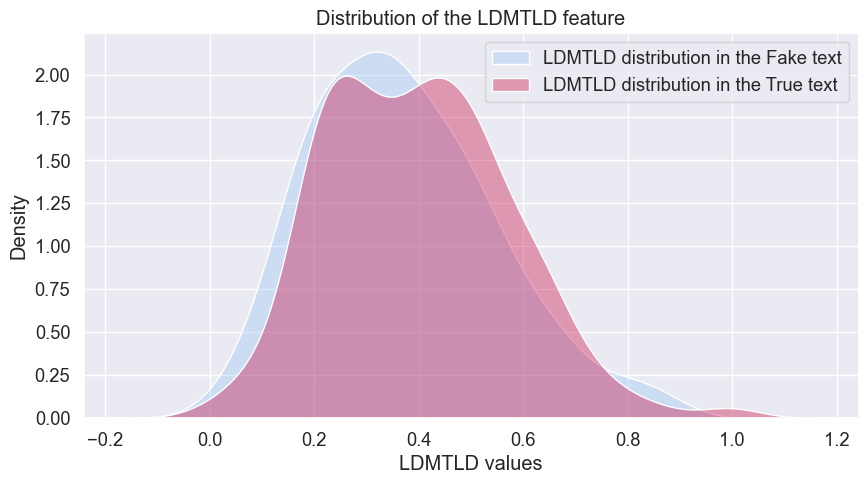

Linguistic feature: LDHDD


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

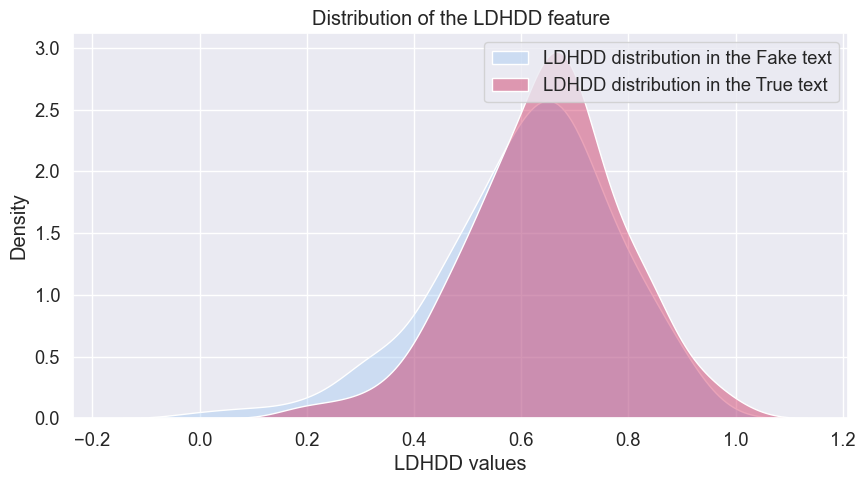

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: SYNLE


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

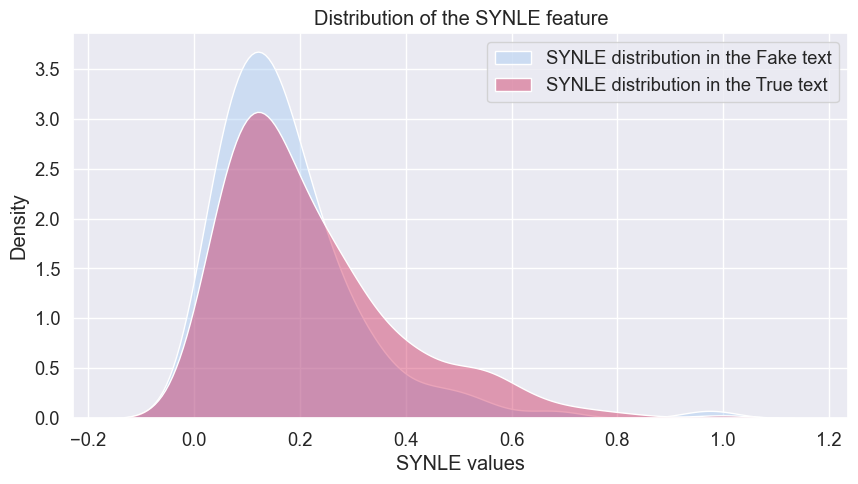

Linguistic feature: SYNNP


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

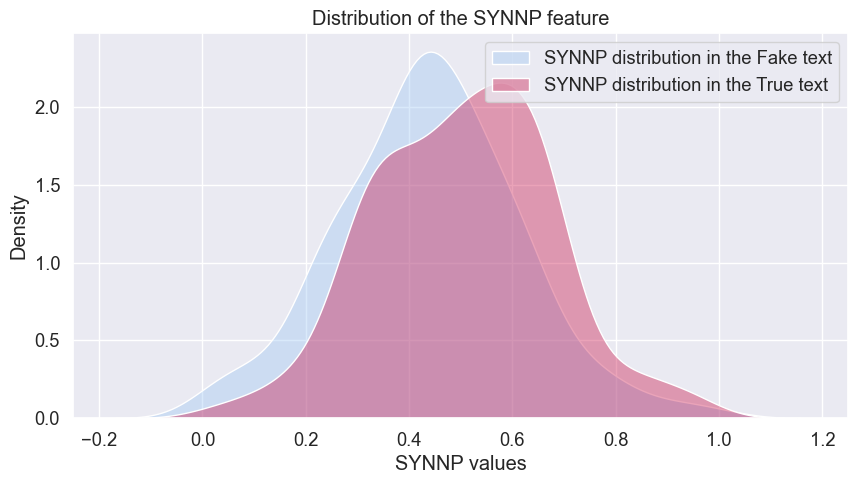

Linguistic feature: SYNMEDpos


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

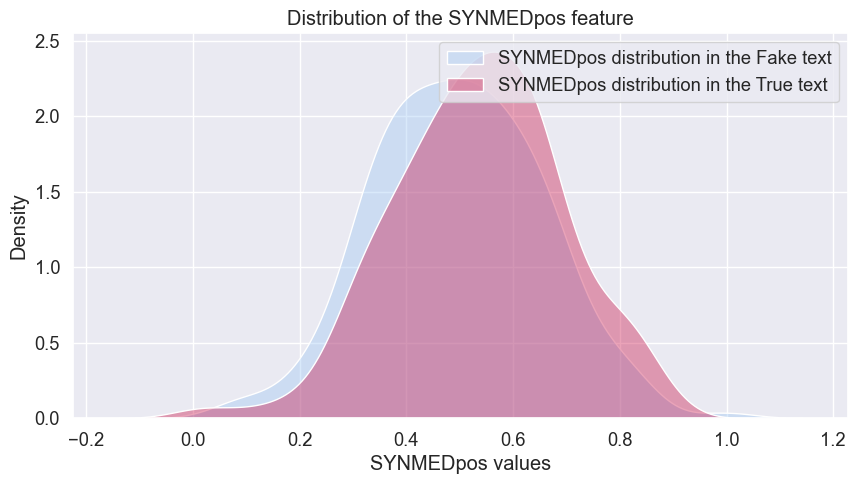

Linguistic feature: SYNMEDwrd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

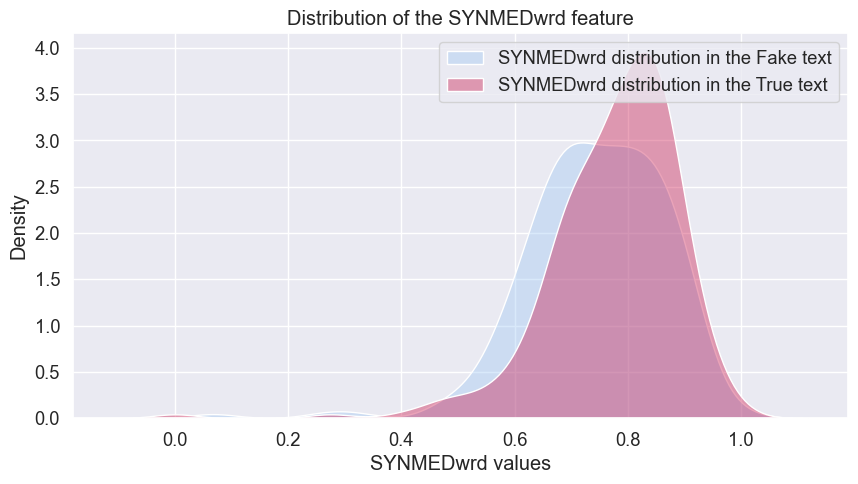

Linguistic feature: SYNMEDlem


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

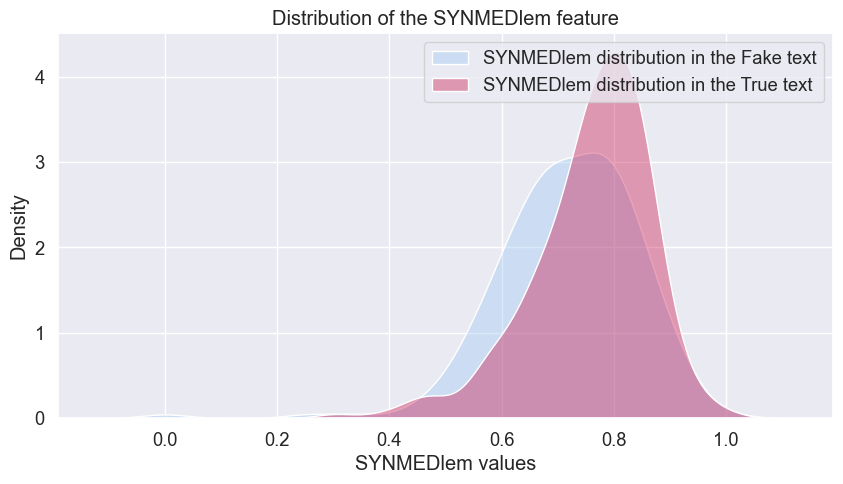

Linguistic feature: SYNSTRUTa


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

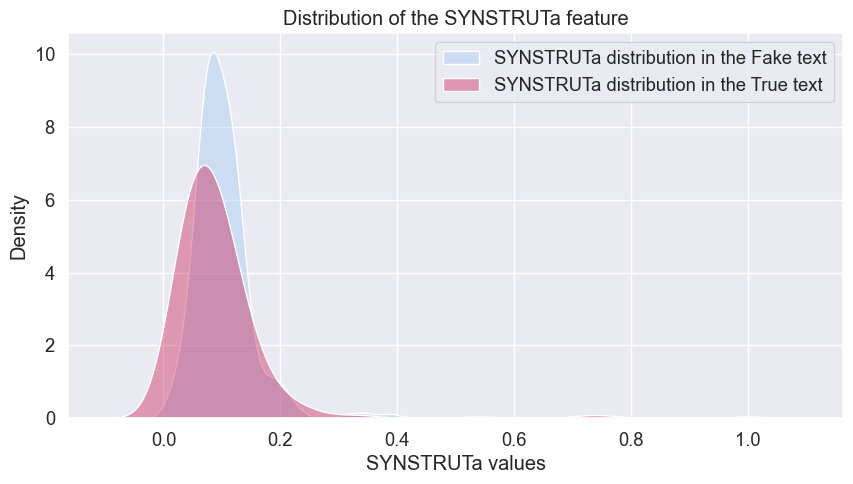

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

Linguistic feature: RDFRE


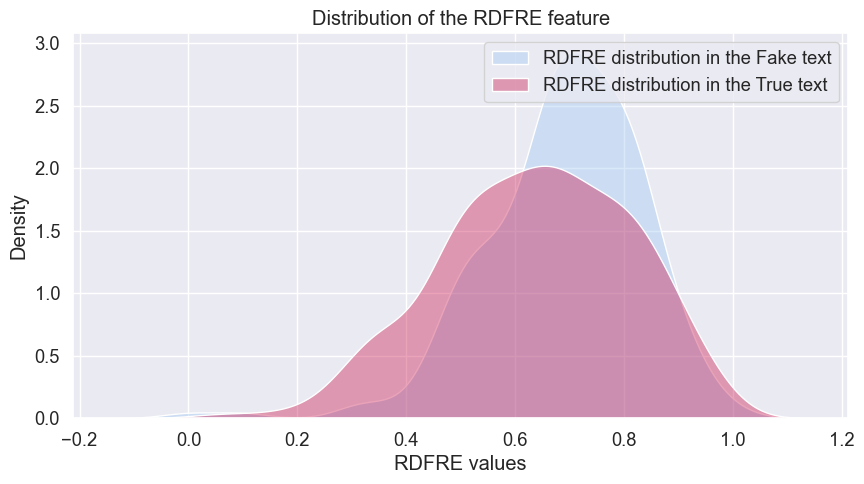

Linguistic feature: READFKGL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

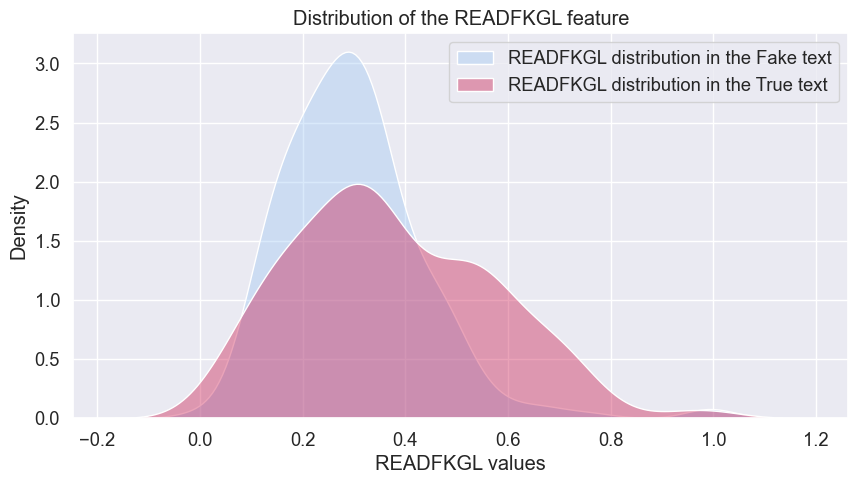

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_ALHPA


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

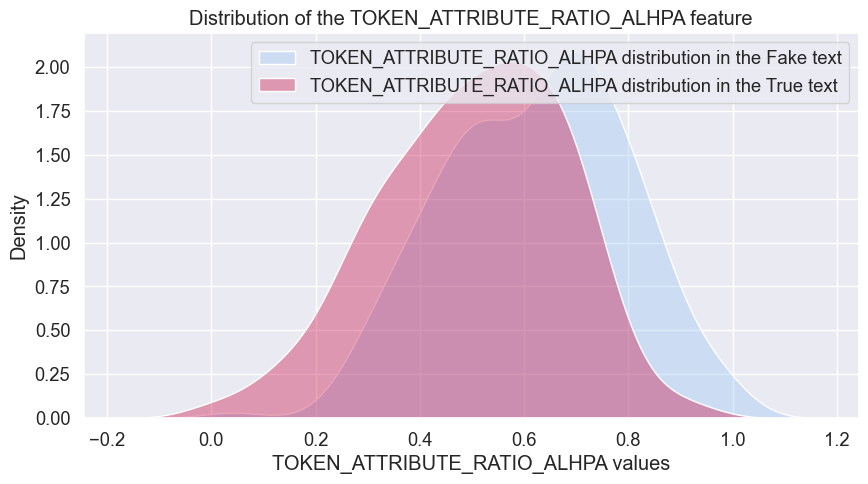

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_DIGIT


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

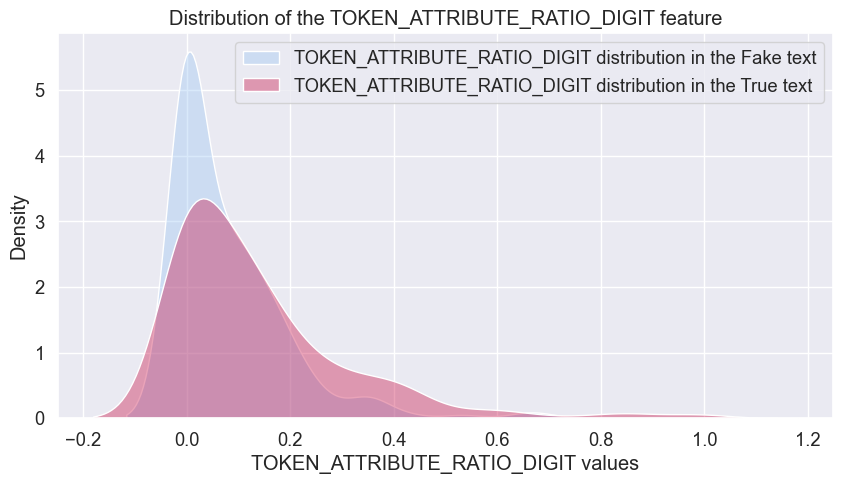

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: TOKEN_ATTRIBUTE_RATIO_PUNCT


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

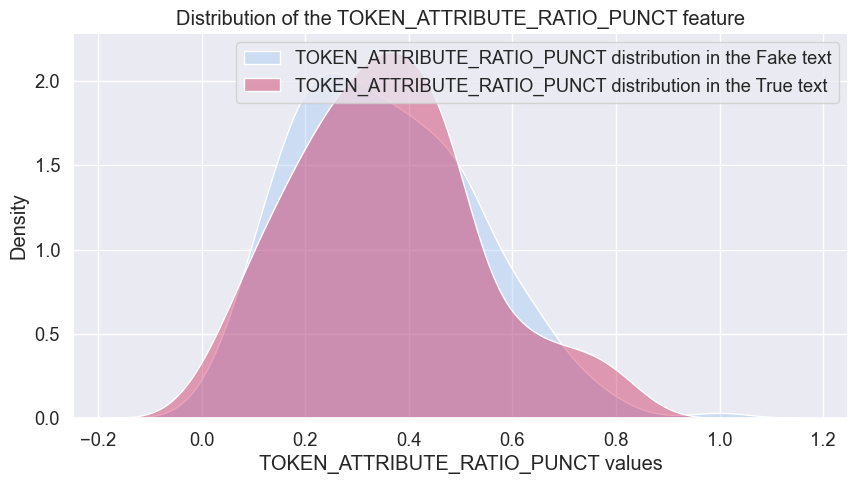

Linguistic feature: TOKEN_ATTRIBUTE_RATIO_URL


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

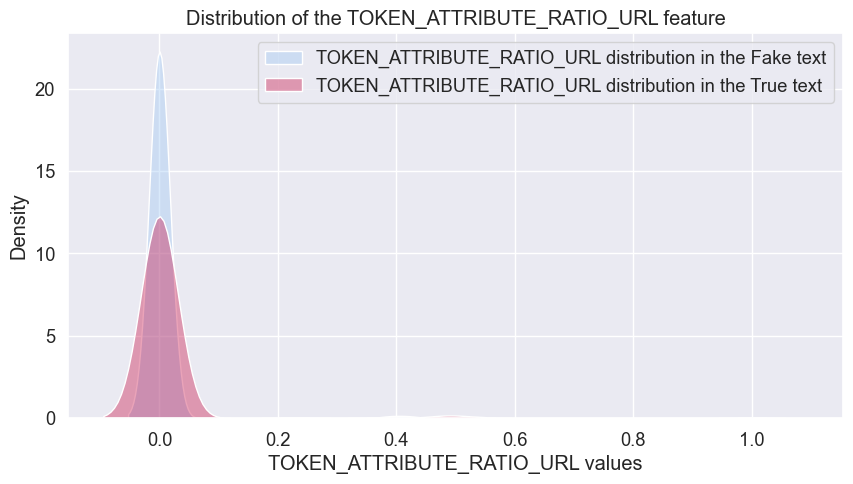

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1s


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

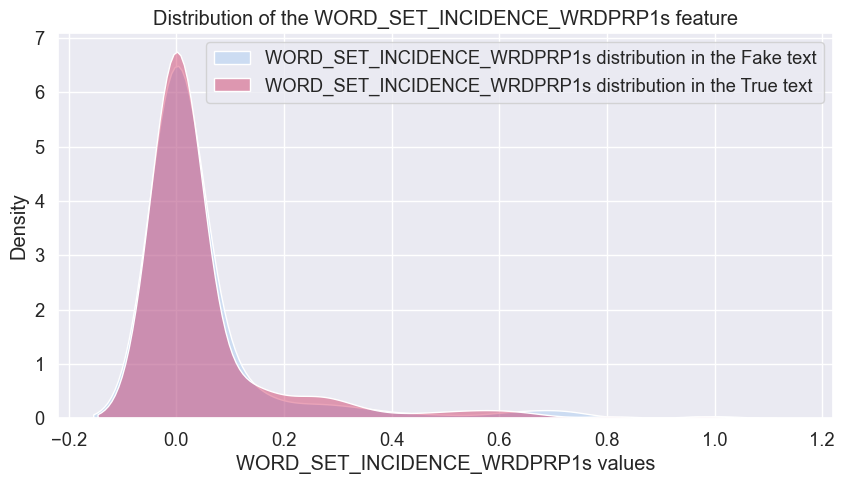

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP1p


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

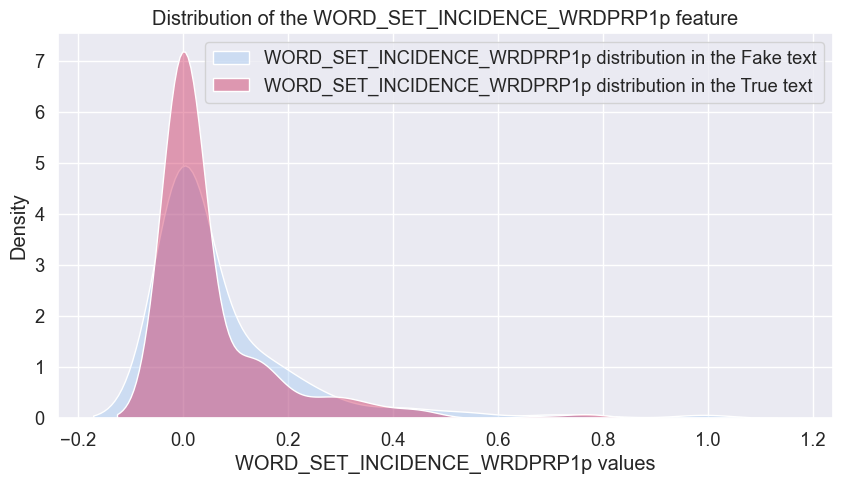

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP2


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

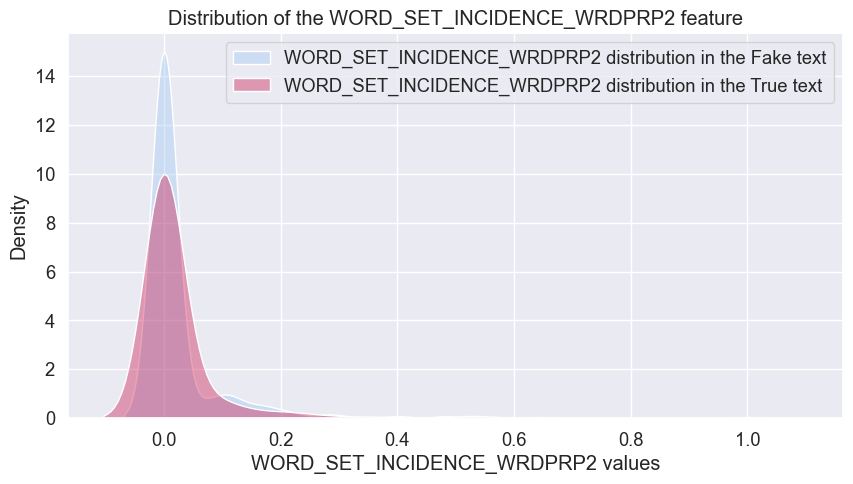

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3s


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

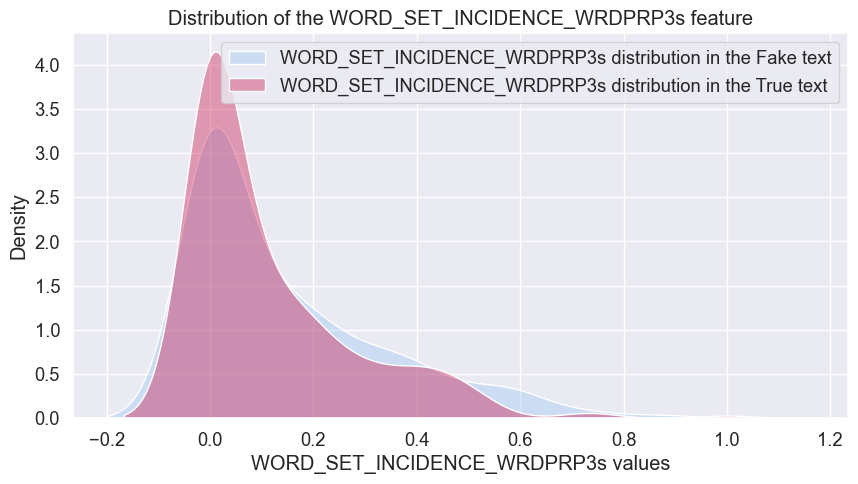

Linguistic feature: WORD_SET_INCIDENCE_WRDPRP3p


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

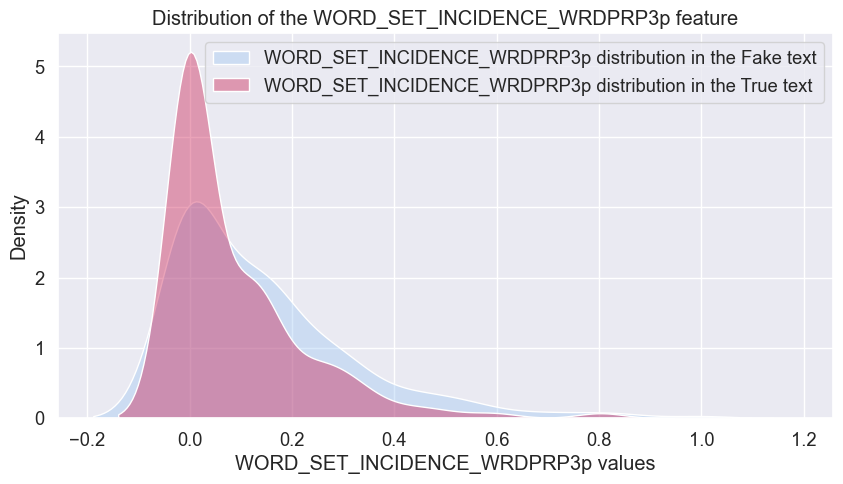

Linguistic feature: WORD_SET_INCIDENCE_CNCCaus


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

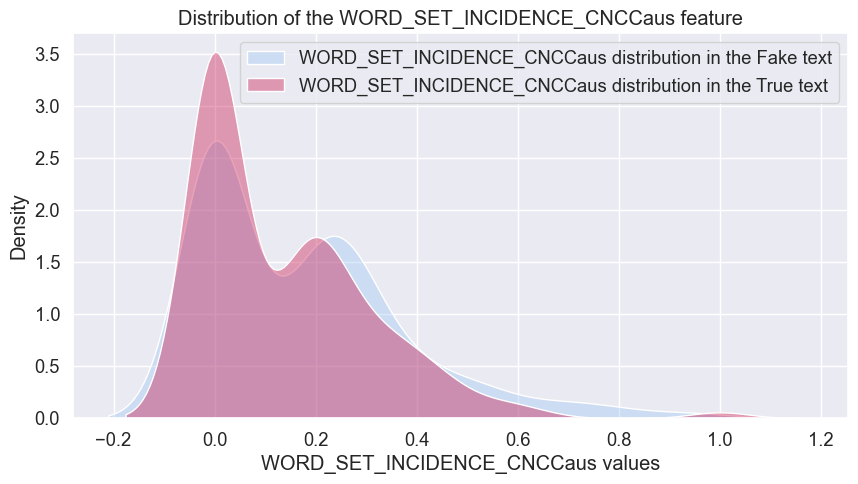

Linguistic feature: WORD_SET_INCIDENCE_CNCLogic


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

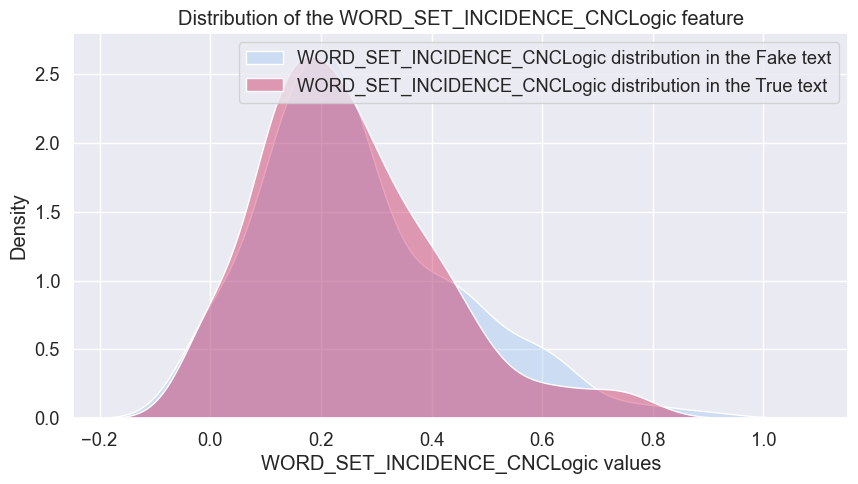

Linguistic feature: WORD_SET_INCIDENCE_CNCTemp


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

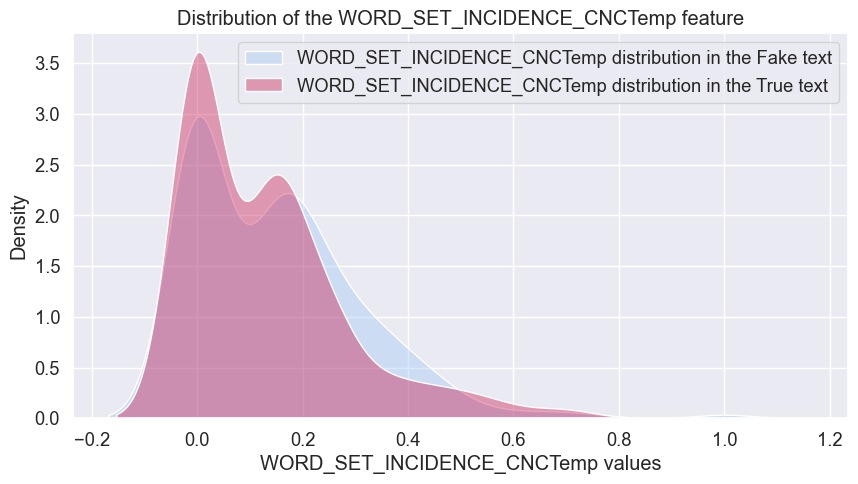

Linguistic feature: WORD_SET_INCIDENCE_CNCAdd


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

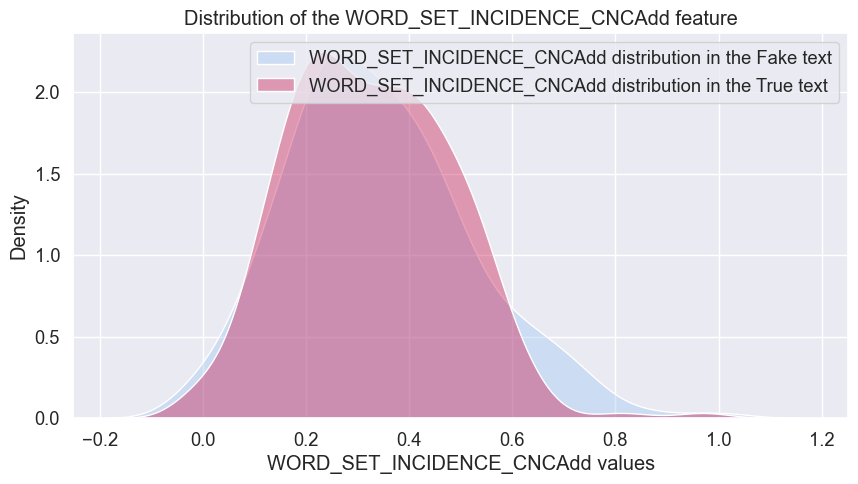

Linguistic feature: WORD_SET_INCIDENCE_CNCPos


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

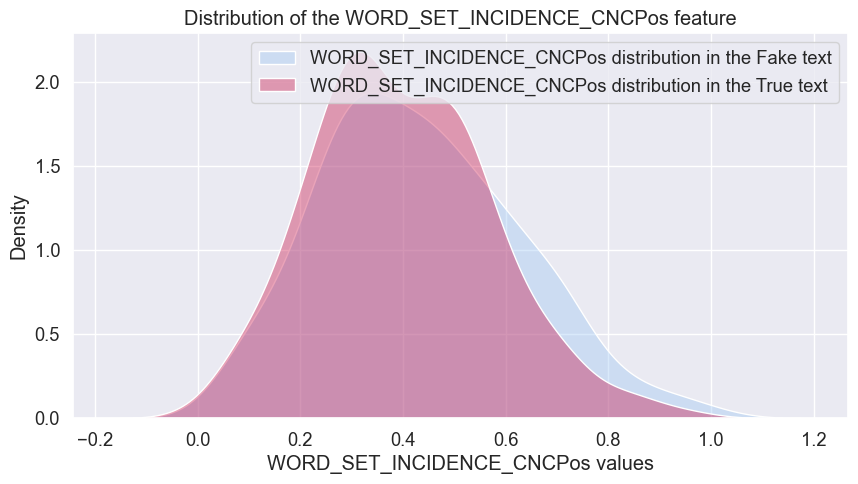

Linguistic feature: WORD_SET_INCIDENCE_CNCNeg


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

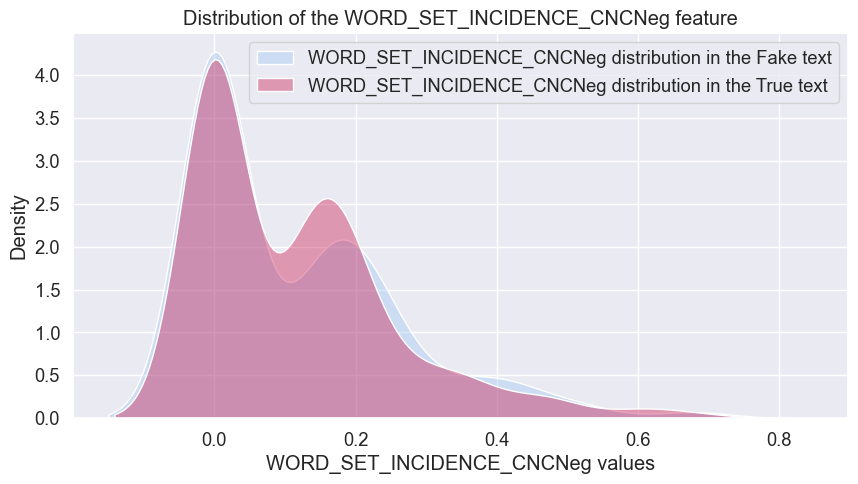

Linguistic feature: WORD_PROPERTY_WRDNOUN


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

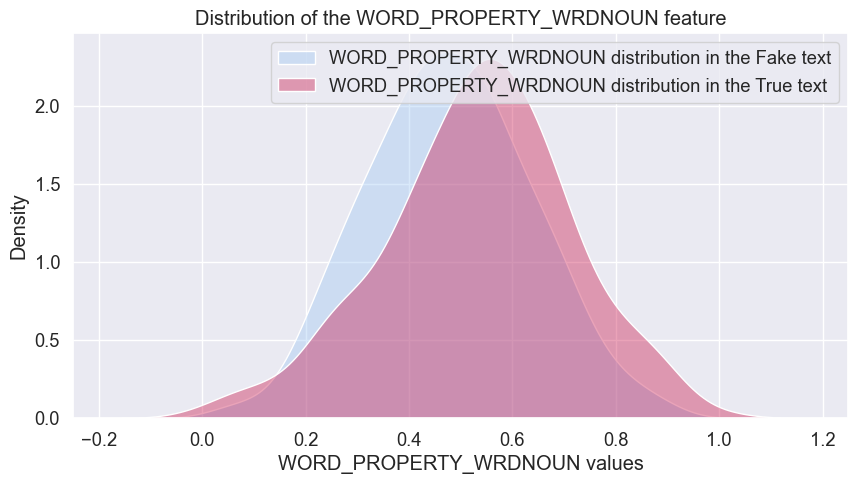

Linguistic feature: WORD_PROPERTY_WRDVERB


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

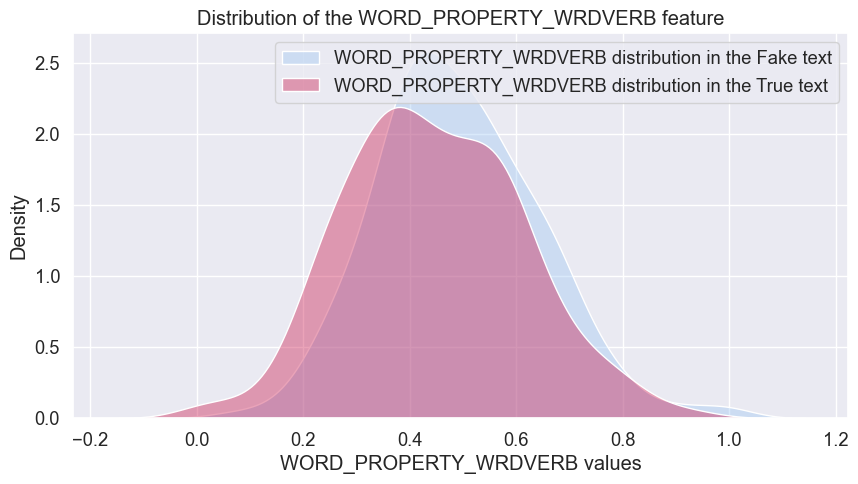

Linguistic feature: WORD_PROPERTY_WRDADJ


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

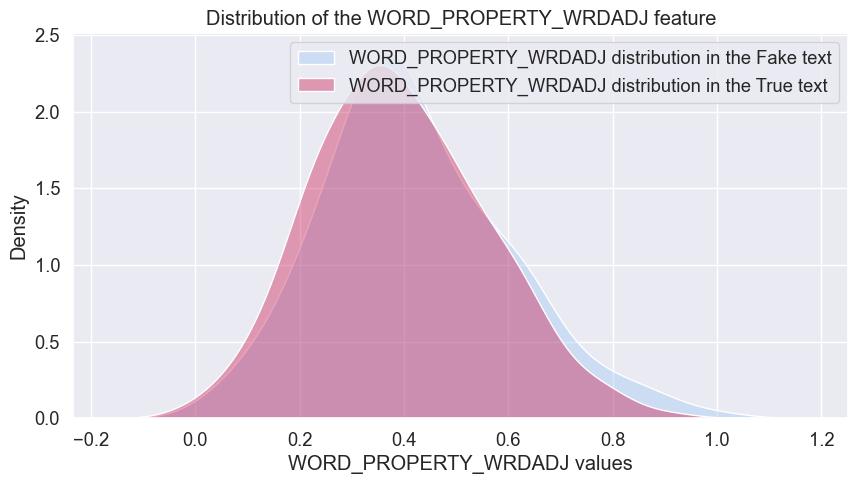

Linguistic feature: WORD_PROPERTY_WRDADV


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

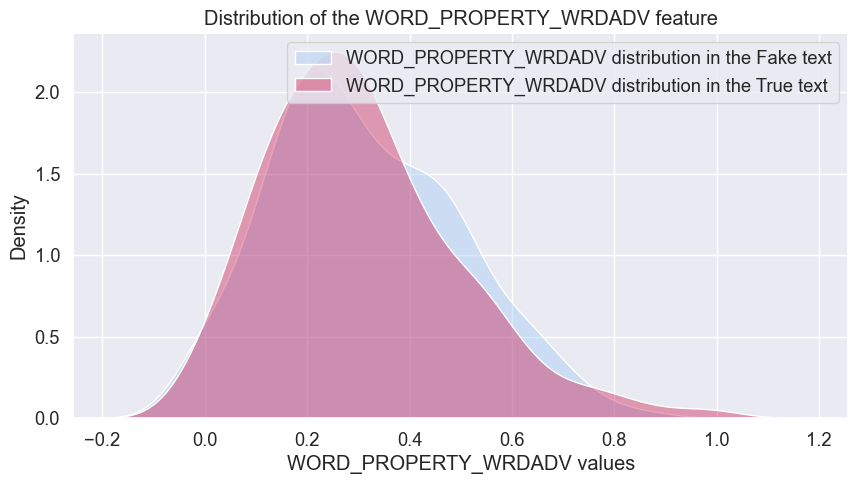

Linguistic feature: WORD_PROPERTY_WRDFRQc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

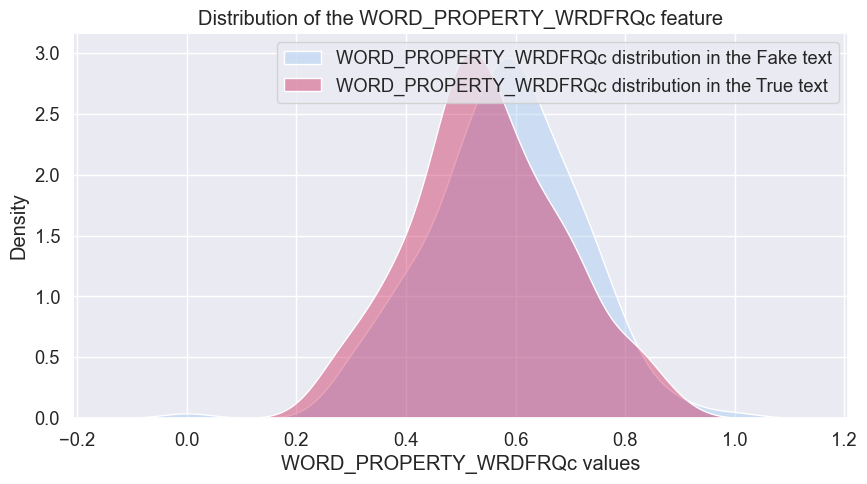

Linguistic feature: WORD_PROPERTY_WRDFRQa


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

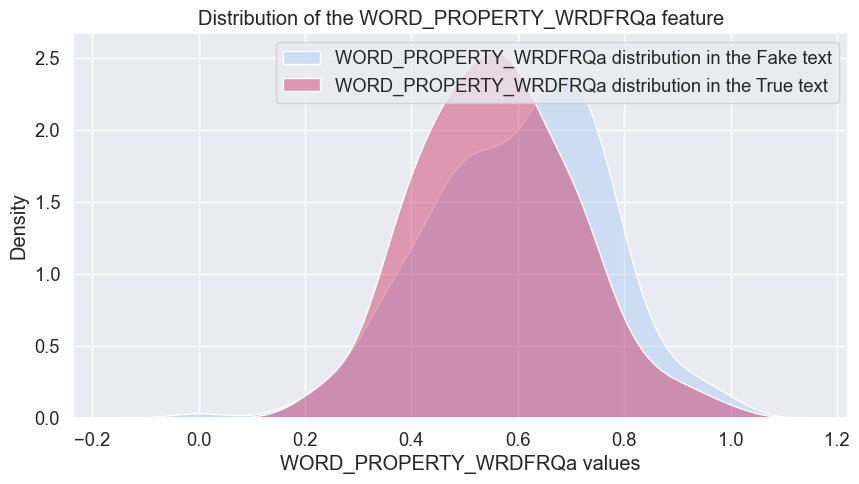

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: WORD_PROPERTY_WRDFRQmc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

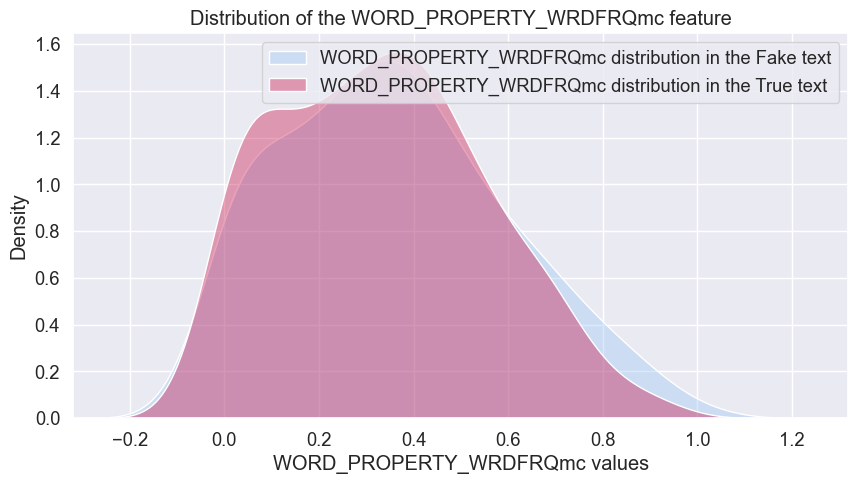

Linguistic feature: WORD_PROPERTY_WRDFAMc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

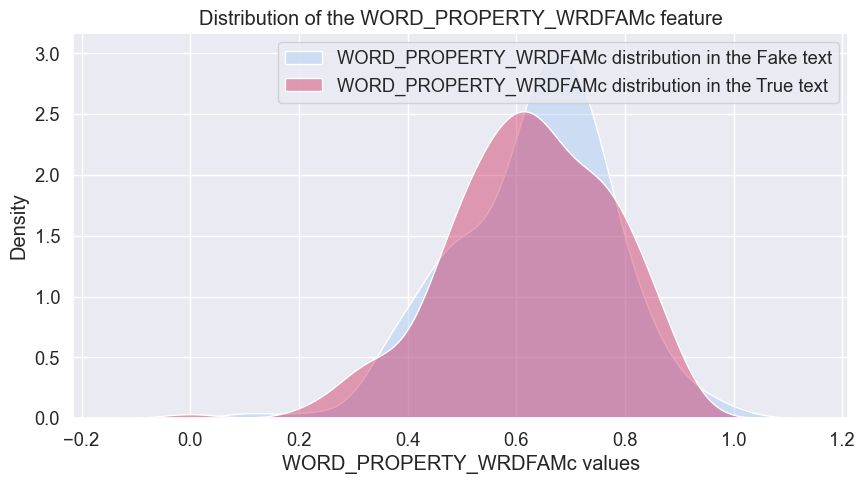

Linguistic feature: WORD_PROPERTY_WRDCNCc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

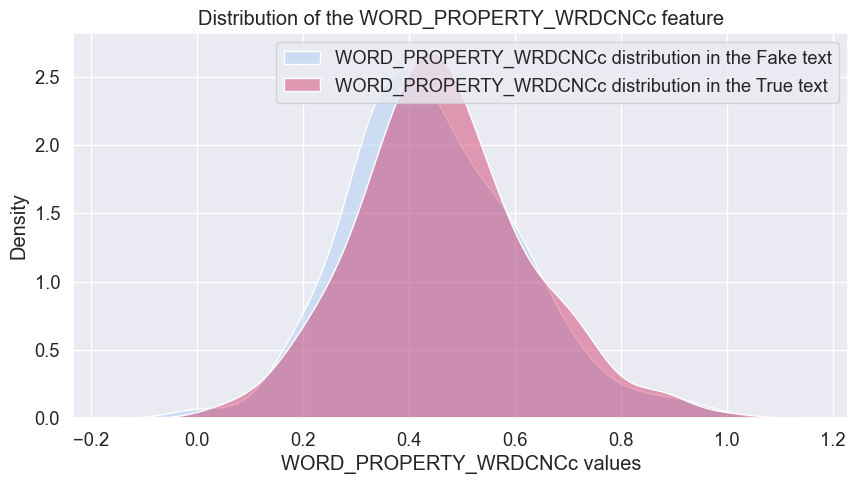

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: WORD_PROPERTY_WRDIMGc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

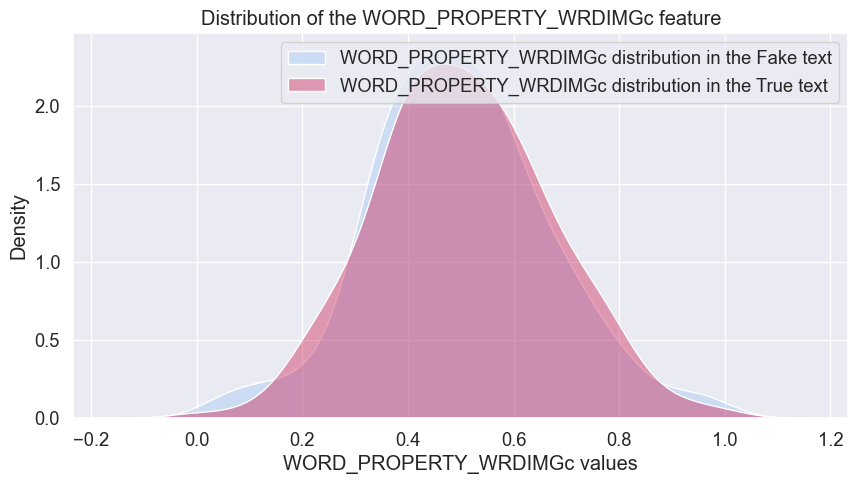

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: WORD_PROPERTY_WRDMEAc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

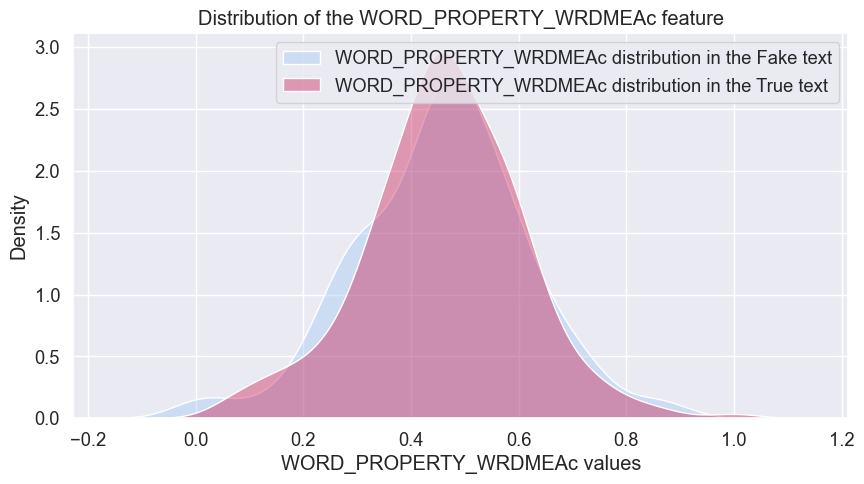

Linguistic feature: WORD_PROPERTY_WRDPOLc


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

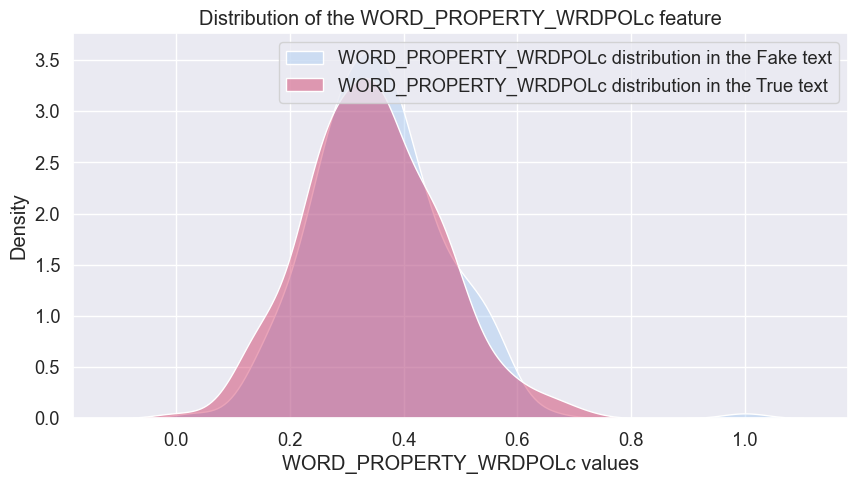

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: WORD_PROPERTY_WRDHYPn


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

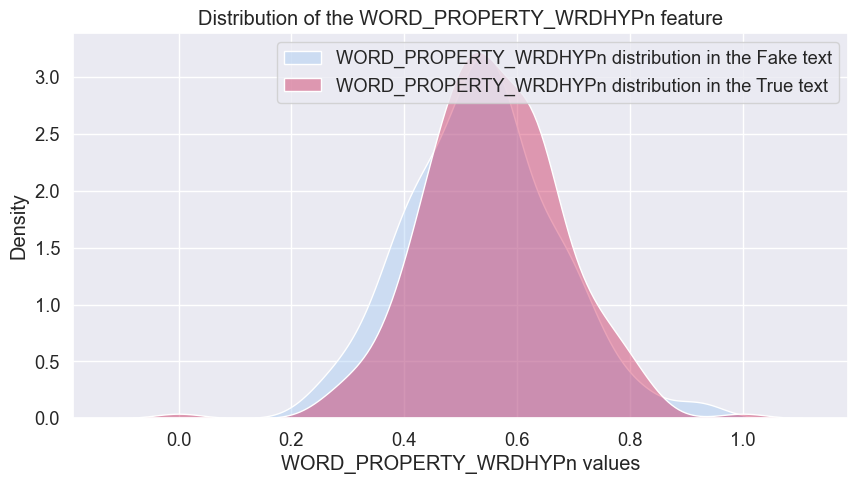

Linguistic feature: WORD_PROPERTY_WRDHYPv


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

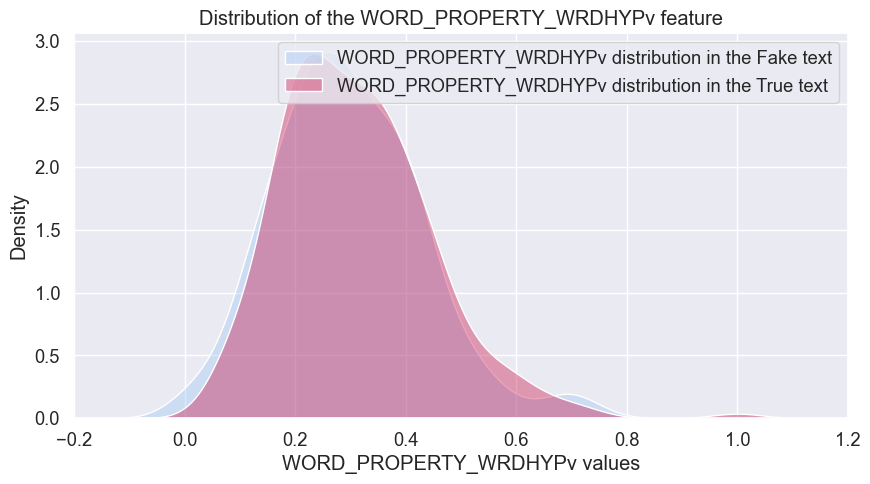

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: WORD_PROPERTY_WRDHYPnv


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

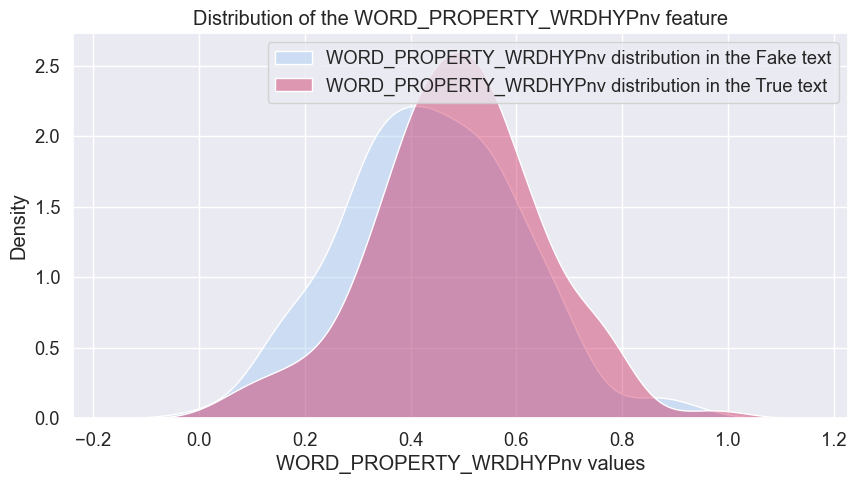

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Linguistic feature: WORD_PROPERTY_AOA


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

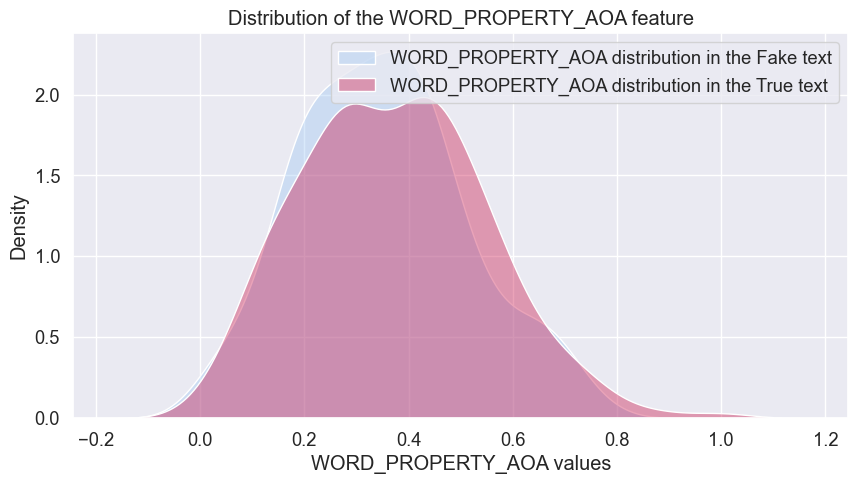

Linguistic feature: WORD_PROPERTY_AOA_MAX


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

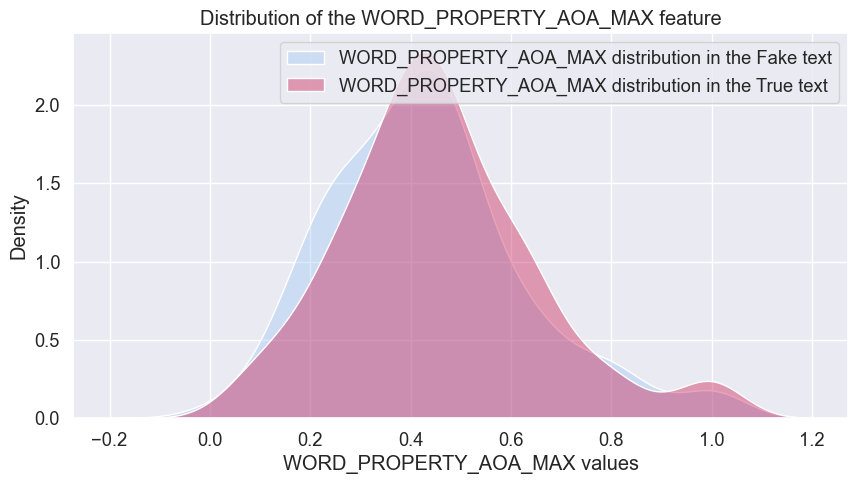

Linguistic feature: WORD_PROPERTY_CONCRETENESS


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

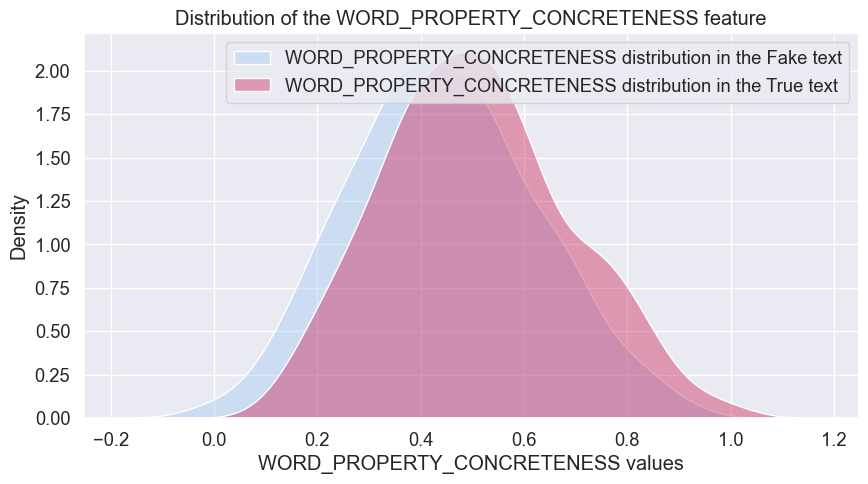

Linguistic feature: WORD_PROPERTY_PREVALENCE


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

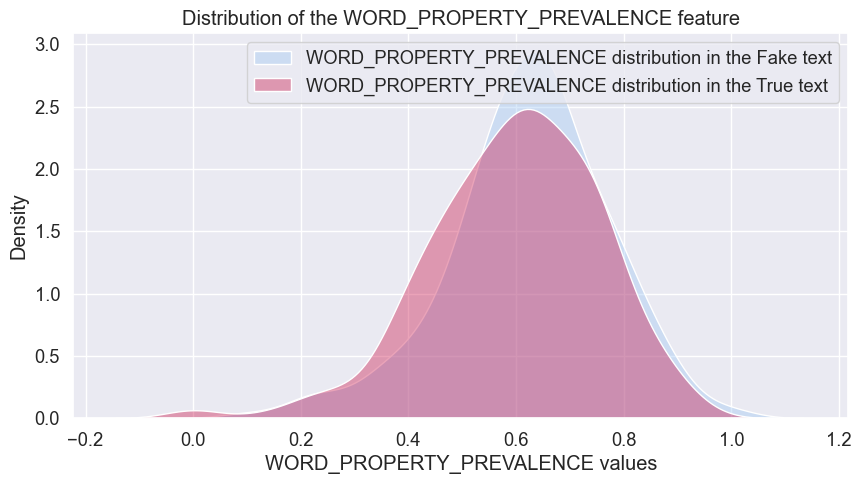

Linguistic feature: WORD_SET_INCIDENCE_C4_COMMON_WORDS


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

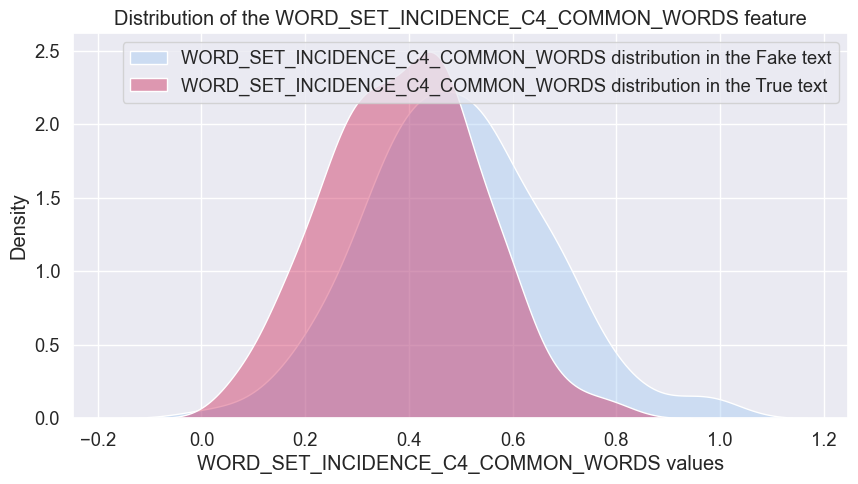

Linguistic feature: Polarity
Linguistic feature: Overall_Sentiment


C:\Users\alber\AppData\Local\Temp\ipykernel_5468\2192453797.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(target_fake[[col]],fill=True, alpha=0.4, palette="pastel", multiple="stack")
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.

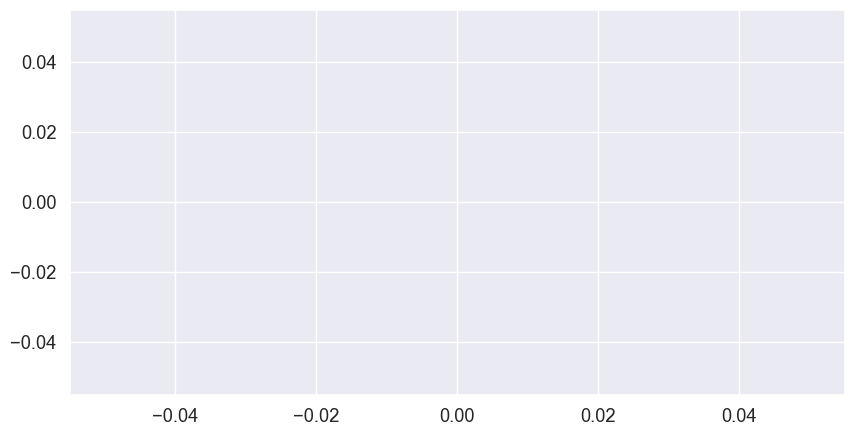

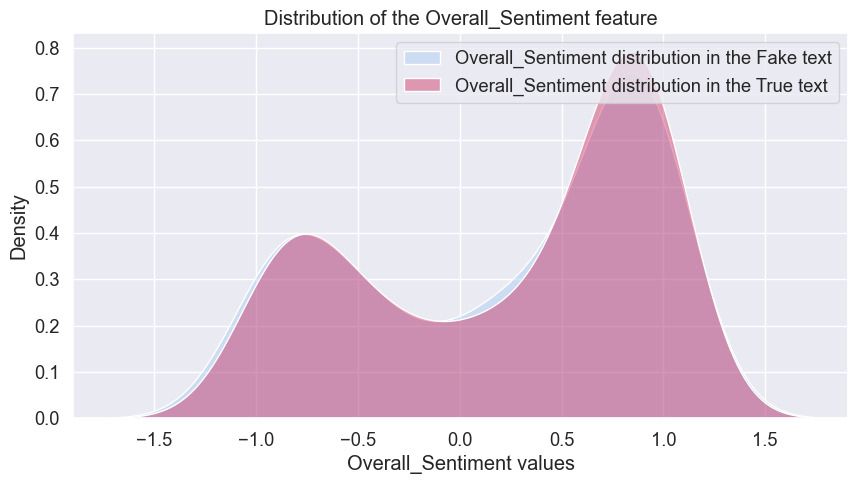

Linguistic feature: Positive_Sentiment


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

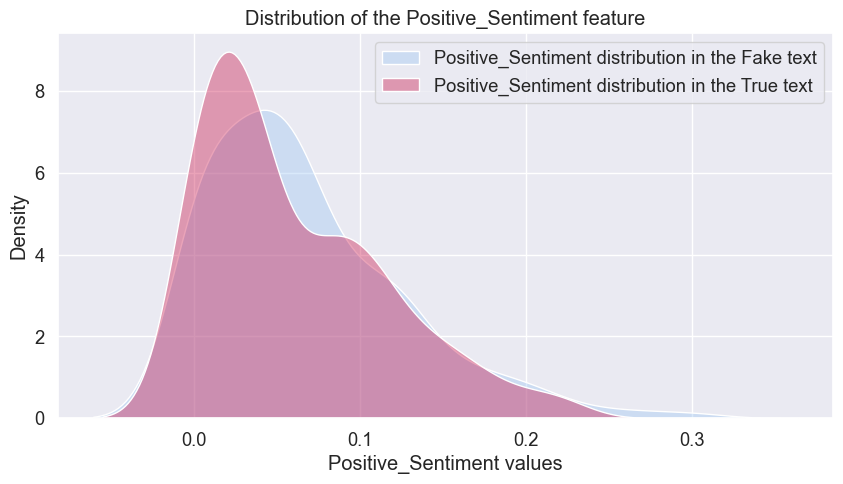

Linguistic feature: Negative_Sentiment


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

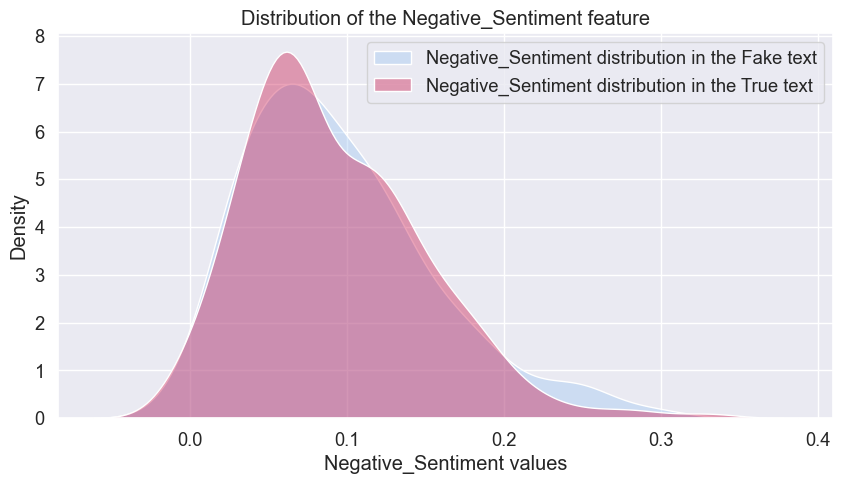

Linguistic feature: Neutral_Sentiment


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

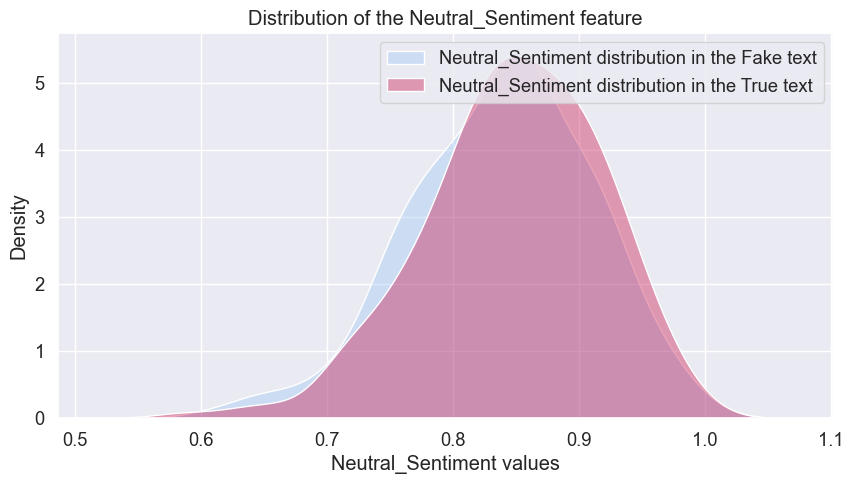

Linguistic feature: Subjectivity


c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

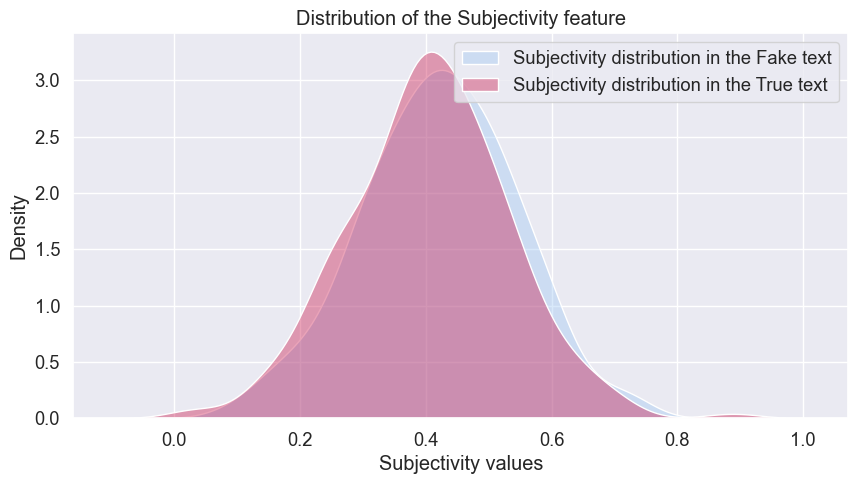

In [34]:
# plotting the distributions of the features


for col in df_scaled:
  try:
    print("Linguistic feature:", col)

    target_fake = df_scaled[df_scaled['Polarity'] == "Fake"]
    target_true = df_scaled[df_scaled['Polarity'] == "True"]



    fig, ax = plt.subplots(figsize=(10, 5))
    sns.set_theme(style='darkgrid', font_scale=1.2)
    sns.kdeplot(target_fake[[col]],fill=True, alpha=0.4, palette="pastel", multiple="stack")
    sns.kdeplot(target_true[[col]], fill=True, alpha=0.4, palette="rocket" , multiple="stack")           

    
    plt.title("Distribution of the {} feature".format(col))
    plt.legend(labels = ["{} distribution in the Fake text".format(col), "{} distribution in the True text".format(col)])
    plt.xlabel("{} values".format(col))

    plt.show()
  except:
    continue

<!-- Handling outliers -->

In the KDE plots, we can observe that some of the linguistic features extracted with the TCT are markedly different and the text sentiment features we obtained with Textblob and VADER don't seem to defer much based on the polarity of the text.

So far, we have assumed something which seems intuitive: that there exists intrinsic linguistic differences in fake and true news, which is reflected in the different distributions for the feature values. Looking at the feature visualizations, the intuition seems correct but it should be checked in a statistically relevant way.

# 3. Feature selection

In [35]:
import pandas as pd

In [36]:
# loading the dataset
df_scaled = pd.read_csv(r"Datasets\Celebrity Dataset\Celebrity_dataset_transformed.csv")
df_scaled

DESPC     DESSC     DESWC     DESPL    DESPLd    DESPLw     DESSL  \
0    0.444444  0.000000  0.146154  0.027027  0.000000  0.151143  0.682139   
1    0.222222  0.176471  0.253846  0.148649  0.176471  0.201948  0.249849   
2    0.222222  0.235294  0.276923  0.189189  0.235294  0.220999  0.191726   
3    0.222222  0.176471  0.307692  0.148649  0.176471  0.240051  0.300706   
4    0.222222  0.294118  0.296154  0.229730  0.294118  0.220999  0.147614   
..        ...       ...       ...       ...       ...       ...       ...   
445  0.222222  0.176471  0.296154  0.148649  0.176471  0.227350  0.289808   
446  0.888889  0.117647  0.273077  0.010811  0.037203  0.053345  0.386983   
447  0.444444  0.000000  0.130769  0.000000  0.048029  0.075642  0.645812   
448  0.222222  0.470588  0.534615  0.351351  0.352941  0.337426  0.153582   
449  0.222222  0.176471  0.138462  0.148649  0.058824  0.138442  0.140868   

       DESSLd   DESWLsy  DESWLsyd  ...  WORD_PROPERTY_AOA_MAX  \
0    0.000000  1.000000  0.563762  ...               0.396186   
1    0.248429  0.109532  0.116088  ...               0.309322   
2    0.215594  0.199330  0.134906  ...               0.297608   
3    0.189370  0.191279  0.119235  ...               0.147246   
4    0.110956  0.139367  0.084885  ...               0.617585   
..        ...       ...       ...  ...                    ...   
445  0.164698  0.264674  0.203276  ...               0.306847   
446  0.384460  0.050249  0.047174  ...               0.323093   
447  0.000000  0.370429  0.251662  ...               0.606992   
448  0.189306  0.225581  0.206593  ...               0.423729   
449  0.240751  0.445890  0.305984  ...               0.447034   

     WORD_PROPERTY_CONCRETENESS  WORD_PROPERTY_PREVALENCE  \
0                      0.393986                  0.674648   
1                      0.612986                  0.682585   
2                      0.685996                  0.654967   
3                      0.814876                  0.426085   
4                      0.218604                  0.515320   
..                          ...                       ...   
445                    0.621988                  0.530017   
446                    0.499129                  0.691053   
447                    0.835890                  0.640981   
448                    0.532790                  0.651265   
449                    0.534365                  0.574802   

     WORD_SET_INCIDENCE_C4_COMMON_WORDS  Polarity  Overall_Sentiment  \
0                              0.685198      Fake             0.7783   
1                              0.252618      Fake             0.7763   
2                              0.546360      Fake            -0.2944   
3                              0.367094      Fake             0.6486   
4                              0.550734      Fake             0.9531   
..                                  ...       ...                ...   
445                            0.516772      True             0.6705   
446                            0.339440      True             0.9590   
447                            0.230619      True             0.7964   
448                            0.156495      True             0.9532   
449                            0.268774      True             0.8225   

     Positive_Sentiment  Negative_Sentiment  Neutral_Sentiment  Subjectivity  
0                 0.033               0.109              0.858      0.332143  
1                 0.045               0.106              0.849      0.513112  
2                 0.150               0.123              0.726      0.397129  
3                 0.000               0.032              0.968      0.497222  
4                 0.000               0.145              0.855      0.454167  
..                  ...                 ...                ...           ...  
445               0.017               0.069              0.914      0.428052  
446               0.024               0.180              0.796      0.39

Before making some base models to check if there's a certain algorithm that performs best for our task, I will go into a couple of techniques to try to reduce the number of features used.

In [37]:
all_features = list(df_scaled.columns)
all_features

['DESPC',
 'DESSC',
 'DESWC',
 'DESPL',
 'DESPLd',
 'DESPLw',
 'DESSL',
 'DESSLd',
 'DESWLsy',
 'DESWLsyd',
 'DESWLlt',
 'DESWLltd',
 'LDTTRc',
 'LDTTRa',
 'LDMTLD',
 'LDHDD',
 'SYNLE',
 'SYNNP',
 'SYNMEDpos',
 'SYNMEDwrd',
 'SYNMEDlem',
 'SYNSTRUTa',
 'RDFRE',
 'READFKGL',
 'TOKEN_ATTRIBUTE_RATIO_ALHPA',
 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
 'TOKEN_ATTRIBUTE_RATIO_PUNCT',
 'TOKEN_ATTRIBUTE_RATIO_URL',
 'WORD_SET_INCIDENCE_WRDPRP1s',
 'WORD_SET_INCIDENCE_WRDPRP1p',
 'WORD_SET_INCIDENCE_WRDPRP2',
 'WORD_SET_INCIDENCE_WRDPRP3s',
 'WORD_SET_INCIDENCE_WRDPRP3p',
 'WORD_SET_INCIDENCE_CNCCaus',
 'WORD_SET_INCIDENCE_CNCLogic',
 'WORD_SET_INCIDENCE_CNCTemp',
 'WORD_SET_INCIDENCE_CNCAdd',
 'WORD_SET_INCIDENCE_CNCPos',
 'WORD_SET_INCIDENCE_CNCNeg',
 'WORD_PROPERTY_WRDNOUN',
 'WORD_PROPERTY_WRDVERB',
 'WORD_PROPERTY_WRDADJ',
 'WORD_PROPERTY_WRDADV',
 'WORD_PROPERTY_WRDFRQc',
 'WORD_PROPERTY_WRDFRQa',
 'WORD_PROPERTY_WRDFRQmc',
 'WORD_PROPERTY_WRDFAMc',
 'WORD_PROPERTY_WRDCNCc',
 'WORD_PROPERTY_WRDIMGc

## Correlation

First, we'll have a look at the correlation of the features with the Polarity outcome.
To check the correlation of our binary outcome (true or false) and our continuous values we can compute the point biserial correlation coefficient.


In [38]:
df_scaled["Polarity"] = df_scaled["Polarity"].replace(["True", "Fake"], [1, 0])

C:\Users\alber\AppData\Local\Temp\ipykernel_5468\378948612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_scaled["Polarity"] = df_scaled["Polarity"].replace(["True", "Fake"], [1, 0])


In [39]:
from scipy.stats import pointbiserialr

correlation = []

corr_threshold = 0.2

for feature in all_features:
    if feature == "Polarity":
        continue
    
    pointbi = pointbiserialr(x=df_scaled['Polarity'], y=df_scaled[feature])
    
    pointbi_stat = pointbi.statistic.round(2)
    
    # print(feature)
    
    if pointbi_stat <= -(corr_threshold) or pointbi_stat >= corr_threshold:
        print(feature, pointbi_stat, "Correlation found")
        correlation.append(feature)
        
    else:
        print(feature, pointbi_stat, "No strong correlation found")
        
print(len(correlation))
print(correlation)
    

DESPC 0.31 Correlation found
DESSC -0.04 No strong correlation found
DESWC 0.12 No strong correlation found
DESPL -0.2 Correlation found
DESPLd -0.15 No strong correlation found
DESPLw -0.2 Correlation found
DESSL 0.25 Correlation found
DESSLd 0.2 Correlation found
DESWLsy 0.03 No strong correlation found
DESWLsyd 0.06 No strong correlation found
DESWLlt -0.02 No strong correlation found
DESWLltd 0.14 No strong correlation found
LDTTRc 0.02 No strong correlation found
LDTTRa -0.02 No strong correlation found
LDMTLD 0.08 No strong correlation found
LDHDD 0.11 No strong correlation found
SYNLE 0.13 No strong correlation found
SYNNP 0.18 No strong correlation found
SYNMEDpos 0.12 No strong correlation found
SYNMEDwrd 0.13 No strong correlation found
SYNMEDlem 0.18 No strong correlation found
SYNSTRUTa -0.03 No strong correlation found
RDFRE -0.16 No strong correlation found
READFKGL 0.22 Correlation found
TOKEN_ATTRIBUTE_RATIO_ALHPA -0.32 Correlation found
TOKEN_ATTRIBUTE_RATIO_DIGIT 0.19

There is no strong correlation between any feature and polarity. Just for the sake of trying it out, I will make a feature set with the features with the most correlation (even if it is pretty weak). Also, so we'll move to a different way of filtering our features so that we can get more substantive results.

## Kolmogorov-Smirnov test

The Kolmogorov-Smirnov test is a statistical test that determines whether two samples come from the same distribution. Its null hypothesis is that both samples come from the same distribution and I will reject it for a pvalue lower than 0.05.

The rational behind using the test is that if two given feature samples (one for true news, one for fake news) are determined to come from different distributions, that could mean that the distribution for the feature is different according to the category of the text. More specifically, it could mean that the linguistic feature is realized differently in fake and true news.

In [40]:
# df_scaled = df_scaled.replace(["True", "Fake"], [1,0])

In [41]:
from scipy.stats import ks_2samp

same_distribution = []

diff_distribution = []

for col in df_scaled:

    target_fake = df_scaled[df_scaled['Polarity'] == 0]
    target_true = df_scaled[df_scaled['Polarity'] == 1]
    
    if col == "Polarity":
        continue
    
    elif ks_2samp(target_fake[col], target_true[col]).pvalue < 0.05:
        diff_distribution.append(col)
    
    else:
        same_distribution.append(col)

In [42]:
print("Number of features:", len(diff_distribution))
diff_distribution # linguistic features that are assumed to come from different distributions according to the truthness of the piece of news

Number of features: 28


['DESPC',
 'DESWC',
 'DESPL',
 'DESPLd',
 'DESPLw',
 'DESSL',
 'DESSLd',
 'DESWLltd',
 'SYNLE',
 'SYNNP',
 'SYNMEDpos',
 'SYNMEDwrd',
 'SYNMEDlem',
 'SYNSTRUTa',
 'RDFRE',
 'READFKGL',
 'TOKEN_ATTRIBUTE_RATIO_ALHPA',
 'TOKEN_ATTRIBUTE_RATIO_DIGIT',
 'WORD_SET_INCIDENCE_WRDPRP3p',
 'WORD_SET_INCIDENCE_CNCCaus',
 'WORD_PROPERTY_WRDNOUN',
 'WORD_PROPERTY_WRDVERB',
 'WORD_PROPERTY_WRDFRQc',
 'WORD_PROPERTY_WRDFRQa',
 'WORD_PROPERTY_WRDHYPnv',
 'WORD_PROPERTY_CONCRETENESS',
 'WORD_SET_INCIDENCE_C4_COMMON_WORDS',
 'Positive_Sentiment']

## Using RFECV to select the optimal set of features

In [43]:
X =df_scaled.drop("Polarity", axis=1)
y = df_scaled["Polarity"]

In [44]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rfe = RFECV(RandomForestClassifier(random_state=42), cv=5, scoring="f1")
rfe.fit(X , y)


RFECV(cv=5, estimator=RandomForestClassifier(random_state=42), scoring='f1')

In [45]:
import matplotlib.pyplot as plt

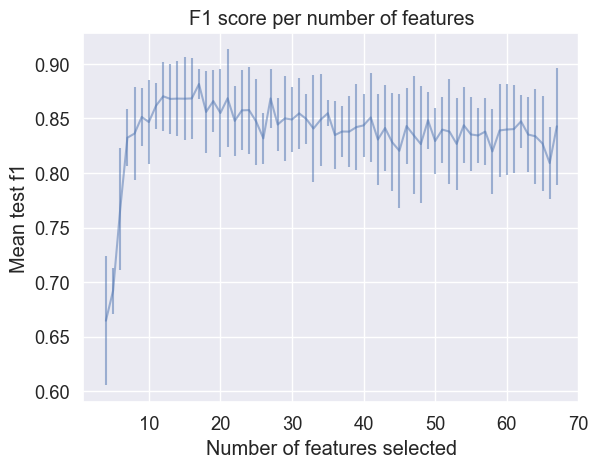

In [46]:
n_scores = len(rfe.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test f1")
plt.errorbar(range(4, n_scores + 4), rfe.cv_results_["mean_test_score"], yerr=rfe.cv_results_["std_test_score"], alpha=0.5)
plt.title("F1 score per number of features")
plt.show()

In [47]:
ranking = rfe.ranking_

In [48]:
# ranking of the features

importance_features = list(zip(all_features, ranking))
importance_features.sort(key = lambda tup: tup[1], reverse=False)
importance_features

[('DESPC', 1),
 ('DESWC', 1),
 ('DESPL', 1),
 ('DESPLd', 1),
 ('DESPLw', 1),
 ('DESSL', 1),
 ('DESSLd', 1),
 ('DESWLlt', 1),
 ('SYNNP', 1),
 ('SYNMEDlem', 1),
 ('READFKGL', 1),
 ('TOKEN_ATTRIBUTE_RATIO_ALHPA', 1),
 ('TOKEN_ATTRIBUTE_RATIO_PUNCT', 1),
 ('WORD_SET_INCIDENCE_C4_COMMON_WORDS', 1),
 ('SYNMEDwrd', 2),
 ('LDTTRa', 3),
 ('SYNMEDpos', 4),
 ('WORD_PROPERTY_WRDFRQa', 5),
 ('WORD_PROPERTY_WRDVERB', 6),
 ('SYNSTRUTa', 7),
 ('TOKEN_ATTRIBUTE_RATIO_DIGIT', 8),
 ('DESWLltd', 9),
 ('WORD_PROPERTY_WRDHYPnv', 10),
 ('WORD_PROPERTY_CONCRETENESS', 11),
 ('WORD_PROPERTY_WRDADJ', 12),
 ('DESWLsy', 13),
 ('WORD_PROPERTY_WRDFRQc', 14),
 ('SYNLE', 15),
 ('LDMTLD', 16),
 ('WORD_SET_INCIDENCE_CNCPos', 17),
 ('WORD_PROPERTY_PREVALENCE', 18),
 ('DESWLsyd', 19),
 ('WORD_PROPERTY_WRDCNCc', 20),
 ('RDFRE', 21),
 ('WORD_PROPERTY_WRDNOUN', 22),
 ('WORD_SET_INCIDENCE_WRDPRP3p', 23),
 ('LDHDD', 24),
 ('WORD_PROPERTY_WRDPOLc', 25),
 ('WORD_PROPERTY_AOA', 26),
 ('WORD_PROPERTY_WRDHYPn', 27),
 ('WORD_SET_INC

In [49]:
import numpy as np

In [50]:
selected_features = list(np.array(list(X.columns))[rfe.get_support()])
selected_features

['DESPC',
 'DESWC',
 'DESPL',
 'DESPLd',
 'DESPLw',
 'DESSL',
 'DESSLd',
 'DESWLlt',
 'SYNNP',
 'SYNMEDlem',
 'READFKGL',
 'TOKEN_ATTRIBUTE_RATIO_ALHPA',
 'TOKEN_ATTRIBUTE_RATIO_PUNCT',
 'WORD_SET_INCIDENCE_C4_COMMON_WORDS']

In [51]:
print(len(selected_features))
print(selected_features)

14
['DESPC', 'DESWC', 'DESPL', 'DESPLd', 'DESPLw', 'DESSL', 'DESSLd', 'DESWLlt', 'SYNNP', 'SYNMEDlem', 'READFKGL', 'TOKEN_ATTRIBUTE_RATIO_ALHPA', 'TOKEN_ATTRIBUTE_RATIO_PUNCT', 'WORD_SET_INCIDENCE_C4_COMMON_WORDS']


Exporting a dictionary with the list of features

In [52]:
features = {"corr": correlation,
            "rfecv": selected_features,
            "kolmogorov": diff_distribution,
            "all_features": all_features}

In [53]:
import json
with open(r"Feature_sets\features.json", "w") as f:
    json.dump(features, f)

# 4. Baseline classification models

To select a model to then finetune, first I am going to compare the baseline sklearn models trained on the dataset with different feature sets. 

<!-- Prefiltering -->

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support


import pickle

from json import JSONEncoder
import json
import numpy

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

## Functions

To speed up the process a little bit I will create some functions to fit different models according to different features and output a dictionary of results we can analyze.

In [55]:

# first I will define a couple of functions to speed up the process and make it reusable

def data_preprocess(data):
  
  '''We input the data with the linguistic features
  and it returns the data with the polarity columns in 0 for fake and 1 for true
  as well as the outcomes
  '''

  if data["Polarity"][0] != 0 or 1:
    data["Polarity"] = data["Polarity"].replace({"True":1, "Fake":0, "TRUE":1})
    
  outcomes = ["Fake","Real"]
  
  return data, outcomes

def test_train(data, features):

  '''We input the training data and a list of the features we want to train the models with.
  it returns the data split in test/train
  '''

  feature_cols = features
  # data = data[feature_cols + ["Polarity"]].dropna()

  X = data[feature_cols]
  y = data["Polarity"] #outcomes 0 or 1


  print("Info: {} features were passed at the fit step\n:".format(X.shape[1]))
  for feature in feature_cols:
    print(feature)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=16) #stratify so that the proportion of the train data is the same for fake and true

  return X, y, X_train, X_test, y_train, y_test, features

def class_report(y_test, y_pred):

  outcomes = ["Fake","Real"]

  scores = classification_report(y_test, y_pred, target_names=outcomes)

  print(scores)

  return scores

def compare_models_cross_val(model, X, y):
  
  '''for each model, it calculates the cross validation accuracy for k-n
  as well as the mean cross validation score on the given data

  '''

  print("CROSS VALIDATION\n")

  model_name = str(model)[:-2]

  if model_name == "SVC(kernel=\'linear":

    model_name = "SVC"


  # for model in models:
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  cv_score = cross_val_score(model, X, y, cv = kfold, scoring="f1") # we have to change the metric to the one we want to measure the models by
  print("Cross validation f1 {} for each of the 5 iterations:".format(model_name))
  for score in cv_score:
    print(round(score*100, 2), "%")

  mean_f1 = np.mean(cv_score)

  print("\nCross validation mean f1 for {}:".format(model_name), round(mean_f1*100, 2),"%")
  print("\n-------------------------------------------------------------------------\n")

  return cv_score, mean_f1

# def conf_matrix(model_name, features, y_pred, y_test, cmap="magma"):

#   '''This function takes the predicted and test labels, generates the confusion matrix
#   and displays it
#   '''

#   n_features = len(features)

#   confussion_matrix = confusion_matrix(y_pred, y_test)

#   outcomes = ["Fake","Real"]
#   ticks = np.arange(len(outcomes))

#   fig, ax = plt.subplots()
#   plt.xticks(ticks, outcomes)
#   plt.yticks(ticks, outcomes)
#   sns.heatmap(pd.DataFrame(confussion_matrix), annot=True, cmap=cmap, fmt="g", xticklabels=outcomes, yticklabels=outcomes)
#   ax.xaxis.set_label_position("top")
#   plt.tight_layout()
#   if n_features == 1:

#     plt.title("{} Confusion Matrix: {}".format(model_name, features[0]), y = 1.1)

#   elif n_features == 2:

#     plt.title("{} Confusion Matrix: {} and {}".format(model_name, features[0],features[1]), y = 1.1)

#   elif n_features == 3:

#     plt.title("{} Confusion Matrix: {}, {} and {}".format(model_name, features[0],features[1], features[2]), y = 1.1)

#   plt.ylabel("Actual label")
#   plt.xlabel("Predicted label")

#   return confussion_matrix

def compare_models_train_test_split(models, X, y, X_train, y_train, X_test, y_test, features):

  '''this fx trains the data on the four types of models,
  generates a report with the overall accuracy of the model, the cross validation evaluation
  and prints the confussion matrix of each model on the particular test_train split.

  It returns a dictionary with the name of the model, the features that were passed during the fit,
  the model used, the accuracy score, the classification report, the cross-validation evaluation and the confusion matrix
  '''

  model_list_dicts =[]

  for model in models:
    
    model_name = str(model)[:-2]

    if model_name == "SVC(kernel=\'linear":

      model_name = "SVC"
    
    model_dict = {}
    
    if len(features) == 14:
      ft_str = "rdfc"
      
    elif len(features) == 8:
      ft_str = "corr"
    
    elif len(features) == 28:
      ft_str = "kolmogorov_features"
      
    else: 
      ft_str = "all_features"
    
    model_dict["name"] = ft_str + "__" + model_name
    
    model_dict["features_set"] = ft_str
    
    model_dict["n_features"] = len(features)

    model_dict["model"] = model_name
    
    print("\n",model_name, "\n", "\n")
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    model_dict["accuracy"] = accuracy
    
    model_dict["f1"] = f1_score(y_test, y_pred)
    
    model_dict["precision"] = precision_score(y_test, y_pred)
    
    model_dict["recall"] = recall_score(y_test, y_pred)
     
     
    print("OVERALL F1", model_name, ":", round(accuracy*100, 2),"%""\n")
    
    scores = class_report(y_test, y_pred)
    
    P_R_F1_true = precision_recall_fscore_support(y_test, y_pred, labels=[1])
    precision_true, recall_true , f1_score_true  = P_R_F1_true[0], P_R_F1_true[1] ,  P_R_F1_true[2]
    
    P_R_F1_false = precision_recall_fscore_support(y_test, y_pred, labels=[0])
    precision_false, recall_false, f1_score_false = P_R_F1_false[0], P_R_F1_false[1], P_R_F1_false[2]
    
    model_dict["precision_true"], model_dict["recall_true"], model_dict["f1_score_true"] = precision_true, recall_true, f1_score_true
    model_dict["precision_false"], model_dict["recall_false"], model_dict["f1_score_false"] = precision_false, recall_false, f1_score_false
    
    cv_score, mean_f1 = compare_models_cross_val(model, X, y)
    
    model_dict["cv_scores"] = cv_score

    model_dict["mean_f1"] = mean_f1
    
    # confussion_matrix = conf_matrix(model_name, features, y_pred, y_test, cmap="magma")
    
    # model_dict["confussion_matrix"] = confussion_matrix
    
    model_dict["development"] = "baseline"

    model_list_dicts.append(model_dict)
    
    pickle.dump(model, open(r"Baseline_Models\{}.sav".format(ft_str + "__" + model_name), 'wb'))
    
      
    with open(r"Baseline_Models_Performance\{}.json".format(model_dict["name"]), "w") as f:
      json.dump(model_dict, f,  cls=NumpyArrayEncoder)
  
  
  return model_list_dicts

def magic(data, features):

  '''this function takes all the previous functions and integrates them into a single function to run the data processing, training and testing in all the models.

  It returns a dictionary with the name of the model, the features that were passed during the fit,
  the model used, the accuracy score, the classification report, the crossvalidation evaluation and the confusion matrix

  '''

  data, outcomes = data_preprocess(data) # data in the correct format for the y outcomes

  X, y, X_train, X_test, y_train, y_test, features = test_train(data, features) # data split for all the models with the desired features

  model_list_dicts = compare_models_train_test_split(models, X, y, X_train, y_train, X_test, y_test, features) # for each model it will compute

  return model_list_dicts


## Creating the models

<!-- array([['DESPC', '0.21438229320956675'],
       ['DESPLw', '0.10208405348019169'],
       ['WORD_SET_INCIDENCE_C4_COMMON_WORDS', '0.09965943628298403'],
       ['DESWC', '0.07109169917686431'],
       ['DESSL', '0.05266669162099124'],
       ['TOKEN_ATTRIBUTE_RATIO_ALHPA', '0.044887257624143466'],
       ['DESPL', '0.04316248532779844'],
       ['DESSLd', '0.02820966410727794'],
       ['SYNNP', '0.027405633313671348'],
       ['WORD_PROPERTY_WRDVERB', '0.0261010048275167'],
       ['WORD_SET_INCIDENCE_WRDPRP3p', '0.025068322443046843'],
       ['WORD_PROPERTY_WRDFRQa', '0.02254653008839199'],
       ['SYNLE', '0.02108048270836009'],
       ['WORD_PROPERTY_WRDHYPnv', '0.019784971882906673'],
       ['READFKGL', '0.018508796386778235'],
       ['WORD_PROPERTY_CONCRETENESS', '0.017746184163603552'],
       ['SYNMEDlem', '0.017576571201848724'],
       ['WORD_SET_INCIDENCE_CNCCaus', '0.016597094842558495'],
       ['TOKEN_ATTRIBUTE_RATIO_DIGIT', '0.016312327694308282'],
       ['SYNMEDwrd', '0.01586403979613771'],
       ['WORD_PROPERTY_WRDFRQc', '0.01478517755295334'],
       ['DESPLd', '0.013884163425386713'],
       ['DESWLltd', '0.01311359523902935'],
       ['Positive_Sentiment', '0.01210902813506827'],
       ['RDFRE', '0.011349995152157417'],
       ['SYNSTRUTa', '0.011137636817407863'],
       ['WORD_PROPERTY_WRDNOUN', '0.007141541942563552']], dtype='<U34') -->

### Loading the training dataset and the feature sets

In [56]:
# reloading the transformed data we saved early on

transformed_data = pd.read_csv(r"Datasets\Celebrity Dataset\Celebrity_dataset_transformed.csv")
# transformed_data = transformed_data.drop(labels="Unnamed: 0", axis=1)
print(transformed_data.shape)
transformed_data

(450, 65)


DESPC     DESSC     DESWC     DESPL    DESPLd    DESPLw     DESSL  \
0    0.444444  0.000000  0.146154  0.027027  0.000000  0.151143  0.682139   
1    0.222222  0.176471  0.253846  0.148649  0.176471  0.201948  0.249849   
2    0.222222  0.235294  0.276923  0.189189  0.235294  0.220999  0.191726   
3    0.222222  0.176471  0.307692  0.148649  0.176471  0.240051  0.300706   
4    0.222222  0.294118  0.296154  0.229730  0.294118  0.220999  0.147614   
..        ...       ...       ...       ...       ...       ...       ...   
445  0.222222  0.176471  0.296154  0.148649  0.176471  0.227350  0.289808   
446  0.888889  0.117647  0.273077  0.010811  0.037203  0.053345  0.386983   
447  0.444444  0.000000  0.130769  0.000000  0.048029  0.075642  0.645812   
448  0.222222  0.470588  0.534615  0.351351  0.352941  0.337426  0.153582   
449  0.222222  0.176471  0.138462  0.148649  0.058824  0.138442  0.140868   

       DESSLd   DESWLsy  DESWLsyd  ...  WORD_PROPERTY_AOA_MAX  \
0    0.000000  1.000000  0.563762  ...               0.396186   
1    0.248429  0.109532  0.116088  ...               0.309322   
2    0.215594  0.199330  0.134906  ...               0.297608   
3    0.189370  0.191279  0.119235  ...               0.147246   
4    0.110956  0.139367  0.084885  ...               0.617585   
..        ...       ...       ...  ...                    ...   
445  0.164698  0.264674  0.203276  ...               0.306847   
446  0.384460  0.050249  0.047174  ...               0.323093   
447  0.000000  0.370429  0.251662  ...               0.606992   
448  0.189306  0.225581  0.206593  ...               0.423729   
449  0.240751  0.445890  0.305984  ...               0.447034   

     WORD_PROPERTY_CONCRETENESS  WORD_PROPERTY_PREVALENCE  \
0                      0.393986                  0.674648   
1                      0.612986                  0.682585   
2                      0.685996                  0.654967   
3                      0.814876                  0.426085   
4                      0.218604                  0.515320   
..                          ...                       ...   
445                    0.621988                  0.530017   
446                    0.499129                  0.691053   
447                    0.835890                  0.640981   
448                    0.532790                  0.651265   
449                    0.534365                  0.574802   

     WORD_SET_INCIDENCE_C4_COMMON_WORDS  Polarity  Overall_Sentiment  \
0                              0.685198      Fake             0.7783   
1                              0.252618      Fake             0.7763   
2                              0.546360      Fake            -0.2944   
3                              0.367094      Fake             0.6486   
4                              0.550734      Fake             0.9531   
..                                  ...       ...                ...   
445                            0.516772      True             0.6705   
446                            0.339440      True             0.9590   
447                            0.230619      True             0.7964   
448                            0.156495      True             0.9532   
449                            0.268774      True             0.8225   

     Positive_Sentiment  Negative_Sentiment  Neutral_Sentiment  Subjectivity  
0                 0.033               0.109              0.858      0.332143  
1                 0.045               0.106              0.849      0.513112  
2                 0.150               0.123              0.726      0.397129  
3                 0.000               0.032              0.968      0.497222  
4                 0.000               0.145              0.855      0.454167  
..                  ...                 ...                ...           ...  
445               0.017               0.069              0.914      0.428052  
446               0.024               0.180              0.796      0.39

In [57]:
import json

with open(r"Feature_Sets\features.json", "r") as f:
    feature_sets = json.load(f)


In [58]:
feature_sets

{'corr': ['DESPC',
  'DESPL',
  'DESPLw',
  'DESSL',
  'DESSLd',
  'READFKGL',
  'TOKEN_ATTRIBUTE_RATIO_ALHPA',
  'WORD_SET_INCIDENCE_C4_COMMON_WORDS'],
 'rfecv': ['DESPC',
  'DESWC',
  'DESPL',
  'DESPLd',
  'DESPLw',
  'DESSL',
  'DESSLd',
  'DESWLlt',
  'SYNNP',
  'SYNMEDlem',
  'READFKGL',
  'TOKEN_ATTRIBUTE_RATIO_ALHPA',
  'TOKEN_ATTRIBUTE_RATIO_PUNCT',
  'WORD_SET_INCIDENCE_C4_COMMON_WORDS'],
 'kolmogorov': ['DESPC',
  'DESWC',
  'DESPL',
  'DESPLd',
  'DESPLw',
  'DESSL',
  'DESSLd',
  'DESWLltd',
  'SYNLE',
  'SYNNP',
  'SYNMEDpos',
  'SYNMEDwrd',
  'SYNMEDlem',
  'SYNSTRUTa',
  'RDFRE',
  'READFKGL',
  'TOKEN_ATTRIBUTE_RATIO_ALHPA',
  'TOKEN_ATTRIBUTE_RATIO_DIGIT',
  'WORD_SET_INCIDENCE_WRDPRP3p',
  'WORD_SET_INCIDENCE_CNCCaus',
  'WORD_PROPERTY_WRDNOUN',
  'WORD_PROPERTY_WRDVERB',
  'WORD_PROPERTY_WRDFRQc',
  'WORD_PROPERTY_WRDFRQa',
  'WORD_PROPERTY_WRDHYPnv',
  'WORD_PROPERTY_CONCRETENESS',
  'WORD_SET_INCIDENCE_C4_COMMON_WORDS',
  'Positive_Sentiment'],
 'all_features': ['

In [59]:
list_features = [value for key, value in feature_sets.items()]


In [60]:
lg = LogisticRegression(random_state=42)
svc = SVC(kernel ="linear", random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

In [61]:
models = [LogisticRegression(), SVC(kernel ="linear"), KNeighborsClassifier(), RandomForestClassifier(random_state=42)]

### Mini-report of the creation of the models

In [62]:
for feature in list_features:
    magic(transformed_data, feature)

Info: 8 features were passed at the fit step
:
DESPC
DESPL
DESPLw
DESSL
DESSLd
READFKGL
TOKEN_ATTRIBUTE_RATIO_ALHPA
WORD_SET_INCIDENCE_C4_COMMON_WORDS

 LogisticRegression 
 

OVERALL F1 LogisticRegression : 73.45 %

              precision    recall  f1-score   support

        Fake       0.71      0.74      0.72        53
        Real       0.76      0.73      0.75        60

    accuracy                           0.73       113
   macro avg       0.73      0.73      0.73       113
weighted avg       0.74      0.73      0.73       113

CROSS VALIDATION

Cross validation f1 LogisticRegression for each of the 5 iterations:
71.29 %
72.34 %
69.57 %
75.79 %
80.0 %

Cross validation mean f1 for LogisticRegression: 73.8 %

-------------------------------------------------------------------------


 SVC 
 

OVERALL F1 SVC : 75.22 %

              precision    recall  f1-score   support

        Fake       0.72      0.77      0.75        53
        Real       0.79      0.73      0.76        6

C:\Users\alber\AppData\Local\Temp\ipykernel_5468\455888499.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Polarity"] = data["Polarity"].replace({"True":1, "Fake":0, "TRUE":1})


OVERALL F1 RandomForestClassifier(random_state=4 : 78.76 %

              precision    recall  f1-score   support

        Fake       0.78      0.75      0.77        53
        Real       0.79      0.82      0.80        60

    accuracy                           0.79       113
   macro avg       0.79      0.79      0.79       113
weighted avg       0.79      0.79      0.79       113

CROSS VALIDATION

Cross validation f1 RandomForestClassifier(random_state=4 for each of the 5 iterations:
81.25 %
75.51 %
77.78 %
85.11 %
92.93 %

Cross validation mean f1 for RandomForestClassifier(random_state=4: 82.51 %

-------------------------------------------------------------------------

Info: 14 features were passed at the fit step
:
DESPC
DESWC
DESPL
DESPLd
DESPLw
DESSL
DESSLd
DESWLlt
SYNNP
SYNMEDlem
READFKGL
TOKEN_ATTRIBUTE_RATIO_ALHPA
TOKEN_ATTRIBUTE_RATIO_PUNCT
WORD_SET_INCIDENCE_C4_COMMON_WORDS

 LogisticRegression 
 

OVERALL F1 LogisticRegression : 82.3 %

              precision    recal

<!-- All features input -->

# 5 Evaluation of the base models 

<!-- array([['DESPC', '0.2025804272359243'],
       ['DESPLw', '0.08926566600936647'],
       ['DESWC', '0.052670568137752734'],
       ['DESPL', '0.040624723265320996'],
       ['TOKEN_ATTRIBUTE_RATIO_ALHPA', '0.027994944022307067'],
       ['SYNNP', '0.018355404028672903'],
       ['TOKEN_ATTRIBUTE_RATIO_DIGIT', '0.008966898480755676'],
       ['WORD_SET_INCIDENCE_CNCNeg', '0.008505536495793845'],
       ['RDFRE', '0.00265707113081782']], dtype='<U34') -->

In [63]:
import pandas as pd
import os
import json

In [64]:
train_results = r"Baseline_Models_Performance"
list_train = os.listdir(train_results)

In [65]:
list_train

['all_features__KNeighborsClassifier.json',
 'all_features__LogisticRegression.json',
 'all_features__RandomForestClassifier(random_state=4.json',
 'all_features__RandomForestClassifier.json',
 'all_features__SVC.json',
 'corr__KNeighborsClassifier.json',
 'corr__LogisticRegression.json',
 'corr__RandomForestClassifier(random_state=4.json',
 'corr__RandomForestClassifier.json',
 'corr__SVC.json',
 'kolmogorov_features__KNeighborsClassifier.json',
 'kolmogorov_features__LogisticRegression.json',
 'kolmogorov_features__RandomForestClassifier(random_state=4.json',
 'kolmogorov_features__RandomForestClassifier.json',
 'kolmogorov_features__SVC.json',
 'rdfc__KNeighborsClassifier.json',
 'rdfc__LogisticRegression.json',
 'rdfc__RandomForestClassifier(random_state=4.json',
 'rdfc__RandomForestClassifier.json',
 'rdfc__SVC.json']

In [66]:
list_dicts_train = []
for file_result in list_train:
    path = str(train_results)+ r"\{}".format(file_result)
    
    # print(path)
    
    with open(path) as f:
        data = json.load(f)
        list_dicts_train.append(data)

In [67]:
# there should be 16 dictionaries; 4 sets of features * 4 ml algos
print(len(list_dicts_train))

20


In [68]:
results_df = pd.DataFrame(list_dicts_train)

In [69]:
results_df

name         features_set  \
0                  all_features__KNeighborsClassifier         all_features   
1                    all_features__LogisticRegression         all_features   
2   all_features__RandomForestClassifier(random_st...         all_features   
3                all_features__RandomForestClassifier         all_features   
4                                   all_features__SVC         all_features   
5                          corr__KNeighborsClassifier                 corr   
6                            corr__LogisticRegression                 corr   
7         corr__RandomForestClassifier(random_state=4                 corr   
8                        corr__RandomForestClassifier                 corr   
9                                           corr__SVC                 corr   
10          kolmogorov_features__KNeighborsClassifier  kolmogorov_features   
11            kolmogorov_features__LogisticRegression  kolmogorov_features   
12  kolmogorov_features__RandomForestClassifier(ra...  kolmogorov_features   
13        kolmogorov_features__RandomForestClassifier  kolmogorov_features   
14                           kolmogorov_features__SVC  kolmogorov_features   
15                         rdfc__KNeighborsClassifier                 rdfc   
16                           rdfc__LogisticRegression                 rdfc   
17        rdfc__RandomForestClassifier(random_state=4                 rdfc   
18                       rdfc__RandomForestClassifier                 rdfc   
19                                          rdfc__SVC                 rdfc   

    n_features                                  model  accuracy        f1  \
0           65                   KNeighborsClassifier  1.000000  1.000000   
1           65                     LogisticRegression  1.000000  1.000000   
2           65  RandomForestClassifier(random_state=4  1.000000  1.000000   
3           65                 RandomForestClassifier  1.000000  1.000000   
4           65                                    SVC  1.000000  1.000000   
5            8                   KNeighborsClassifier  0.787611  0.812500   
6            8                     LogisticRegression  0.734513  0.745763   
7            8  RandomForestClassifier(random_state=4  0.787611  0.803279   
8            8                 RandomForestClassifier  0.787611  0.800000   
9            8                                    SVC  0.752212  0.758621   
10          28                   KNeighborsClassifier  0.699115  0.721311   
11          28                     LogisticRegression  0.769912  0.779661   
12          28  RandomForestClassifier(random_state=4  0.840708  0.844828   
13          28                 RandomForestClassifier  0.823009  0.824561   
14          28                                    SVC  0.743363  0.760331   
15          14                   KNeighborsClassifier  0.858407  0.862069   
16          14                     LogisticRegression  0.823009  0.833333   
17          14  RandomForestClassifier(random_state=4  0.876106  0.879310   
18          14                 RandomForestClassifier  0.893805  0.896552   
19          14                                    SVC  0.831858  0.842975   

    precision    recall        precision_true           recall_true  \
0    1.000000  1.000000                 [1.0]                 [1.0]   
1    1.000000  1.000000                 [1.0]                 [1.0]   
2    1.000000  1.000000                 [1.0]                 [1.0]   
3    1.000000  1.000000                 [1.0]                 [1.0]   
4    1.000000  1.000000                 [1.0]                 [1.0]   
5    0.764706  0.866667  [0.7647058823529411]  [0.8666666666666667]   
6    0.758621  0.733333  [0.7586206896551724]  [0.7333333333333333]   
7    0.790323  0.816667  [0.7903225806451613]  [0.8166666666666667]   
8    0.800000  0.800000                 [0.8]                 [0.8]   
9    0.785714  0.733333  [0.7857142857142857]  [0.7333333333333333]   
10   0.7096

In [70]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20 non-null     object 
 1   features_set     20 non-null     object 
 2   n_features       20 non-null     int64  
 3   model            20 non-null     object 
 4   accuracy         20 non-null     float64
 5   f1               20 non-null     float64
 6   precision        20 non-null     float64
 7   recall           20 non-null     float64
 8   precision_true   20 non-null     object 
 9   recall_true      20 non-null     object 
 10  f1_score_true    20 non-null     object 
 11  precision_false  20 non-null     object 
 12  recall_false     20 non-null     object 
 13  f1_score_false   20 non-null     object 
 14  cv_scores        20 non-null     object 
 15  mean_f1          20 non-null     float64
 16  development      20 non-null     object 
dtypes: float64(5), int

In [71]:
results_df.columns

Index(['name', 'features_set', 'n_features', 'model', 'accuracy', 'f1',
       'precision', 'recall', 'precision_true', 'recall_true', 'f1_score_true',
       'precision_false', 'recall_false', 'f1_score_false', 'cv_scores',
       'mean_f1', 'development'],
      dtype='object')

In [72]:
results_df = results_df[['features_set', 'model', 
                         'accuracy', 'f1', 'precision', 'recall',
                         'mean_f1'
                         ]]

In [73]:
results_df = results_df.rename(columns={"mean_f1":"mean_f1_cv"})

In [74]:
# cleaning the results tables, the json encoder we used to get the confusion matrix into the json dictionaries messed a bit with the data type of some of the columns

for col in results_df:
    try:
        results_df[col] = results_df[col].astype("float").round(2)
        print(col, "floated")
    except:
        continue # if it cannot be floated it will be a string or it is already a float

accuracy floated
f1 floated
precision floated
recall floated
mean_f1_cv floated


In [75]:
results_df

features_set                                  model  accuracy  \
0          all_features                   KNeighborsClassifier      1.00   
1          all_features                     LogisticRegression      1.00   
2          all_features  RandomForestClassifier(random_state=4      1.00   
3          all_features                 RandomForestClassifier      1.00   
4          all_features                                    SVC      1.00   
5                  corr                   KNeighborsClassifier      0.79   
6                  corr                     LogisticRegression      0.73   
7                  corr  RandomForestClassifier(random_state=4      0.79   
8                  corr                 RandomForestClassifier      0.79   
9                  corr                                    SVC      0.75   
10  kolmogorov_features                   KNeighborsClassifier      0.70   
11  kolmogorov_features                     LogisticRegression      0.77   
12  kolmogorov_features  RandomForestClassifier(random_state=4      0.84   
13  kolmogorov_features                 RandomForestClassifier      0.82   
14  kolmogorov_features                                    SVC      0.74   
15                 rdfc                   KNeighborsClassifier      0.86   
16                 rdfc                     LogisticRegression      0.82   
17                 rdfc  RandomForestClassifier(random_state=4      0.88   
18                 rdfc                 RandomForestClassifier      0.89   
19                 rdfc                                    SVC      0.83   

      f1  precision  recall  mean_f1_cv  
0   1.00       1.00    1.00        1.00  
1   1.00       1.00    1.00        1.00  
2   1.00       1.00    1.00        1.00  
3   1.00       1.00    1.00        1.00  
4   1.00       1.00    1.00        1.00  
5   0.81       0.76    0.87        0.80  
6   0.75       0.76    0.73        0.74  
7   0.80       0.79    0.82        0.83  
8   0.80       0.80    0.80        0.83  
9   0.76       0.79    0.73        0.74  
10  0.72       0.71    0.73        0.75  
11  0.78       0.79    0.77        0.79  
12  0.84       0.88    0.82        0.83  
13  0.82       0.87    0.78        0.82  
14  0.76       0.75    0.77        0.81  
15  0.86       0.89    0.83        0.85  
16  0.83       0.83    0.83        0.80  
17  0.88       0.91    0.85        0.86  
18  0.90       0.93    0.87        0.86  
19  0.84       0.84    0.85        0.84

AS we can preemptively see, the feature set of all features outperforms the rest but we have to be careful since the models may be overfitting. It is also worth noting that that feature set has more than 60 features and ina scenario where we are looking for lighter models or we have more data, reducing those dimensions would be beneficial.

In [76]:
results_df.columns

Index(['features_set', 'model', 'accuracy', 'f1', 'precision', 'recall',
       'mean_f1_cv'],
      dtype='object')

In [77]:
# which type of model produces the best results?

results_df.pivot_table(index="model", values=["f1", "mean_f1_cv"]).sort_values("f1", ascending=False)

f1  mean_f1_cv
model                                                    
RandomForestClassifier                 0.8800      0.8775
RandomForestClassifier(random_state=4  0.8800      0.8800
KNeighborsClassifier                   0.8475      0.8500
LogisticRegression                     0.8400      0.8325
SVC                                    0.8400      0.8475

In [78]:
# which set of features produces the best results? 

results_df.pivot_table(index="features_set", values=["f1", "mean_f1_cv"]).sort_values("f1", ascending=False)


f1  mean_f1_cv
features_set                          
all_features         1.000       1.000
rdfc                 0.862       0.842
corr                 0.784       0.788
kolmogorov_features  0.784       0.800

In [79]:
# accuracy per model and number of features used to train it

results_df.pivot_table(index="features_set",columns="model", values="mean_f1_cv")

model                KNeighborsClassifier  LogisticRegression  \
features_set                                                    
all_features                         1.00                1.00   
corr                                 0.80                0.74   
kolmogorov_features                  0.75                0.79   
rdfc                                 0.85                0.80   

model                RandomForestClassifier  \
features_set                                  
all_features                           1.00   
corr                                   0.83   
kolmogorov_features                    0.82   
rdfc                                   0.86   

model                RandomForestClassifier(random_state=4   SVC  
features_set                                                      
all_features                                          1.00  1.00  
corr                                                  0.83  0.74  
kolmogorov_features                                   0.83  0.81  
rdfc                                                  0.86  0.84

In [80]:
results_df.pivot_table(index="features_set",columns="model", values="f1")

model                KNeighborsClassifier  LogisticRegression  \
features_set                                                    
all_features                         1.00                1.00   
corr                                 0.81                0.75   
kolmogorov_features                  0.72                0.78   
rdfc                                 0.86                0.83   

model                RandomForestClassifier  \
features_set                                  
all_features                           1.00   
corr                                   0.80   
kolmogorov_features                    0.82   
rdfc                                   0.90   

model                RandomForestClassifier(random_state=4   SVC  
features_set                                                      
all_features                                          1.00  1.00  
corr                                                  0.80  0.76  
kolmogorov_features                                   0.84  0.76  
rdfc                                                  0.88  0.84

Looking at the results of the base models, we can see that the RandomForestClassifier outperforms the rest of the models.
As far as the best feature set, the feature set of all the available features performs best but it is notable that the feature set we got through recursive feature elimination performed really well too. For the fine-tuning process, we'll continue with RF and recursive feature elimination.



# 6. Gridsearch

Loading the data

In [81]:
import pandas as pd
import numpy as np

In [82]:
transformed_data = pd.read_csv(r"Datasets\Celebrity Dataset\Celebrity_dataset_transformed.csv")

print(transformed_data.shape)
transformed_data

(450, 65)


DESPC     DESSC     DESWC     DESPL    DESPLd    DESPLw     DESSL  \
0    0.444444  0.000000  0.146154  0.027027  0.000000  0.151143  0.682139   
1    0.222222  0.176471  0.253846  0.148649  0.176471  0.201948  0.249849   
2    0.222222  0.235294  0.276923  0.189189  0.235294  0.220999  0.191726   
3    0.222222  0.176471  0.307692  0.148649  0.176471  0.240051  0.300706   
4    0.222222  0.294118  0.296154  0.229730  0.294118  0.220999  0.147614   
..        ...       ...       ...       ...       ...       ...       ...   
445  0.222222  0.176471  0.296154  0.148649  0.176471  0.227350  0.289808   
446  0.888889  0.117647  0.273077  0.010811  0.037203  0.053345  0.386983   
447  0.444444  0.000000  0.130769  0.000000  0.048029  0.075642  0.645812   
448  0.222222  0.470588  0.534615  0.351351  0.352941  0.337426  0.153582   
449  0.222222  0.176471  0.138462  0.148649  0.058824  0.138442  0.140868   

       DESSLd   DESWLsy  DESWLsyd  ...  WORD_PROPERTY_AOA_MAX  \
0    0.000000  1.000000  0.563762  ...               0.396186   
1    0.248429  0.109532  0.116088  ...               0.309322   
2    0.215594  0.199330  0.134906  ...               0.297608   
3    0.189370  0.191279  0.119235  ...               0.147246   
4    0.110956  0.139367  0.084885  ...               0.617585   
..        ...       ...       ...  ...                    ...   
445  0.164698  0.264674  0.203276  ...               0.306847   
446  0.384460  0.050249  0.047174  ...               0.323093   
447  0.000000  0.370429  0.251662  ...               0.606992   
448  0.189306  0.225581  0.206593  ...               0.423729   
449  0.240751  0.445890  0.305984  ...               0.447034   

     WORD_PROPERTY_CONCRETENESS  WORD_PROPERTY_PREVALENCE  \
0                      0.393986                  0.674648   
1                      0.612986                  0.682585   
2                      0.685996                  0.654967   
3                      0.814876                  0.426085   
4                      0.218604                  0.515320   
..                          ...                       ...   
445                    0.621988                  0.530017   
446                    0.499129                  0.691053   
447                    0.835890                  0.640981   
448                    0.532790                  0.651265   
449                    0.534365                  0.574802   

     WORD_SET_INCIDENCE_C4_COMMON_WORDS  Polarity  Overall_Sentiment  \
0                              0.685198      Fake             0.7783   
1                              0.252618      Fake             0.7763   
2                              0.546360      Fake            -0.2944   
3                              0.367094      Fake             0.6486   
4                              0.550734      Fake             0.9531   
..                                  ...       ...                ...   
445                            0.516772      True             0.6705   
446                            0.339440      True             0.9590   
447                            0.230619      True             0.7964   
448                            0.156495      True             0.9532   
449                            0.268774      True             0.8225   

     Positive_Sentiment  Negative_Sentiment  Neutral_Sentiment  Subjectivity  
0                 0.033               0.109              0.858      0.332143  
1                 0.045               0.106              0.849      0.513112  
2                 0.150               0.123              0.726      0.397129  
3                 0.000               0.032              0.968      0.497222  
4                 0.000               0.145              0.855      0.454167  
..                  ...                 ...                ...           ...  
445               0.017               0.069              0.914      0.428052  
446               0.024               0.180              0.796      0.39

In [83]:
transformed_data["Polarity"]

0      Fake
1      Fake
2      Fake
3      Fake
4      Fake
       ... 
445    True
446    True
447    True
448    True
449    True
Name: Polarity, Length: 450, dtype: object

## Gridsearch Fine-tuning


In [84]:
# importing the feature sets
import json

with open( r"Feature_sets\features.json", "r") as f:
    feature_sets = json.load(f)

In [85]:
rfe = feature_sets["rfecv"]

Making the parameter grids we have to take into consideration that the bigger the forest, the easier it will be to overfit.

In [86]:
import numpy as np

n_estimators = [int(x) for x in np.arange(50, 1000, 50)] 
max_def = [None, 2, 3, 4, 6, 8, 10, 12, 15]
criterion = ["gini", "entropy", "log_loss"]

param_grid_rf = {"n_estimators": n_estimators,
                 "max_depth": max_def,
                 "criterion": criterion}

In [87]:
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Given that we are going to have a lot of models that may be close in f1 score, I am also going to look at the mean squared error to have a bit more context about the models, which will help with their analysis later.

In [88]:
def gridsearch(data, feature_set, clf, param_grid, cross_val_method, short_name):
    
    X = data[feature_set]
    y = data["Polarity"].replace({"True":1, "Fake":0})
    
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=["f1", "roc_auc"], cv=cross_val_method, refit="roc_auc")
    

    grid_search.fit(X, y) # no need to split the data since we are already doing cross validation
                          # we could split X and y to get a validation set however                     
    
    
    results = {}
    results["model"] = grid_search
    results["clf"] = clf
    results["short_name"] = short_name
    results["features"] = feature_set
    results["feature_extraction"] = "rfe"
    results["cross_val_f1"]  = grid_search.best_score_
    results["score_method"] = grid_search.scorer_
    results["best_params"] = grid_search.best_params_
    results["grid_cv_results"] = grid_search.cv_results_
    

    # print(results)
    
    return results, grid_search
    

In [89]:
# result, model = gridsearch(transformed_data, rfe, rf, param_grid_rf, kfold, str(rf))

In [90]:
# import pickle

# pickle.dump(model, open(r"GridSearch\grid_search_rf_rfe.sav", 'wb'))

## Results

In [91]:
# result.keys()

In [92]:
# result["cross_val_f1"]

In [93]:
# result["best_params"]

In [94]:
# result["grid_cv_results"].keys()

In [95]:
# result["grid_cv_results"]["mean_test_f1"]

In [96]:
# result["grid_cv_results"]["mean_test_neg_mean_squared_error"]

In [97]:
# grids = result["grid_cv_results"]
# df_grids = pd.DataFrame(grids)
# df_grids.columns

In [98]:
# # saving the results

# df_grids.to_csv(r"GridSearch\grid_cv_results.csv")


# 7. Analyzing the gridsearch results

## Exploring the results

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df_grids = pd.read_csv(r"GridSearch\grid_cv_results.csv")
df_grids = df_grids.fillna("No limit") # the None is exported as NaN
df_grids["param_max_depth"] = df_grids["param_max_depth"].astype("str")


In [101]:
df_grids.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_criterion', 'param_max_depth',
       'param_n_estimators', 'params', 'split0_test_f1', 'split1_test_f1',
       'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1', 'split0_test_roc_auc',
       'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc',
       'split4_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc',
       'rank_test_roc_auc'],
      dtype='object')

In [102]:
cols = ["param_criterion", "param_max_depth","param_n_estimators", "mean_test_roc_auc", "mean_test_f1"]

In [103]:
df_grids[["mean_test_roc_auc", "rank_test_roc_auc"]].sort_values("rank_test_roc_auc")

mean_test_roc_auc  rank_test_roc_auc
352           0.946181                  1
181           0.946181                  1
504           0.946081                  3
333           0.946081                  3
334           0.946032                  5
..                 ...                ...
361           0.887847                509
190           0.887847                509
362           0.882639                511
191           0.882639                511
20            0.880159                513

[513 rows x 2 columns]

In [104]:
# best grdisearch model

df_grids.iloc[161][cols]

param_criterion           gini
param_max_depth           15.0
param_n_estimators         500
mean_test_roc_auc     0.943105
mean_test_f1          0.873204
Name: 161, dtype: object

In [105]:
df_grids[cols].sort_values(["mean_test_f1", "param_n_estimators", "param_max_depth"], ascending=False)

param_criterion param_max_depth  param_n_estimators  mean_test_roc_auc  \
9              gini        No limit                 500           0.943105   
161            gini            15.0                 500           0.943105   
181         entropy        No limit                 550           0.946181   
352        log_loss        No limit                 550           0.946181   
162            gini            15.0                 550           0.943849   
..              ...             ...                 ...                ...   
368        log_loss             2.0                 400           0.897917   
192         entropy             2.0                 150           0.892857   
363        log_loss             2.0                 150           0.892857   
191         entropy             2.0                 100           0.882639   
362        log_loss             2.0                 100           0.882639   

     mean_test_f1  
9        0.873204  
161      0.873204  
181      0.872717  
352      0.872717  
162      0.872678  
..            ...  
368      0.738133  
192      0.729811  
363      0.729811  
191      0.723484  
362      0.723484  

[513 rows x 5 columns]

In [106]:
# mean f1 per split criterion

df_grids.pivot_table("mean_test_f1", index="param_criterion")

mean_test_f1
param_criterion              
entropy              0.837497
gini                 0.843021
log_loss             0.837497

In [107]:
df_grids.pivot_table("mean_test_roc_auc", index="param_criterion")

mean_test_roc_auc
param_criterion                   
entropy                   0.932218
gini                      0.931056
log_loss                  0.932218

In [108]:
# which split methods are responsible for the lower scores

df_grids[df_grids["mean_test_f1"] < 0.8][["param_criterion"]].value_counts()

param_criterion
entropy            36
log_loss           36
gini               19
Name: count, dtype: int64

Visualizations

C:\Users\alber\AppData\Local\Temp\ipykernel_5468\1677941488.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_f1", palette="pastel")


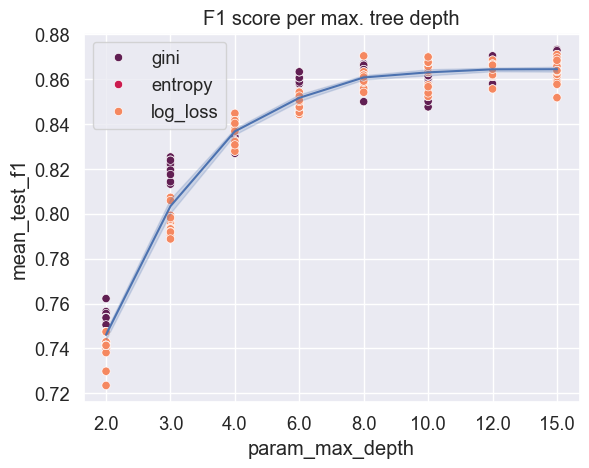

In [109]:
excluding_none = df_grids[df_grids["param_max_depth"] != "No limit"]

sns.scatterplot(excluding_none, x="param_max_depth", y="mean_test_f1", hue="param_criterion", palette="rocket")
sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_f1", palette="pastel")
plt.title("F1 score per max. tree depth")
plt.show()


C:\Users\alber\AppData\Local\Temp\ipykernel_5468\203714143.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_roc_auc", palette="pastel")


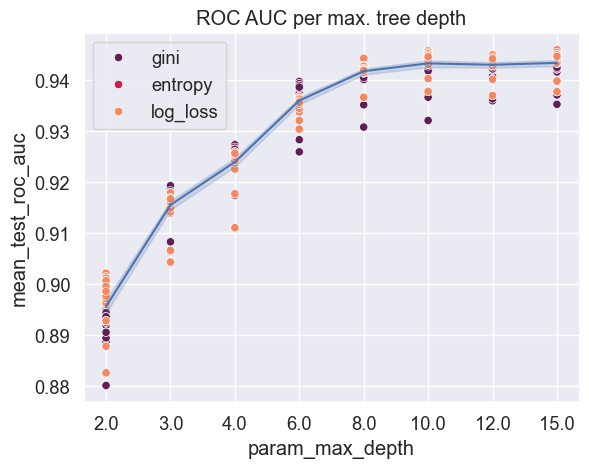

In [110]:
sns.scatterplot(excluding_none, x="param_max_depth", y="mean_test_roc_auc", hue="param_criterion", palette="rocket")
sns.lineplot(excluding_none, x="param_max_depth", y="mean_test_roc_auc", palette="pastel")
plt.title("ROC AUC per max. tree depth")
plt.show()

As we can see, the models' performance generally increases the deeper the tree and it stabilizes at a depth of 8 with little gain afterwards.

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


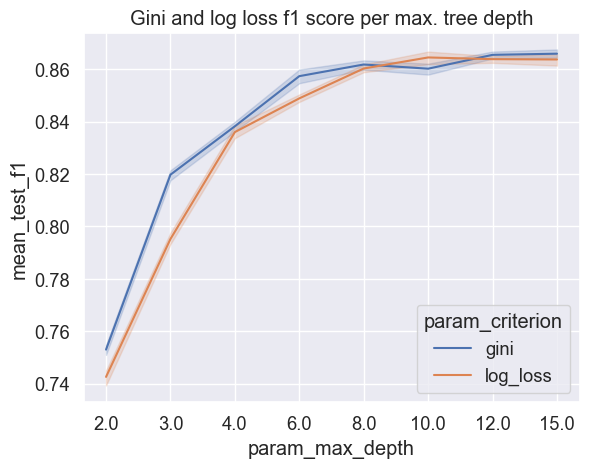

In [111]:
no_entropy_results = df_grids[(df_grids["param_criterion"] != "entropy") & (df_grids["param_max_depth"] != "No limit")]
# excluding entropy

sns.lineplot(no_entropy_results, x="param_max_depth", y="mean_test_f1", hue="param_criterion")
plt.title("Gini and log loss f1 score per max. tree depth")
plt.show()

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Gini and log loss ROC AUC per max. tree depth')

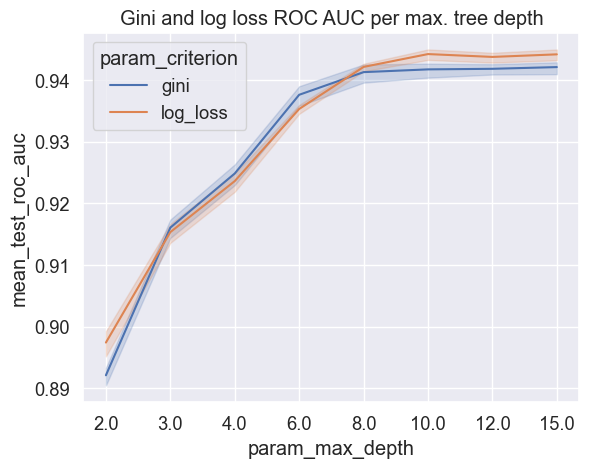

In [112]:
no_entropy_results = df_grids[(df_grids["param_criterion"] != "entropy") & (df_grids["param_max_depth"] != "No limit")]
# excluding entropy

sns.lineplot(no_entropy_results, x="param_max_depth", y="mean_test_roc_auc", hue="param_criterion")
plt.title("Gini and log loss ROC AUC per max. tree depth")

Comparing the performance of models depending on the splitting criterion and the max. depth of the trees, we can see that the log loss models peak at around depth 10 and the gini ones peak at the highest value. It is also noticeable that the gini models do better with shallower trees.

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

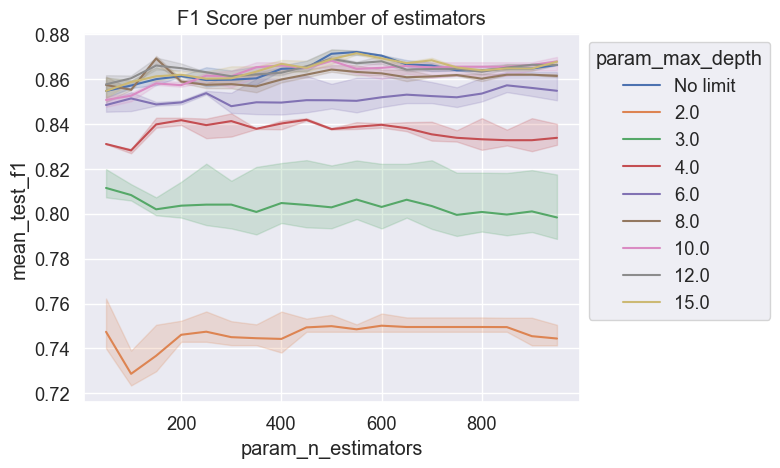

In [113]:
ax = sns.lineplot(df_grids, x="param_n_estimators", y="mean_test_f1", hue="param_max_depth")
plt.title("F1 Score per number of estimators")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

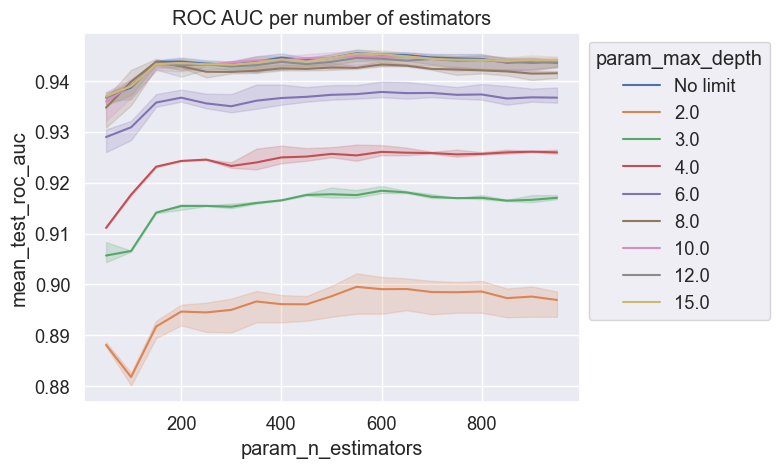

In [114]:
ax = sns.lineplot(df_grids, x="param_n_estimators", y="mean_test_roc_auc", hue="param_max_depth")
plt.title("ROC AUC per number of estimators")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

As far as the number of estimators, these don't cause major differences but we se a little spike at around 500 estimators for the forests with a maximum depth of 12 and up.

In [115]:
# table_results = df_grids[df_grids["param_criterion"] == "gini"].pivot_table("mean_test_f1", columns="param_n_estimators", index= "param_max_depth")
# table_results

In [116]:
# table_results_2 = df_grids[df_grids["param_criterion"] == "gini"].pivot_table("mean_test_neg_mean_squared_error", columns="param_n_estimators", index= "param_max_depth")
# table_results_2

## Final model

If we were to choose a final mode, we would probably go for a less complex model to avoid overfitting. Given our gridsearch, we know that we can reduce the complexity of our would-be final model without compromising much on either of our final metrics. 

We saw the f1 score and mse don't improve that much after a max depth of 8 so I'll look for a model with that characteristic

In [117]:
# np.unique(df_grids["param_max_depth"])

In [118]:
# df_grids[(df_grids["param_criterion"] == "gini") & (df_grids["param_max_depth"] == '8.0')][cols]

These models barely change in terms of F1 so I will not be prioritizing such a marginal gain.  

In [119]:
# final_options = df_grids[(df_grids["param_criterion"] == "gini") & (df_grids["param_max_depth"] == '8.0')][cols].sort_values("param_n_estimators")
# final_options

If we order them based on their number of estimators, the third one seems like a reasonable choice given the metric scores.

# 8. Final model and validation

## Constructing the final model

In [120]:
X = transformed_data[rfe]
y = transformed_data["Polarity"].replace({"True": 1, "Fake": 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True, random_state=16) 



C:\Users\alber\AppData\Local\Temp\ipykernel_5468\2959952486.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = transformed_data["Polarity"].replace({"True": 1, "Fake": 0})


In [121]:
final_model = RandomForestClassifier(max_depth=8, n_estimators=150, random_state=42)
final_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, n_estimators=150, random_state=42)

In [122]:
pickle.dump(final_model, open("final_model.sav", 'wb'))

Final tests

In [123]:
y_pred = final_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("Final F1 score:", f1)

Final F1 score: 0.9072164948453608


In [124]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_pred)
print("Final ROC AUC:", roc)

Final ROC AUC: 0.8988095238095237


Our final model is constructed with a max depth of 8, 150 estimators and has a f1 score of 0.90 and a ROC AUC of 0.1!

## Validation

As a little validation exercise, I am going to run predictions on a completely different dataset and check how well the final model does. I don't expect the same results as the ones we got with the test split of our original dataset but it will be a nice indication of whether the final model generalizes and whether the initial thesis, that fake news are different at a linguistic level, was somewhat accurate or not.

The validation dataset comes from https://www.kaggle.com/datasets/hassanamin/textdb3 and I have previously transformed it in the same way we did as with the training dataset (merged title to the main text column, TCT, min-max scalar and sentiment scores).

In [125]:
cols = rfe + ["Polarity"]

test_data = pd.read_csv(r"Datasets\Fake News Dataset (validation)\test_data.csv", dtype={"Polarity": "int"}, low_memory=False)

test_data = test_data[cols].dropna()

X = test_data.drop("Polarity", axis=1)

y = test_data[["Polarity"]]

print("\nNumber of samples to be evaluated: ", X.shape[0])



Number of samples to be evaluated:  5524


In [126]:
y_pred = final_model.predict(X)
f1 = f1_score(y, y_pred)

print("Validation F1 score:", f1)

Validation F1 score: 0.7012115019705153


In [127]:
roc = roc_auc_score(y, y_pred)
print("Validation ROC AUC:", roc)

Validation ROC AUC: 0.6181495594899868


As we can see, it seems like our model does generalize!

In [128]:
# from print_versions import print_versions

# import numpy as np
# from pandas import DataFrame

# print_versions(globals())

matplotlib==3.8.0
pandas==2.2.2
numpy==1.26.1
textblob==0.15.3
nltk==3.8.1
seaborn==0.13.0
scipy==1.11.3
json==2.0.9


<!-- Differences in feature sets -->